In [1]:
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go

from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
with open('result.json', 'r') as file:
    results = json.load(file)

results

{'sigmoid': [[{'train': {'loss': [1.8139899969100952,
      1.7926818132400513,
      1.791440725326538,
      1.79165518283844,
      1.7912203073501587,
      1.7916802167892456,
      1.7906842231750488,
      1.7914948463439941],
     'accuracy': [0.17107142508029938,
      0.1650589555501938,
      0.17678570747375488,
      0.1732761710882187,
      0.17964285612106323,
      0.17702750861644745,
      0.18256519734859467,
      0.17595569789409637],
     'val_loss': [1.7973114252090454,
      1.7916150093078613,
      1.7911394834518433,
      1.7909128665924072,
      1.790941834449768,
      1.7910462617874146,
      1.7907891273498535,
      1.7908371686935425],
     'val_accuracy': [0.16975748538970947,
      0.17902995645999908,
      0.17902995645999908,
      0.17902995645999908,
      0.17902995645999908,
      0.17902995645999908,
      0.17902995645999908,
      0.17902995645999908]},
    'evaluation': [1.7904258966445923, 0.17499999701976776]},
   {'train': {'loss': [

In [2]:
delta = tf.Variable(0.0)
delta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [3]:
initializer = tf.initializers.HeNormal()
weights = initializer(shape=(1, 1))
weights

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-1.1081553]], dtype=float32)>

In [4]:
x = tf.random.normal(shape=(1, 50))
x

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[ 0.5107548 ,  0.88770896,  1.9658613 ,  0.67462164, -1.2830045 ,
        -0.23601297, -0.39540133,  0.34814495, -1.7531178 ,  0.3817011 ,
        -1.0297387 , -0.9549759 ,  1.3766705 ,  0.58331704, -2.0985103 ,
        -2.209364  ,  0.7487173 ,  1.787344  ,  2.3946905 ,  0.8164409 ,
        -0.95663893, -0.4270386 , -0.20804642, -1.1607932 , -0.20288935,
         1.929395  ,  1.2295738 , -0.5796181 , -1.1075071 ,  0.19704427,
        -0.41989505, -0.7870793 , -0.13346022,  0.62259   , -0.43753812,
        -0.11306757,  0.2119365 , -0.6314431 ,  1.7267823 ,  0.26377323,
         0.84635276,  2.0264227 , -0.759782  , -0.73510075, -0.5769249 ,
        -1.1312705 ,  0.93124247, -0.58579075, -0.25835353, -0.39430916]],
      dtype=float32)>

In [5]:
x2d = tf.random.uniform(shape=(1, 50))
x2d

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0.89934146, 0.91089344, 0.5015552 , 0.7774359 , 0.16022515,
        0.9047432 , 0.99602616, 0.52960443, 0.87375987, 0.5781014 ,
        0.12516534, 0.52924705, 0.32127392, 0.40723133, 0.8118448 ,
        0.95186925, 0.93818843, 0.9792707 , 0.8641043 , 0.5074059 ,
        0.5267657 , 0.3914808 , 0.5712906 , 0.57063603, 0.75876033,
        0.2154553 , 0.7717929 , 0.8733971 , 0.54304636, 0.38570058,
        0.1653949 , 0.0236578 , 0.64042675, 0.0909369 , 0.39425957,
        0.05168593, 0.41424572, 0.6243262 , 0.5614841 , 0.9208399 ,
        0.75477195, 0.39507997, 0.92691875, 0.5366297 , 0.9062178 ,
        0.13914692, 0.77090394, 0.57050276, 0.39438045, 0.797246  ]],
      dtype=float32)>

In [35]:
with tf.GradientTape() as tape:
    tape.reset()
    out = tf.nn.sigmoid(tf.matmul(tf.transpose(weights), x) + delta)

derivative_x = tape.jacobian(out, delta)

In [36]:
derivative_x

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[7.7329397e-02, 3.9162669e-02, 1.8602553e-01, 1.1602655e-01,
        1.5858399e-02, 2.2726739e-03, 4.3146763e-02, 2.3744315e-01,
        1.2725556e-01, 1.2703110e-01, 7.1542338e-02, 4.0434033e-02,
        2.3411974e-01, 1.7325033e-01, 6.3291438e-02, 1.8604323e-01,
        1.5150140e-01, 1.8430437e-01, 7.9252990e-04, 2.4252595e-01,
        1.3270602e-03, 4.9597830e-02, 3.5917766e-02, 2.1134041e-01,
        1.1630488e-02, 2.0820807e-01, 2.7854996e-02, 1.8408086e-02,
        1.2488887e-02, 9.3263537e-02, 1.8791455e-01, 2.4989359e-01,
        2.3513968e-01, 8.6408220e-03, 2.4985665e-01, 2.3189959e-01,
        2.1487130e-02, 1.4213464e-01, 2.0657815e-01, 2.7028957e-02,
        2.0559627e-01, 1.0327360e-04, 1.8678200e-01, 1.7490998e-01,
        5.7218909e-02, 3.0390382e-02, 6.8639114e-02, 2.0854068e-01,
        4.3060068e-02, 2.4053213e-01]], dtype=float32)>

In [37]:
with tf.GradientTape() as tape:
    tape.reset()
    out = tf.nn.sigmoid(tf.matmul(tf.transpose(weights), x2d) + delta)

derivative_x2 = tape.jacobian(out, delta)

In [38]:
derivative_x2

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0.07075789, 0.21233398, 0.19559701, 0.12930785, 0.22581261,
        0.24307135, 0.09836267, 0.05760499, 0.06269159, 0.06939267,
        0.19859175, 0.11947412, 0.24960421, 0.13685258, 0.19898166,
        0.09916126, 0.20663294, 0.2278687 , 0.07643164, 0.10277732,
        0.24842454, 0.24373797, 0.0746756 , 0.20981285, 0.21850055,
        0.08241386, 0.1462274 , 0.24849983, 0.23864551, 0.17028444,
        0.19619799, 0.07180858, 0.17338052, 0.05730929, 0.07701921,
        0.18537888, 0.06278367, 0.22389996, 0.21973051, 0.24901986,
        0.2359157 , 0.10631982, 0.05674944, 0.2358826 , 0.11018061,
        0.24748014, 0.23487549, 0.14402553, 0.14858392, 0.21160062]],
      dtype=float32)>

In [10]:
layer = tf.keras.layers.Dense(16, kernel_initializer=initializer, activation=tf.nn.sigmoid)

with tf.GradientTape() as t:
    y = layer(x)

y

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[0.09875406, 0.21847177, 0.31926814, 0.9592777 , 0.10202565,
        0.266552  , 0.10448585, 0.11678002, 0.44382945, 0.77355975,
        0.22219057, 0.2966671 , 0.21621786, 0.51411027, 0.43875244,
        0.95340455]], dtype=float32)>

## logistic activation

In [11]:
activated = tf.nn.sigmoid(x)
activated

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0.6963793 , 0.24982801, 0.40416577, 0.65702266, 0.1927653 ,
        0.10730497, 0.25681096, 0.46037748, 0.35316586, 0.64703447,
        0.70317113, 0.25210932, 0.4552591 , 0.3929633 , 0.28651282,
        0.4041815 , 0.625706  , 0.5973644 , 0.92319196, 0.5303814 ,
        0.9094241 , 0.7327931 , 0.24375373, 0.57188445, 0.8239321 ,
        0.5750565 , 0.22671086, 0.7987238 , 0.82021344, 0.32087559,
        0.59414524, 0.5035936 , 0.5432258 , 0.16126268, 0.49582925,
        0.5478978 , 0.2104556 , 0.63377404, 0.42332387, 0.22476849,
        0.4223575 , 0.03928398, 0.5951591 , 0.39440176, 0.72165877,
        0.23241998, 0.29329094, 0.5747235 , 0.256664  , 0.53427666]],
      dtype=float32)>

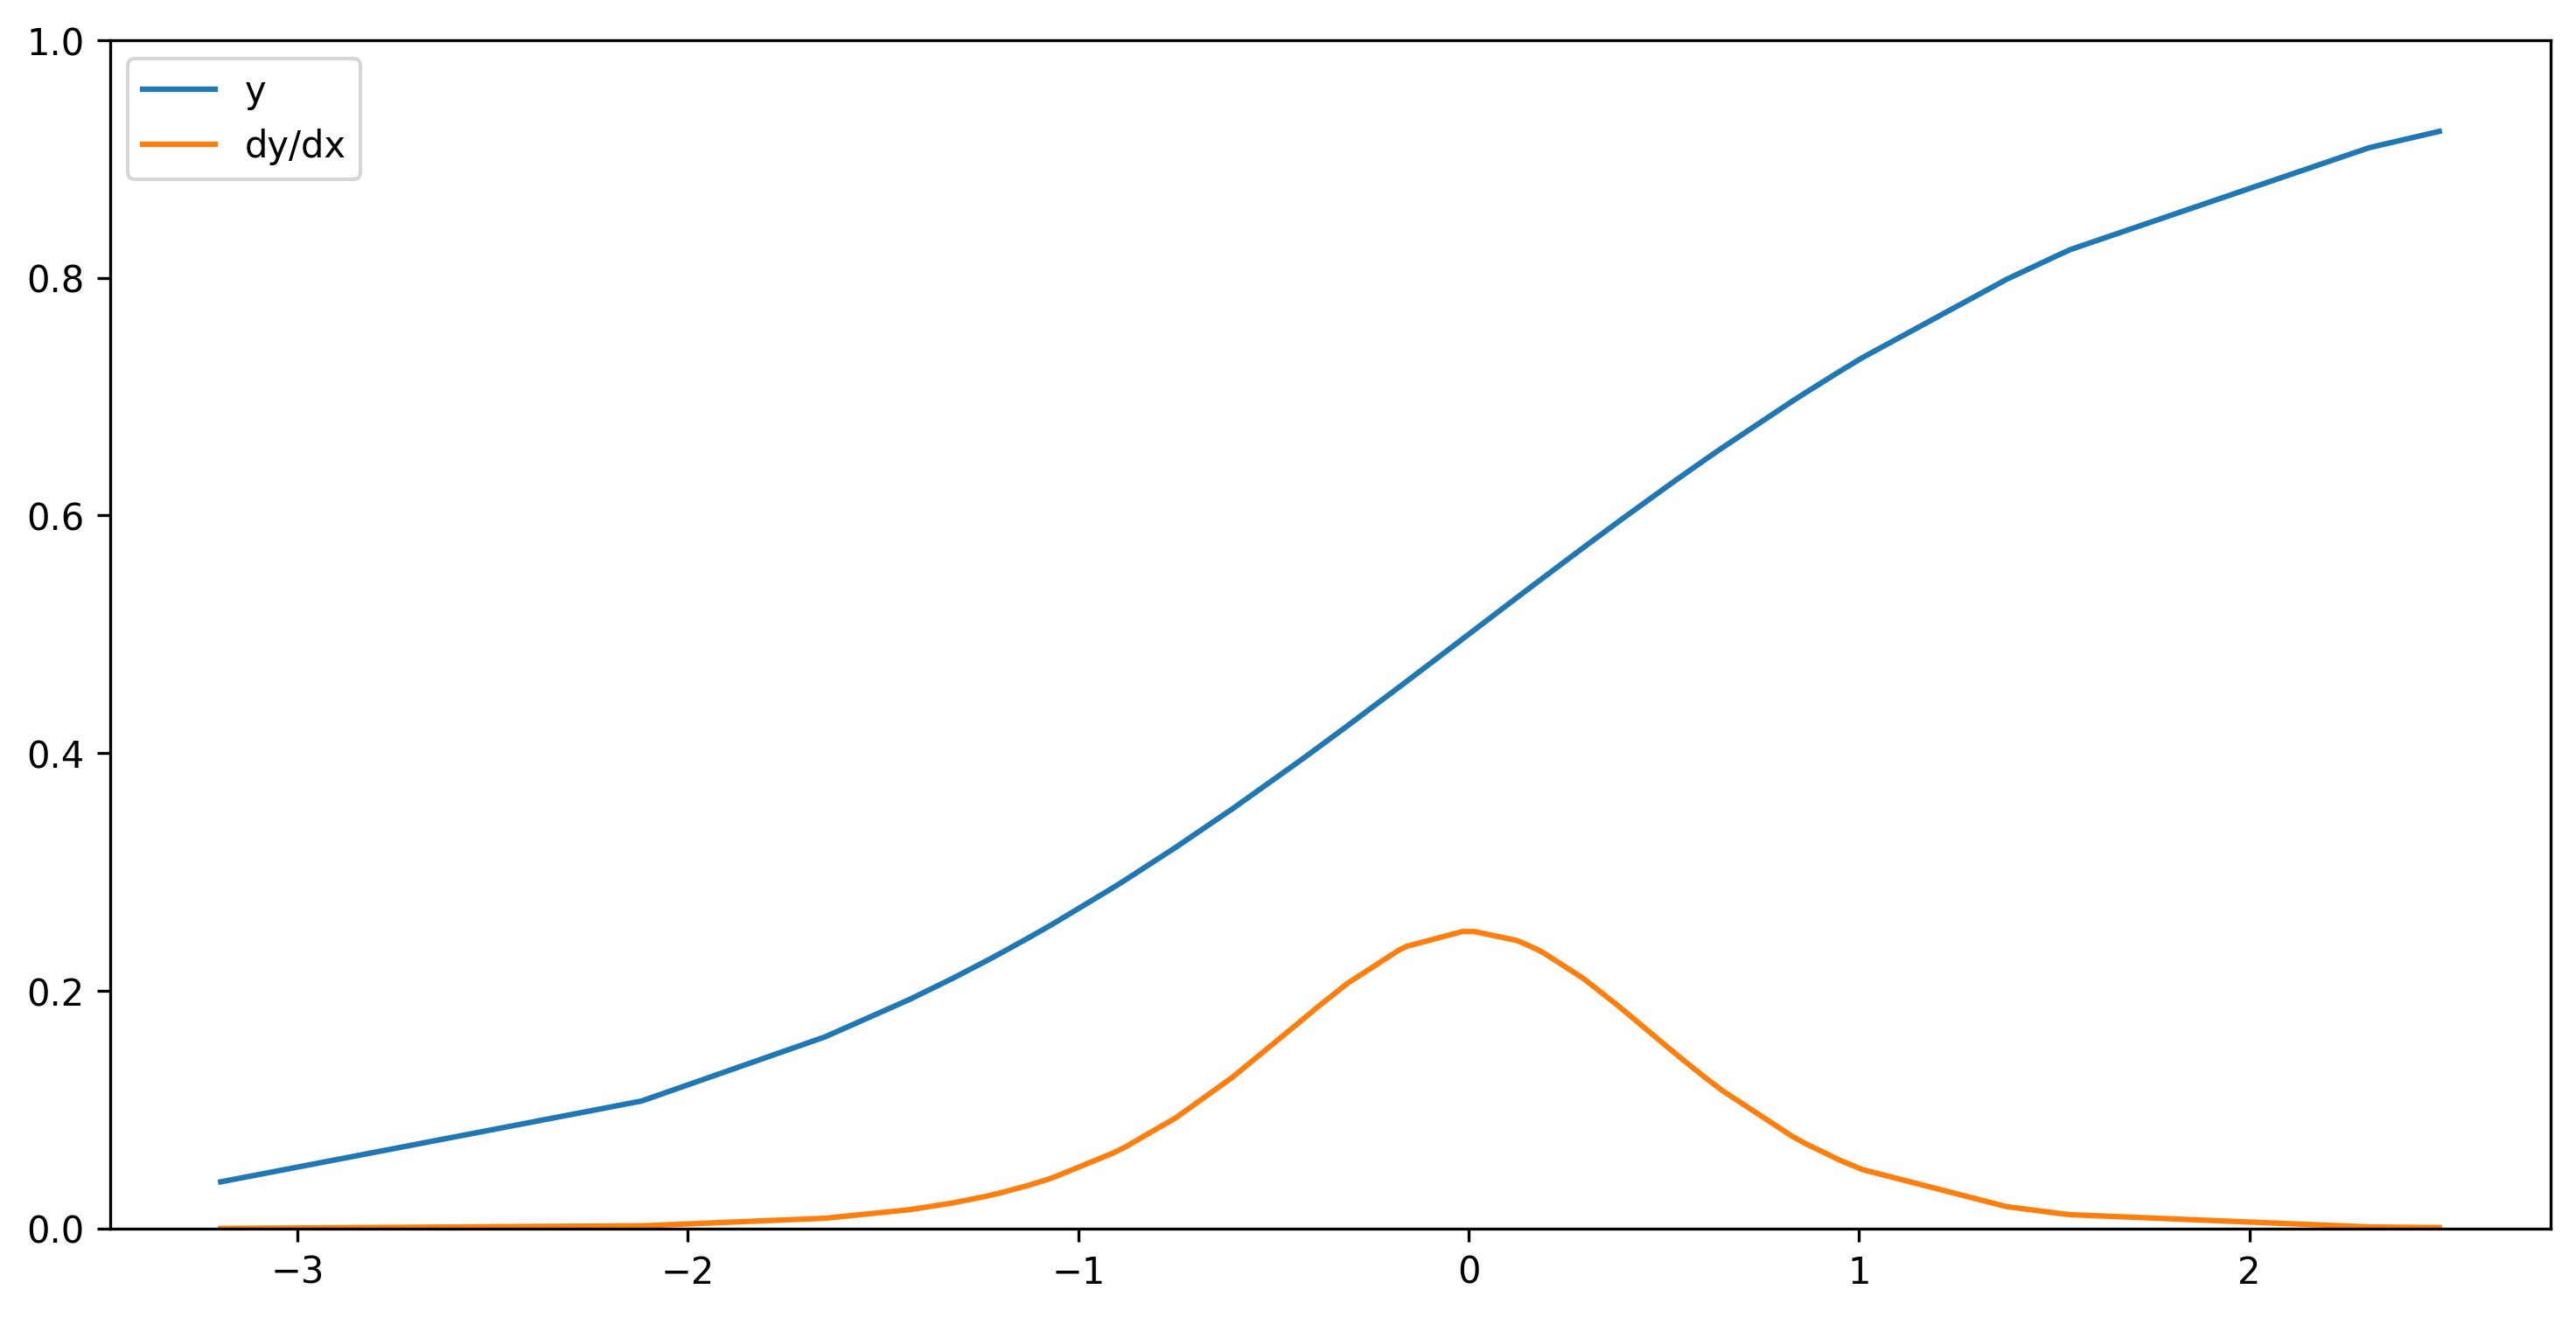

In [12]:
plt.figure(figsize=[12, 6], dpi=300)
sns.lineplot(x=x.numpy()[0], y=activated.numpy()[0], label='y')
sns.lineplot(x=x.numpy()[0], y=derivative_x.numpy()[0], label='dy/dx')
plt.ylim(0, 1)
plt.savefig('../../images/activation/sig-singel-act.jpg')
plt.show()

In [13]:
activated = tf.nn.sigmoid(tf.matmul(tf.transpose(weights), x))
activated

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[9.1553652e-01, 4.0829737e-02, 2.4706827e-01, 8.6602384e-01,
        1.6118195e-02, 2.2778625e-03, 4.5188788e-02, 3.8794267e-01,
        1.4965098e-01, 8.5066921e-01, 9.2244250e-01, 4.2216245e-02,
        3.7398306e-01, 2.2296271e-01, 6.7902140e-02, 2.4710326e-01,
        8.1384486e-01, 7.5631160e-01, 9.9920684e-01, 5.8645260e-01,
        9.9867117e-01, 9.4766301e-01, 3.7309784e-02, 6.9662040e-01,
        9.8823100e-01, 7.0443076e-01, 2.8677389e-02, 9.8123997e-01,
        9.8735112e-01, 1.0410044e-01, 7.4916953e-01, 5.1031578e-01,
        6.2190288e-01, 8.7168049e-03, 4.8802802e-01, 6.3453776e-01,
        2.1969803e-02, 8.2842863e-01, 2.9162088e-01, 2.7801905e-02,
        2.8927806e-01, 1.0328427e-04, 7.5143188e-01, 2.2597443e-01,
        9.3906844e-01, 3.1374756e-02, 7.4135132e-02, 7.0361561e-01,
        4.5093492e-02, 5.9730297e-01]], dtype=float32)>

In [14]:
activated_x2d = tf.nn.sigmoid(tf.matmul(tf.transpose(weights), x2d))
activated_x2d

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0.92336994, 0.6940774 , 0.7332445 , 0.84740776, 0.65552294,
        0.58323854, 0.8894064 , 0.93862855, 0.9327914 , 0.9249792 ,
        0.72673386, 0.86128366, 0.51989436, 0.8363739 , 0.7258724 ,
        0.88837963, 0.7082476 , 0.6487659 , 0.91661537, 0.8836961 ,
        0.53969204, 0.57913303, 0.91871756, 0.70046735, 0.6774808 ,
        0.90937287, 0.82213753, 0.5387322 , 0.6065574 , 0.78233945,
        0.7319526 , 0.92212725, 0.77680224, 0.9389655 , 0.9159096 ,
        0.75420684, 0.932685  , 0.66155505, 0.6739813 , 0.5313072 ,
        0.61867726, 0.8790517 , 0.93960273, 0.6188167 , 0.8739243 ,
        0.5501982 , 0.6229818 , 0.8255372 , 0.8184589 , 0.6959576 ]],
      dtype=float32)>

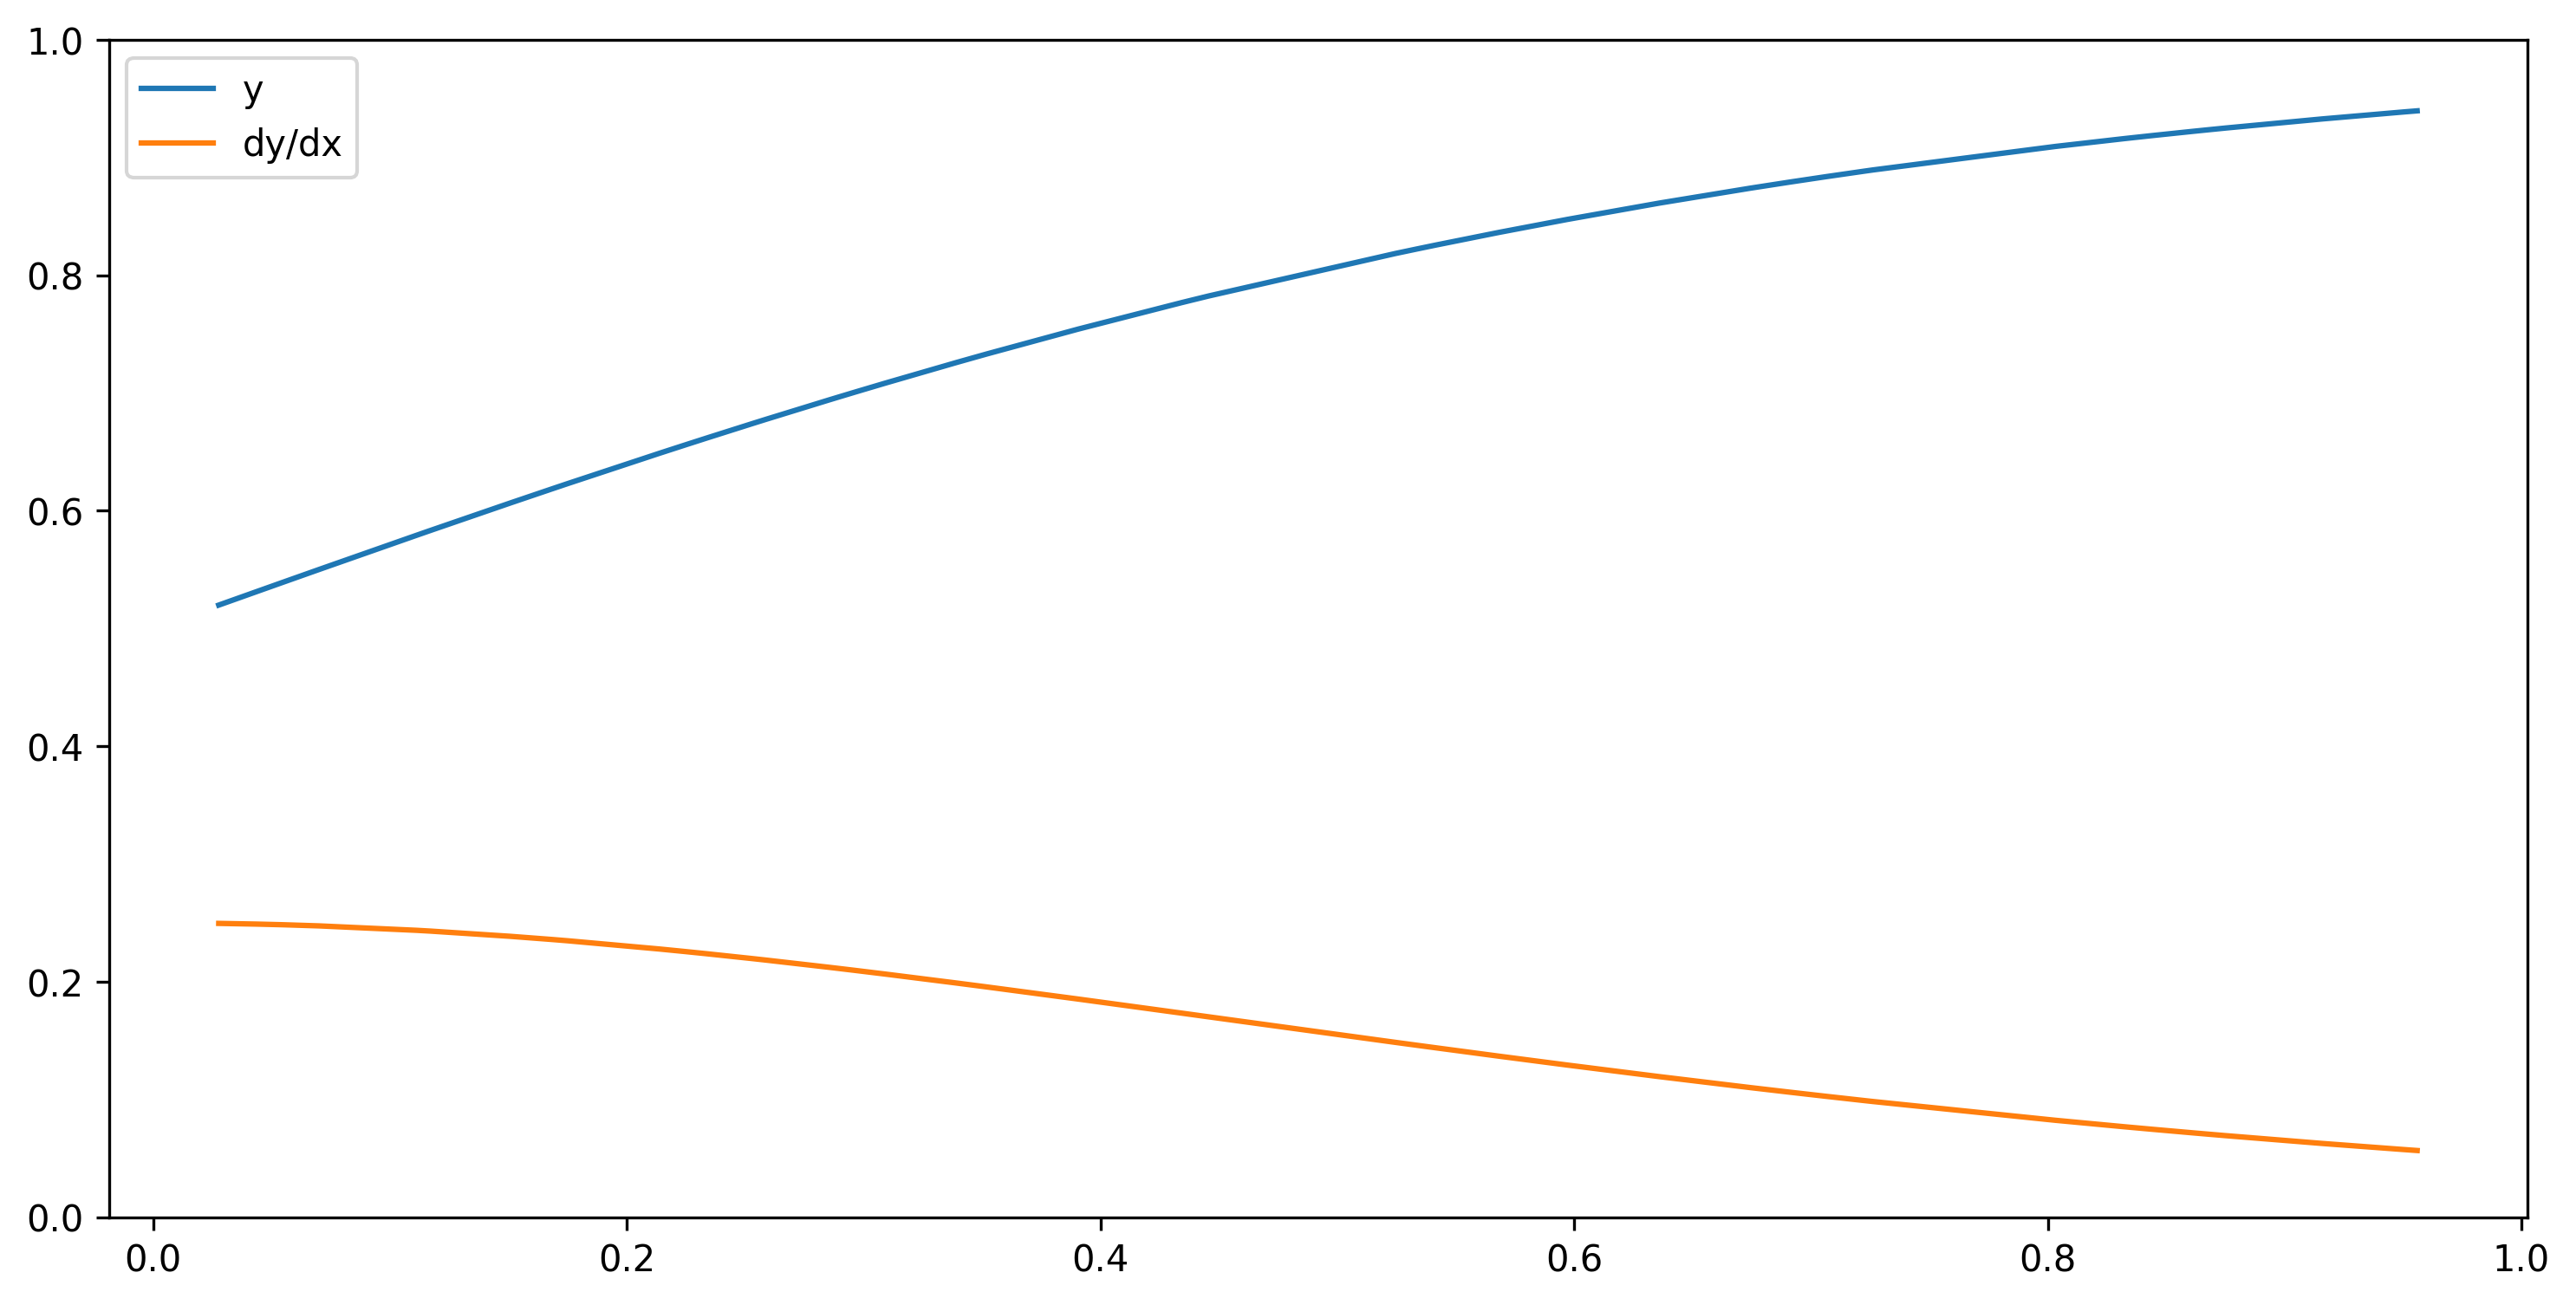

In [15]:
plt.figure(figsize=[12, 6], dpi=300)
sns.lineplot(x=x2d.numpy()[0], y=activated_x2d.numpy()[0], label='y')
sns.lineplot(x=x2d.numpy()[0], y=derivative_x2.numpy()[0], label='dy/dx')
plt.ylim(0, 1)
plt.savefig('../../images/activation/sig-singel-act-1.jpg')
plt.show()

## arctan and tanh


In [39]:
activated = tf.nn.tanh(x)

with tf.GradientTape() as tape:
    tape.reset()
    out = tf.nn.tanh(tf.matmul(tf.transpose(weights), x) + delta)

derivative_x = tape.jacobian(out, delta)

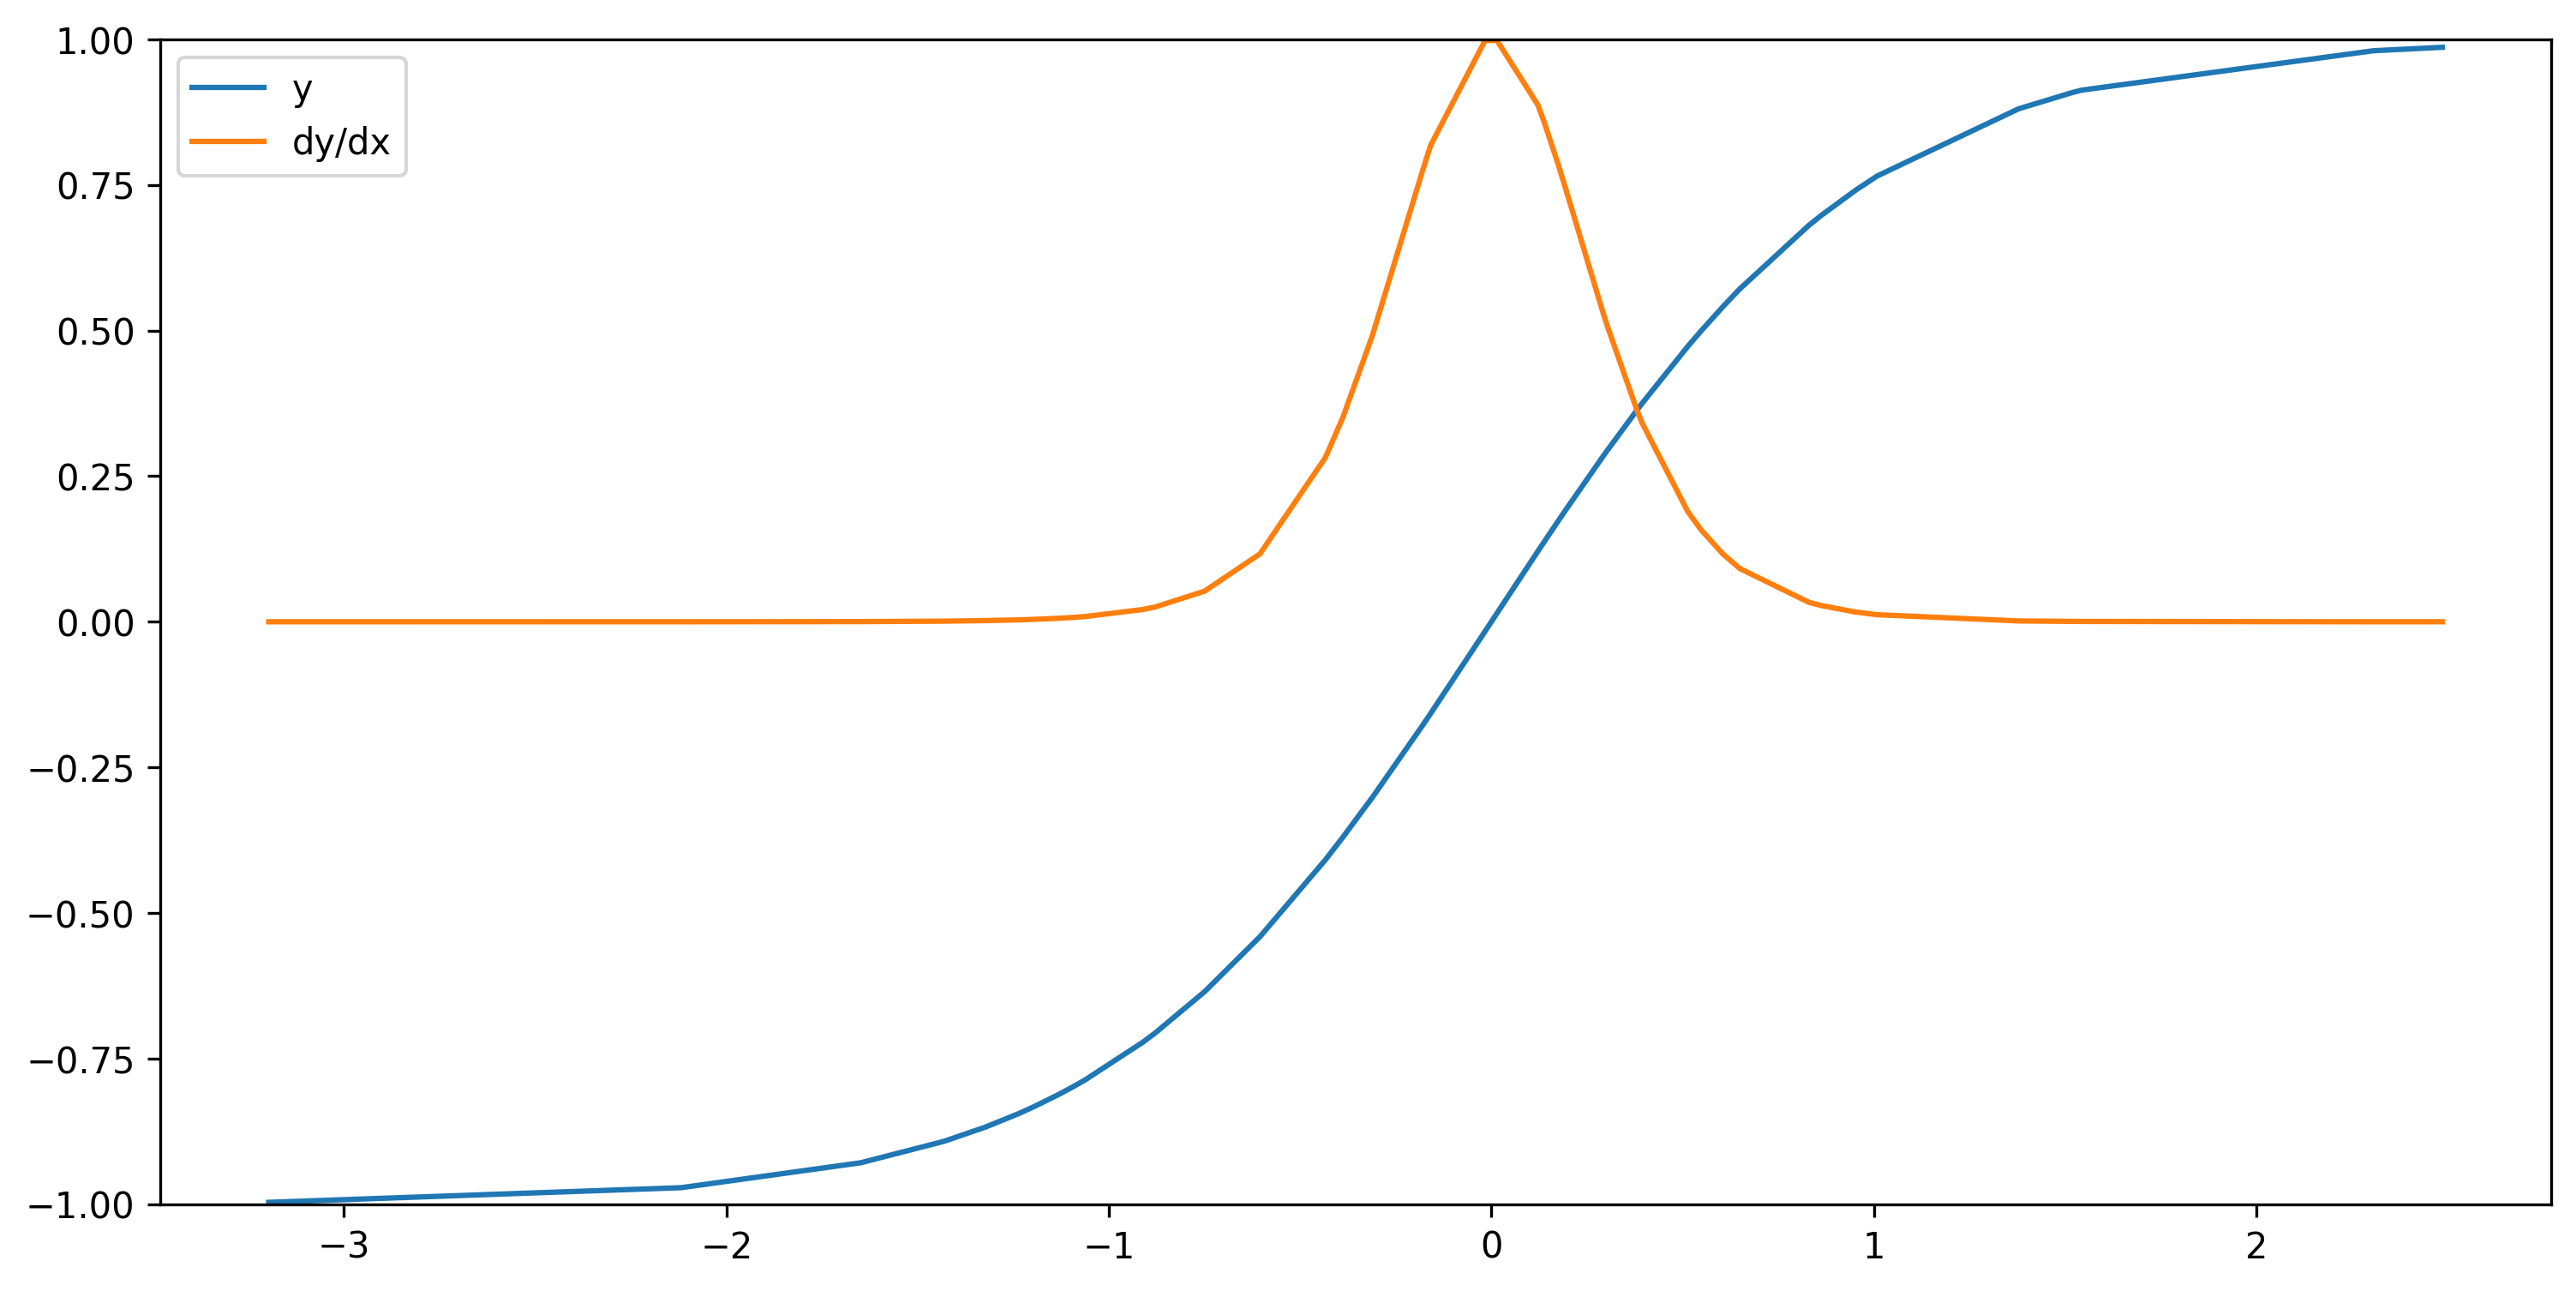

In [44]:
plt.figure(figsize=[12, 6], dpi=300)
sns.lineplot(x=x.numpy()[0], y=activated.numpy()[0], label='y')
sns.lineplot(x=x.numpy()[0], y=derivative_x.numpy()[0], label='dy/dx')
plt.ylim(-1, 1)
plt.savefig('../../images/activation/arctan-singel-act.jpg')
plt.show()

## softsign

In [45]:
activated = tf.nn.softsign(x)

with tf.GradientTape() as tape:
    tape.reset()
    out = tf.nn.softsign(tf.matmul(tf.transpose(weights), x) + delta)

derivative_x = tape.jacobian(out, delta)

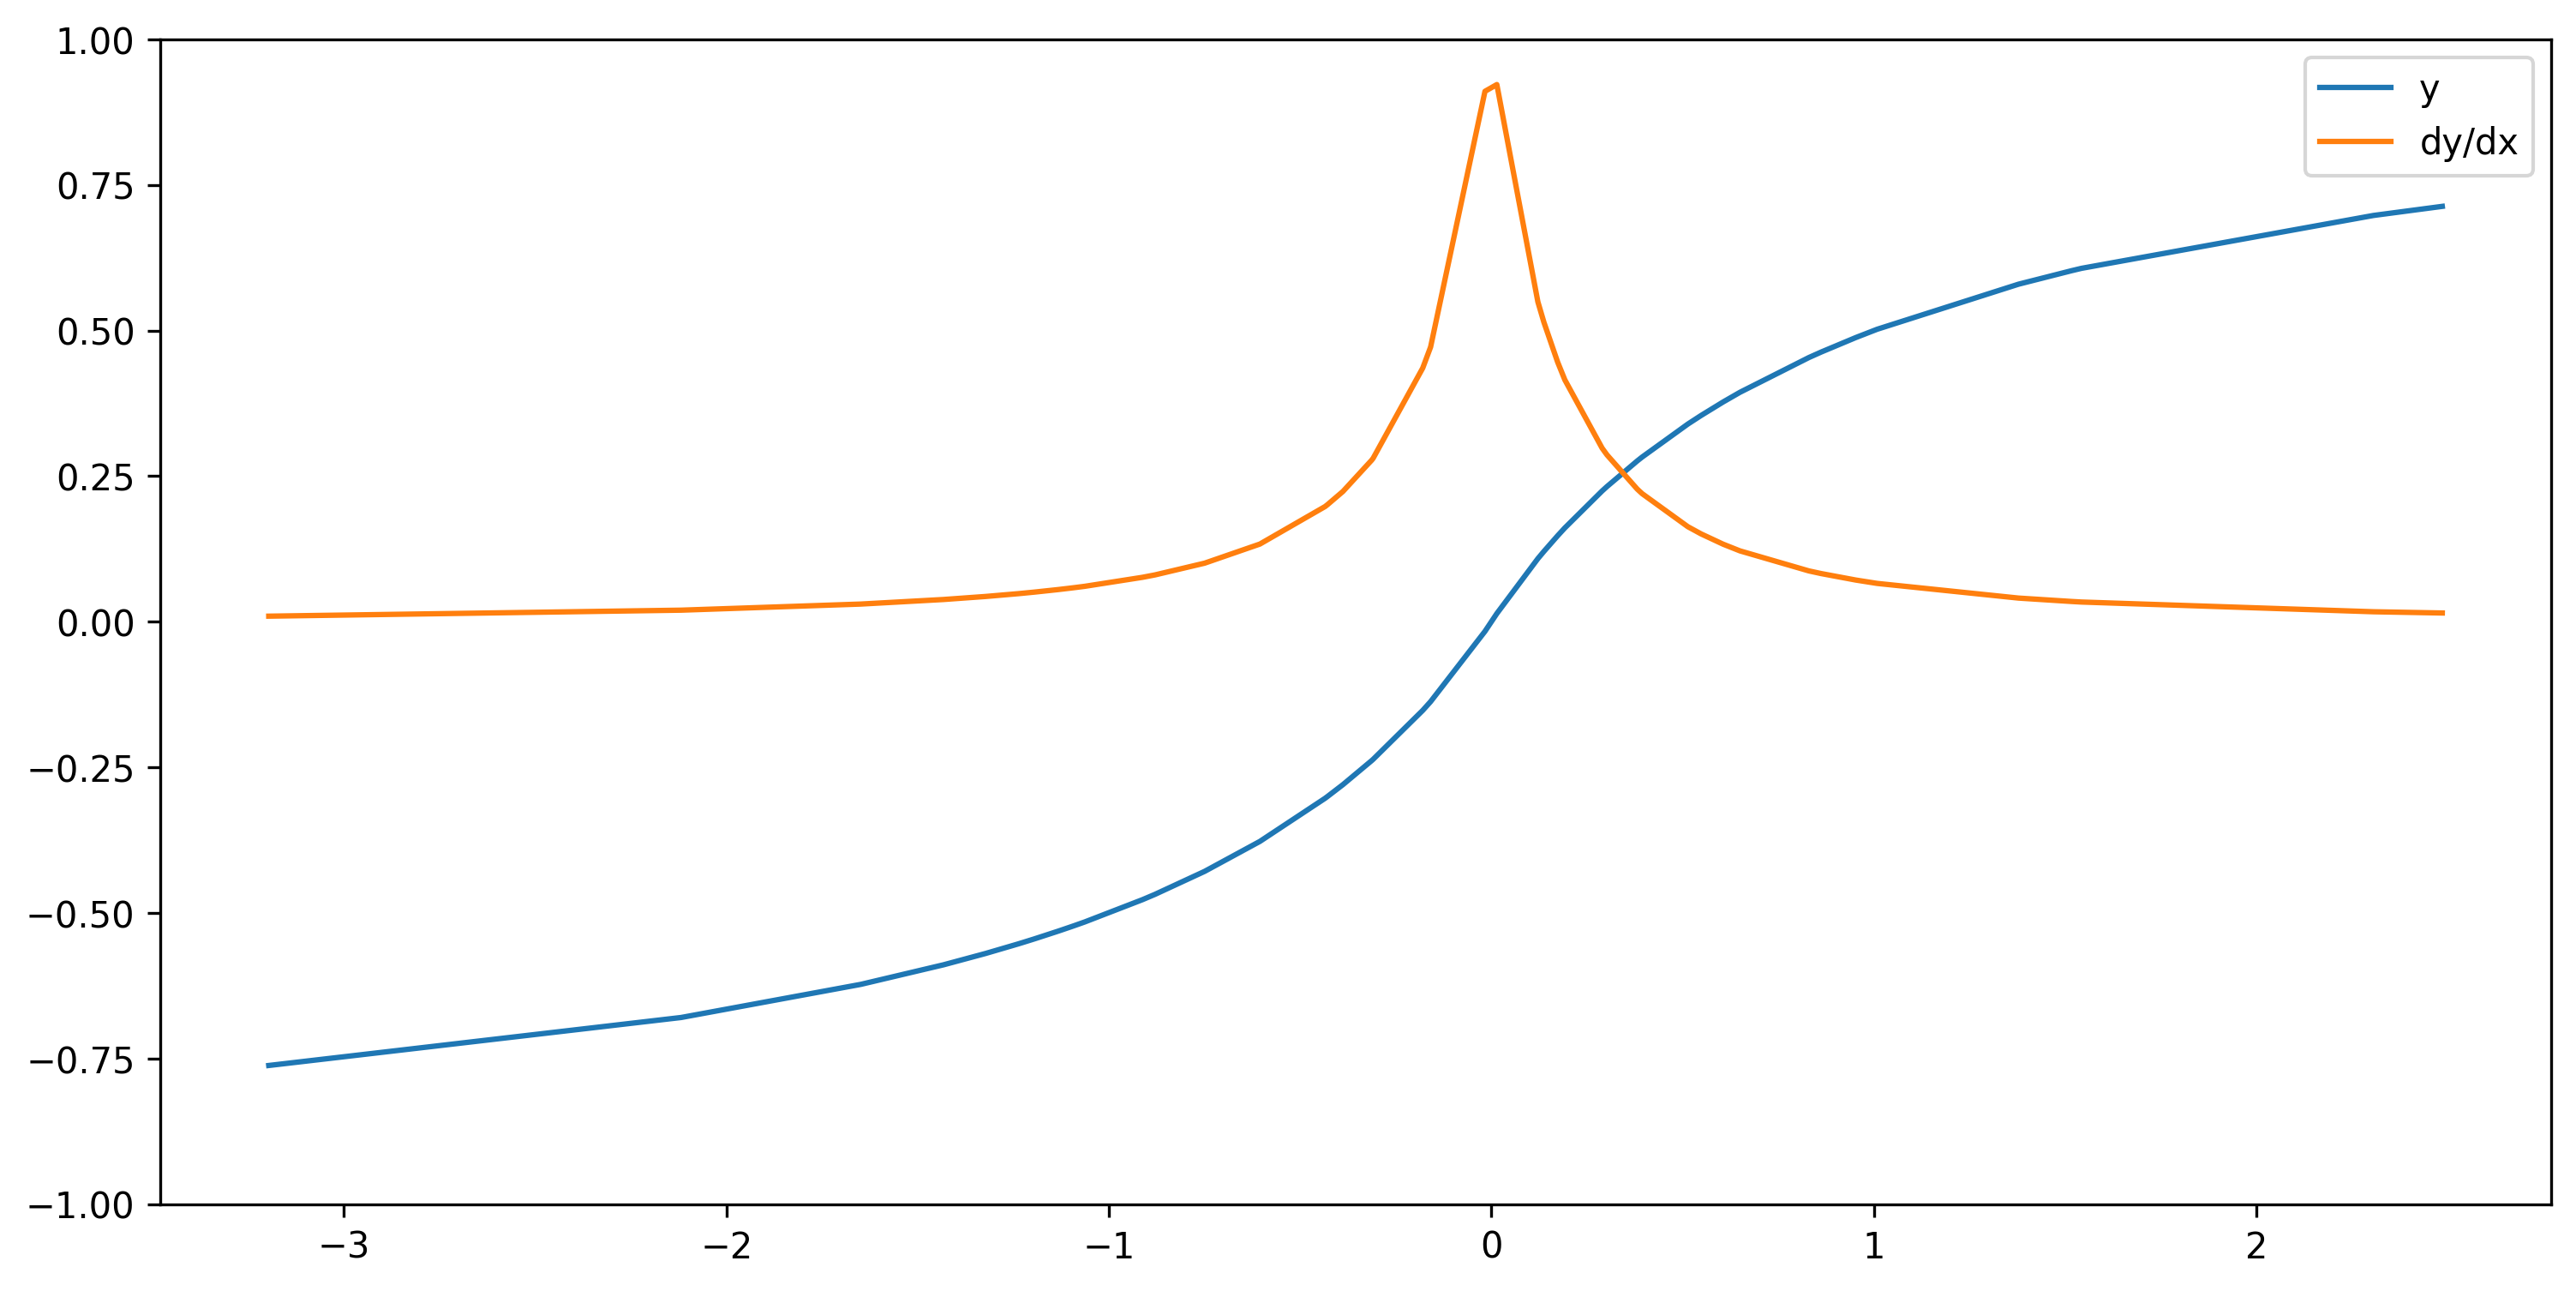

In [47]:
plt.figure(figsize=[12, 6], dpi=300)
sns.lineplot(x=x.numpy()[0], y=activated.numpy()[0], label='y')
sns.lineplot(x=x.numpy()[0], y=derivative_x.numpy()[0], label='dy/dx')
plt.ylim(-1, 1)
plt.savefig('../../images/activation/softsign-singel-act.jpg')
plt.show()

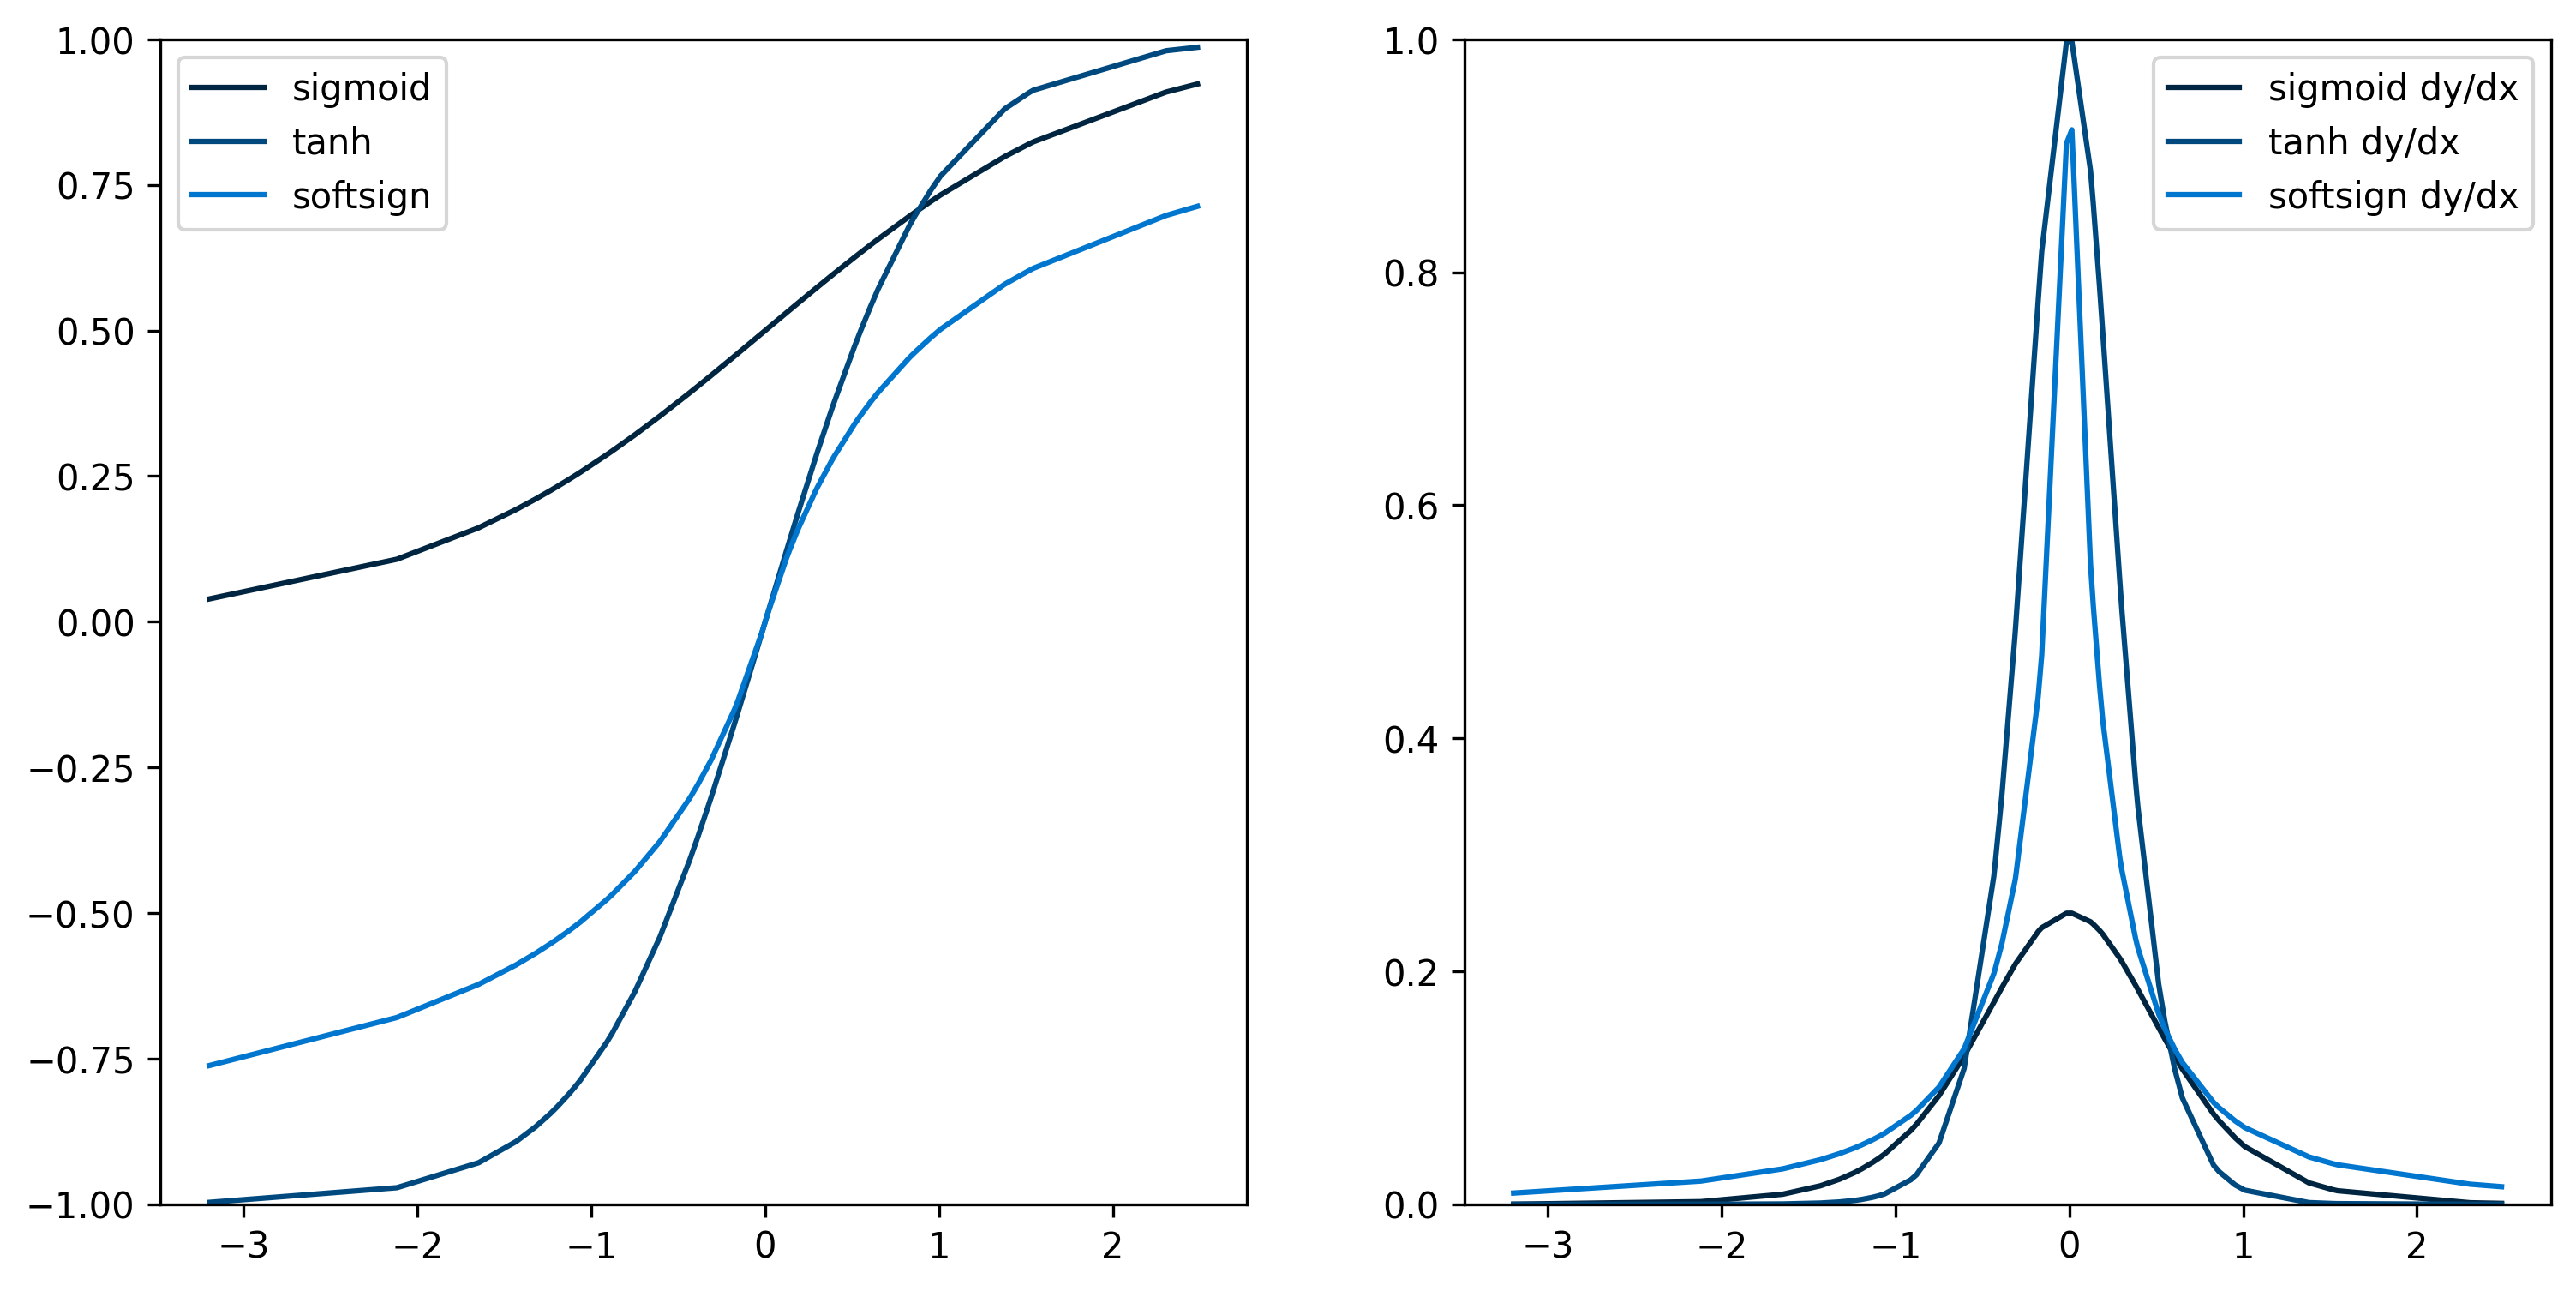

In [50]:
with tf.GradientTape(persistent=True) as tape:
    out1 = tf.nn.sigmoid(tf.matmul(tf.transpose(weights), x) + delta)
    out2 = tf.nn.tanh(tf.matmul(tf.transpose(weights), x) + delta)
    out3 = tf.nn.softsign(tf.matmul(tf.transpose(weights), x) + delta)

derivative_1 = tape.jacobian(out1, delta)
derivative_2 = tape.jacobian(out2, delta)
derivative_3 = tape.jacobian(out3, delta)

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[12, 6], dpi=300)

sns.lineplot(x=x.numpy()[0], y=tf.nn.sigmoid(x).numpy()[0], label='sigmoid', color='#002540', ax=axes[0])
sns.lineplot(x=x.numpy()[0], y=tf.nn.tanh(x).numpy()[0], label='tanh', color='#00497F', ax=axes[0])
sns.lineplot(x=x.numpy()[0], y=tf.nn.softsign(x).numpy()[0], label='softsign', color='#0076CF', ax=axes[0])

sns.lineplot(x=x.numpy()[0], y=derivative_1.numpy()[0], label='sigmoid dy/dx', color='#002540', ax=axes[1])
sns.lineplot(x=x.numpy()[0], y=derivative_2.numpy()[0], label='tanh dy/dx', color='#00497F', ax=axes[1])
sns.lineplot(x=x.numpy()[0], y=derivative_3.numpy()[0], label='softsign dy/dx', color='#0076CF', ax=axes[1])

axes[0].set_ylim(-1, 1)
axes[1].set_ylim(0, 1)

plt.savefig('../../images/activation/s-type-singel-act.jpg')
plt.show()

## pairwise activation

- linear activation

In [57]:
with tf.GradientTape() as tape:
    tape.reset()
    out = tf.matmul(tf.transpose(weights), x) + delta

derivative_x = tape.jacobian(out, delta)

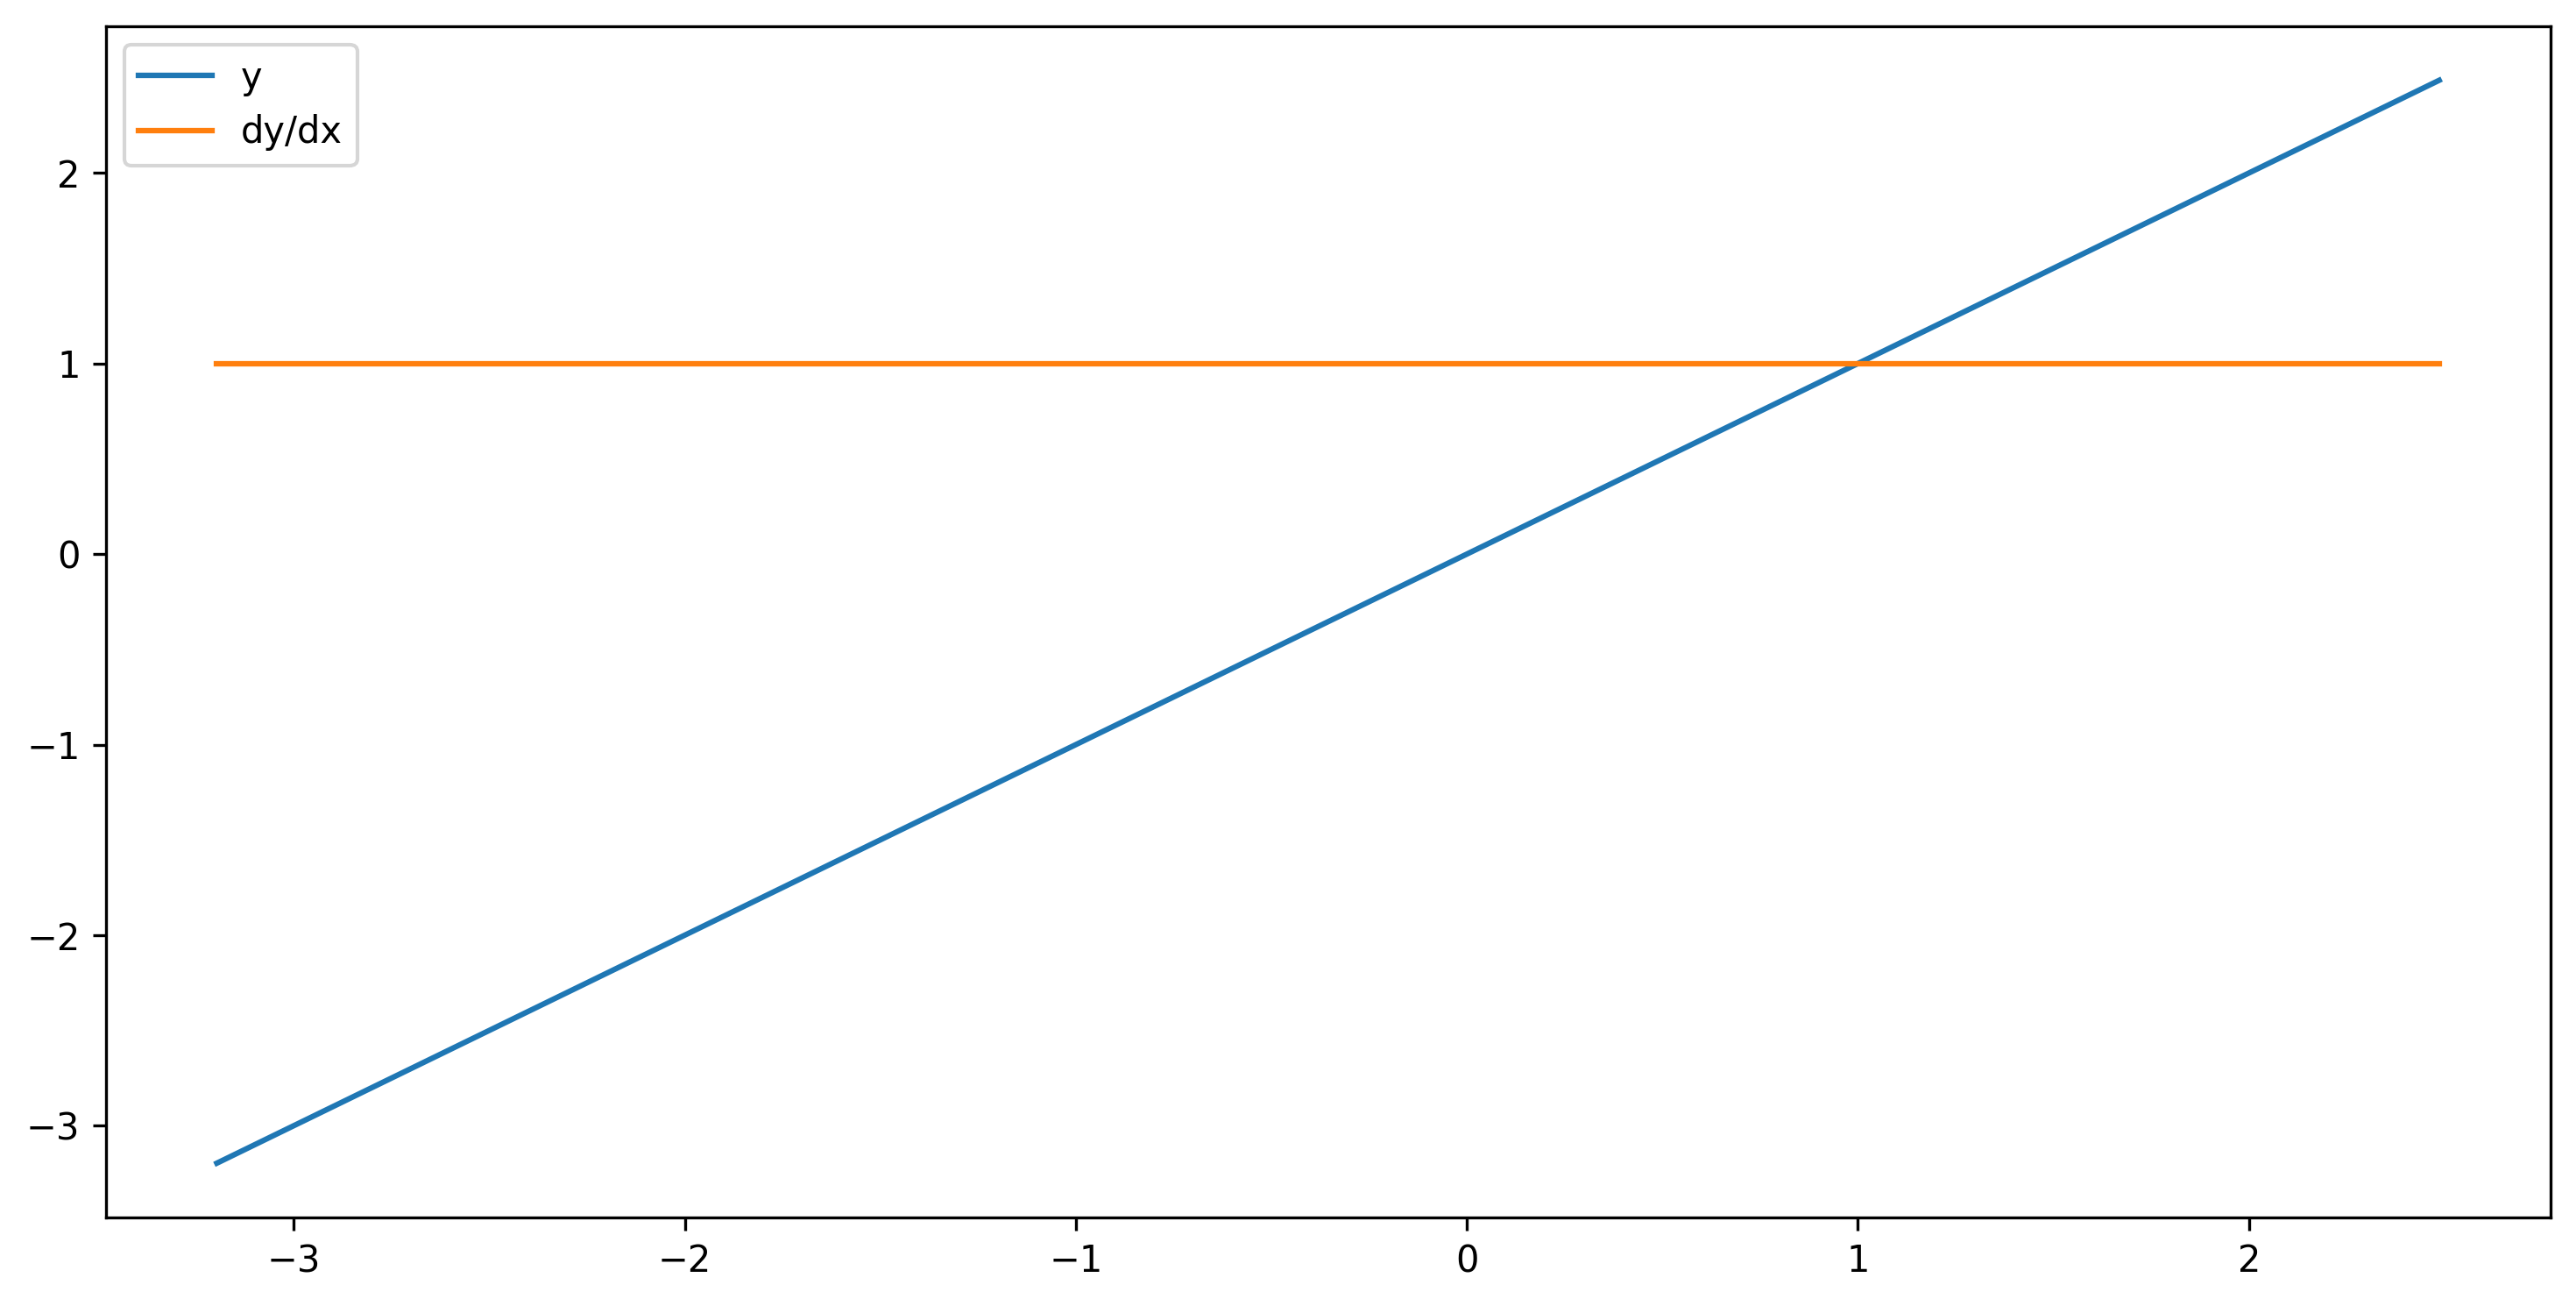

In [58]:
plt.figure(figsize=[12, 6], dpi=300)
sns.lineplot(x=x.numpy()[0], y=x.numpy()[0], label='y')
sns.lineplot(x=x.numpy()[0], y=derivative_x.numpy()[0], label='dy/dx')
# plt.ylim(-1, 1)
plt.savefig('../../images/activation/linear-singel-act.jpg')
plt.show()

- rectified linear unit

In [59]:
activated = tf.nn.relu(x)

with tf.GradientTape() as tape:
    tape.reset()
    out = tf.nn.relu(tf.matmul(tf.transpose(weights), x) + delta)

derivative_x = tape.jacobian(out, delta)

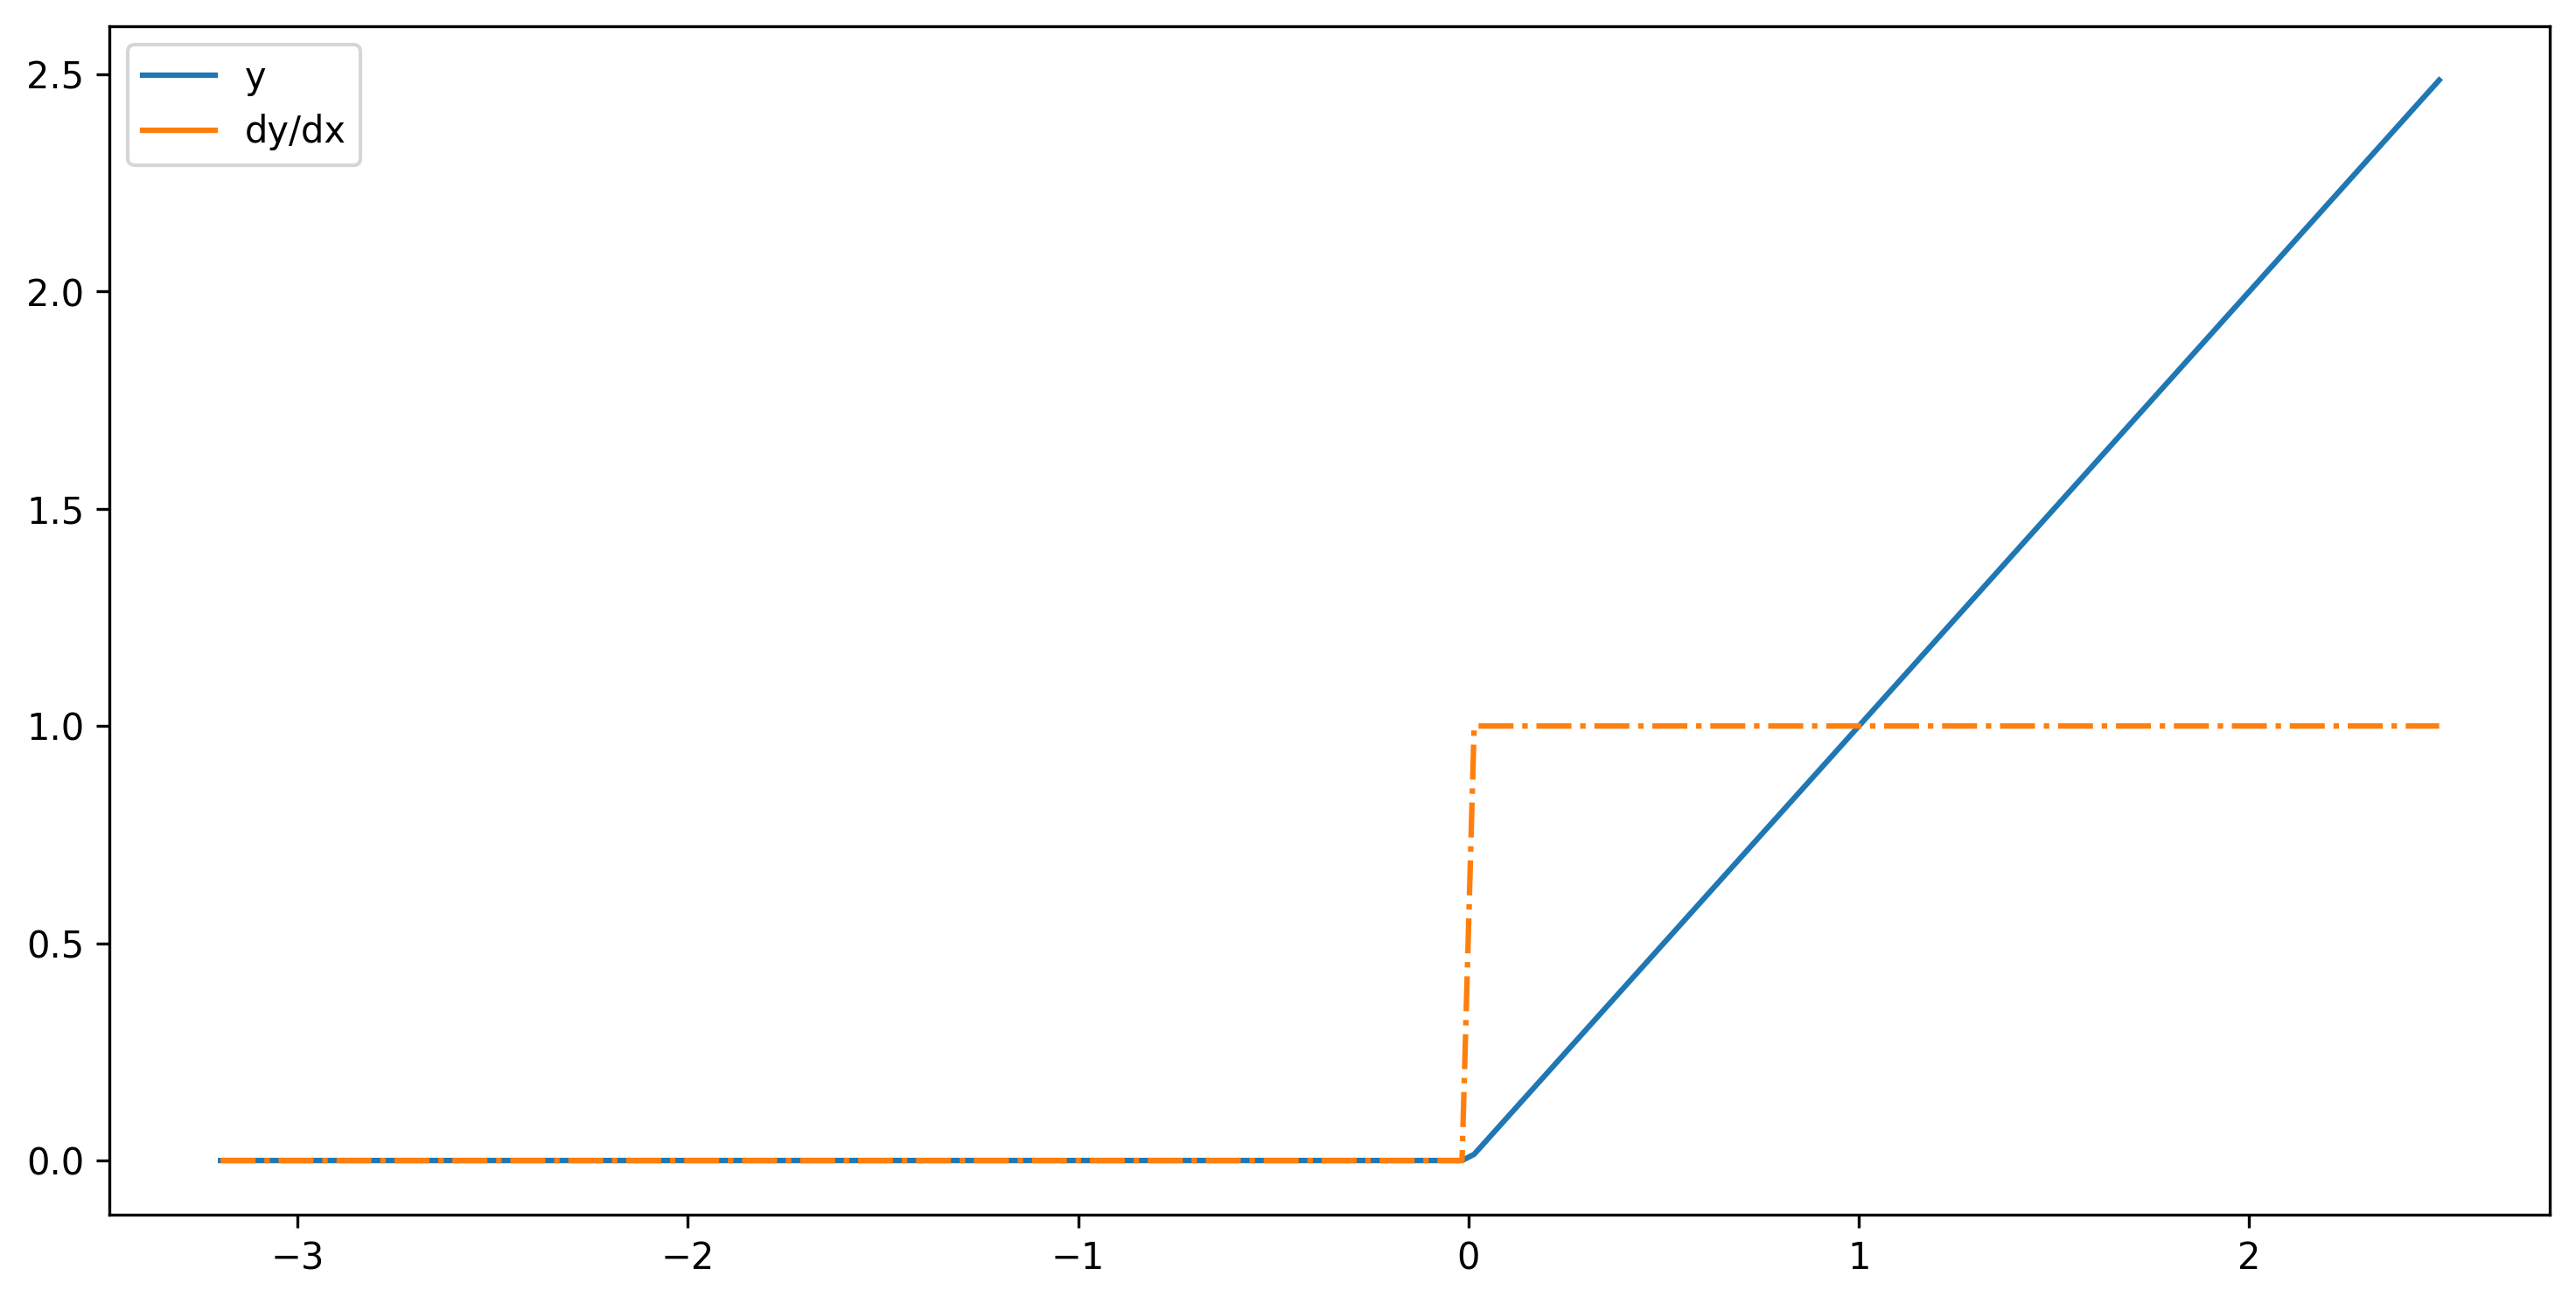

In [66]:
plt.figure(figsize=[12, 6], dpi=300)
ax1 = sns.lineplot(x=x.numpy()[0], y=activated.numpy()[0], label='y')
ax2 = sns.lineplot(x=x.numpy()[0], y=derivative_x.numpy()[0], label='dy/dx')
ax2.lines[1].set_linestyle("dashdot")
# plt.ylim(-1, 1)
plt.savefig('../../images/activation/relu-singel-act.jpg')
plt.show()

- leaky relu

In [12]:
activated = tf.nn.leaky_relu(x)

with tf.GradientTape() as tape:
    tape.reset()
    out = tf.nn.leaky_relu(tf.matmul(tf.transpose(weights), x) + delta)

derivative_x = tape.jacobian(out, delta)

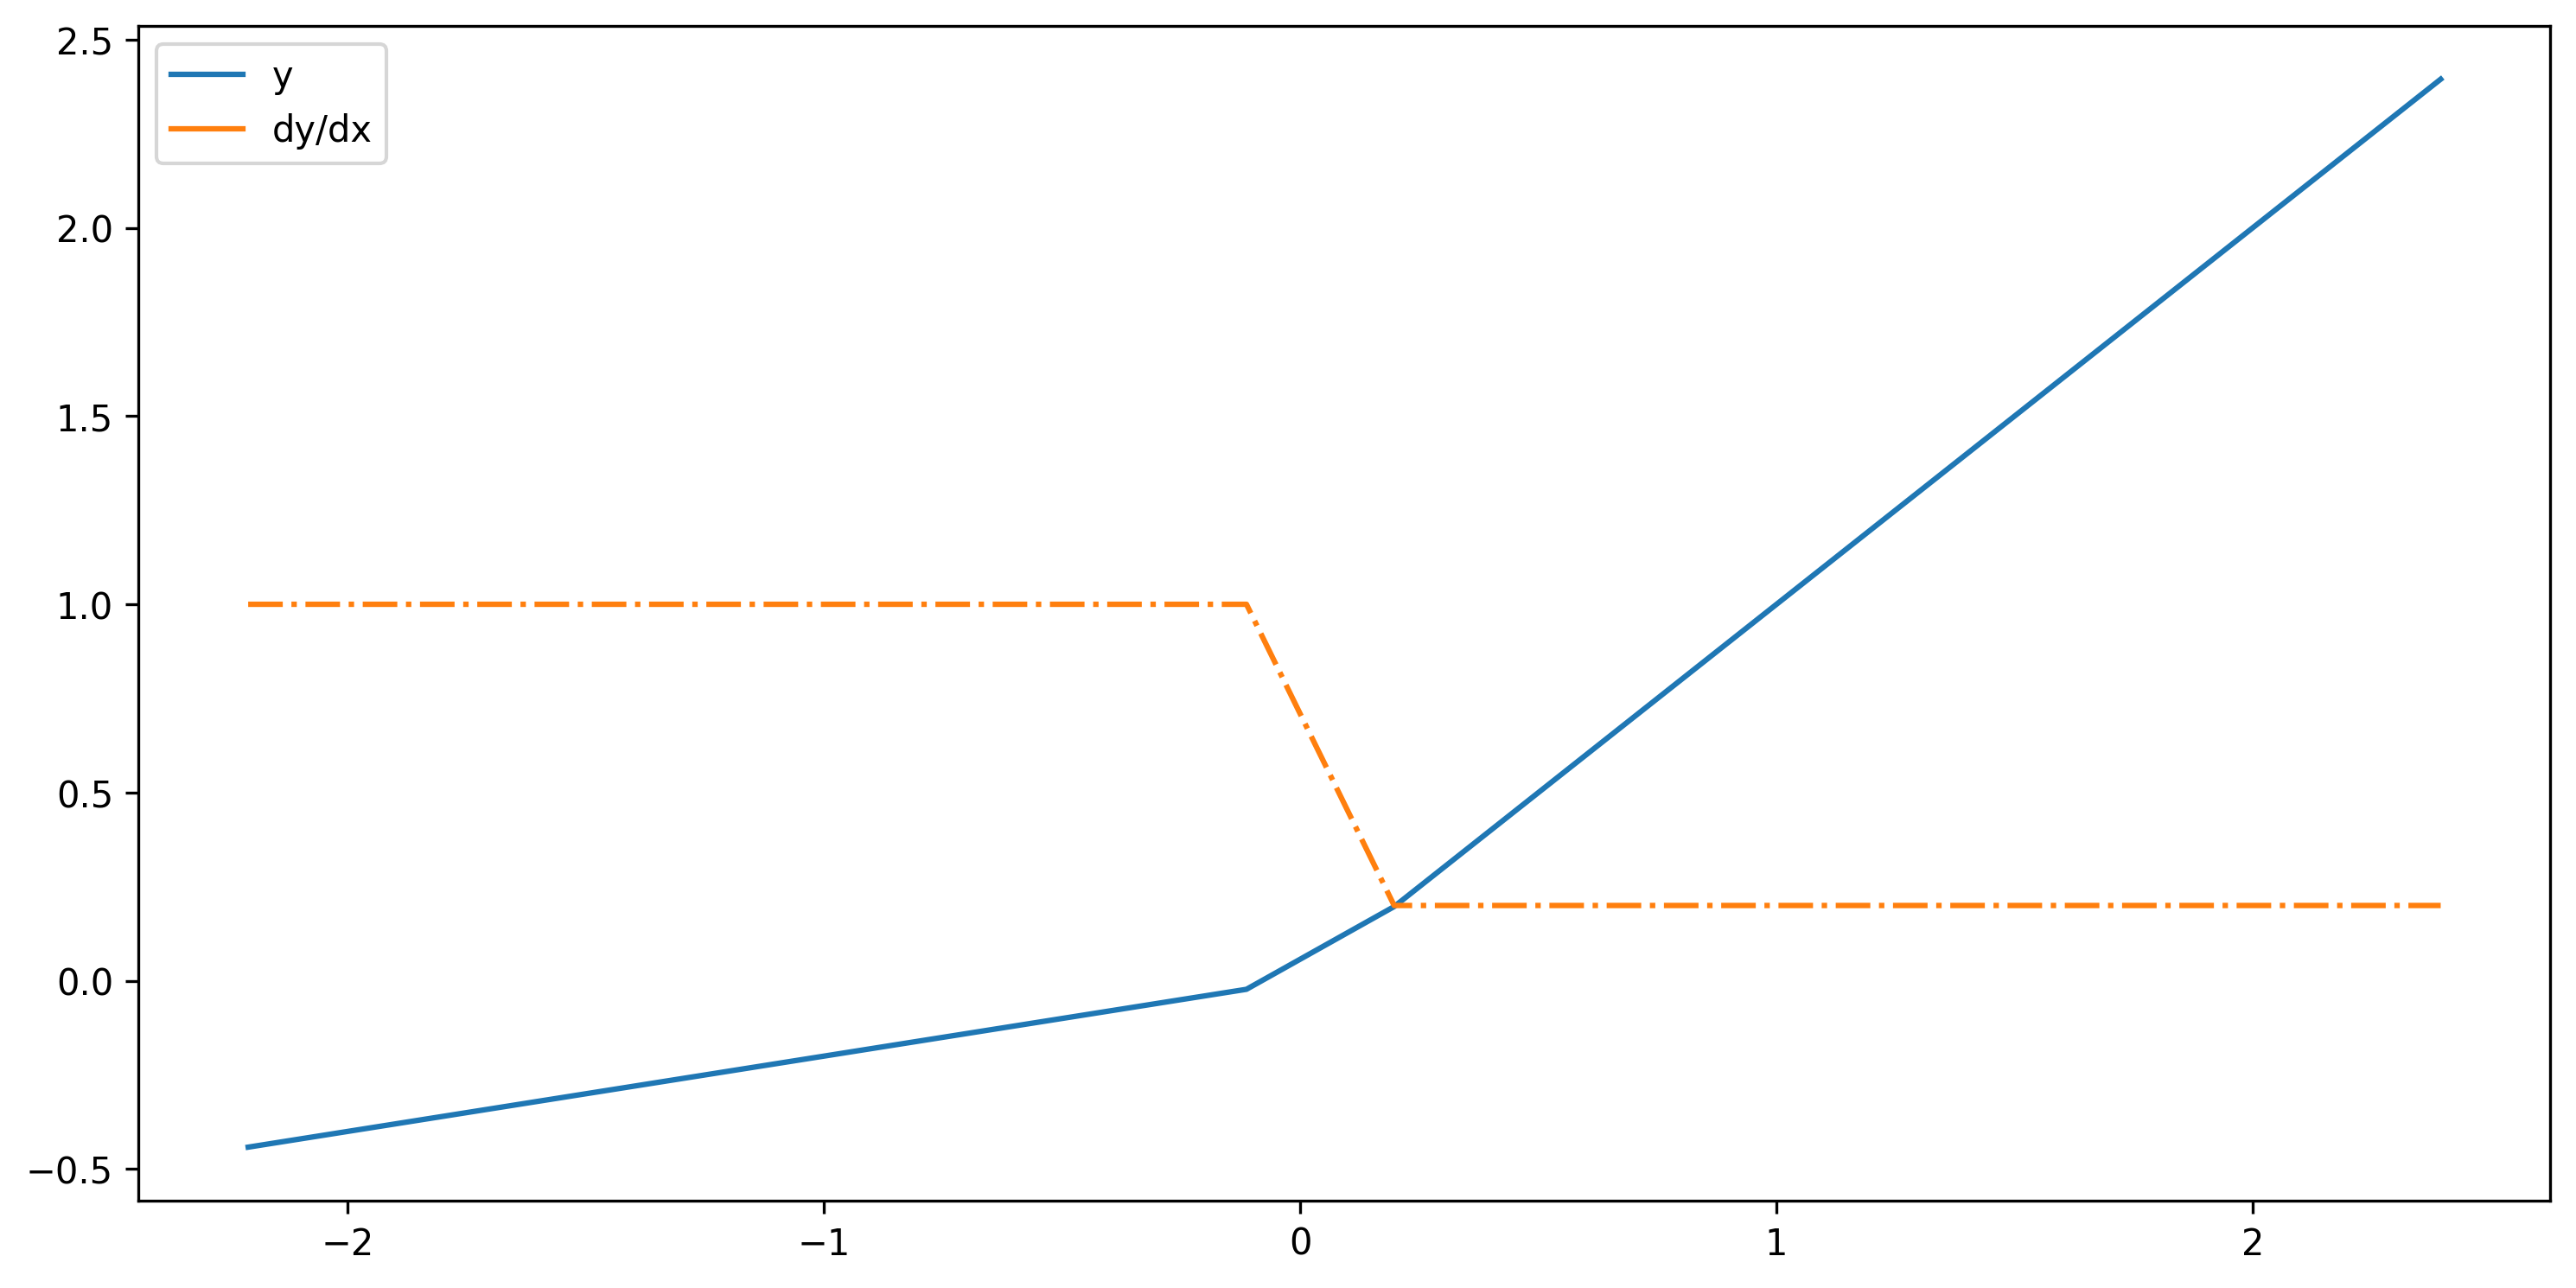

In [7]:
plt.figure(figsize=[12, 6], dpi=300)
ax1 = sns.lineplot(x=x.numpy()[0], y=activated.numpy()[0], label='y')
ax2 = sns.lineplot(x=x.numpy()[0], y=derivative_x.numpy()[0], label='dy/dx')
ax2.lines[1].set_linestyle("dashdot")
# plt.ylim(-1, 1)
plt.savefig('../../images/activation/leaky-relu-singel-act.jpg')
plt.show()

- soft plus

In [17]:
activated = tf.nn.softplus(x)
activated_relu = tf.nn.relu(x)

with tf.GradientTape(persistent=True) as tape:
    tape.reset()
    out = tf.nn.softplus(tf.matmul(tf.transpose(weights), x) + delta)
    out_relu = tf.nn.relu(tf.matmul(tf.transpose(weights), x) + delta)

derivative_x = tape.jacobian(out, delta)
derivative_relu = tape.jacobian(out_relu, delta)

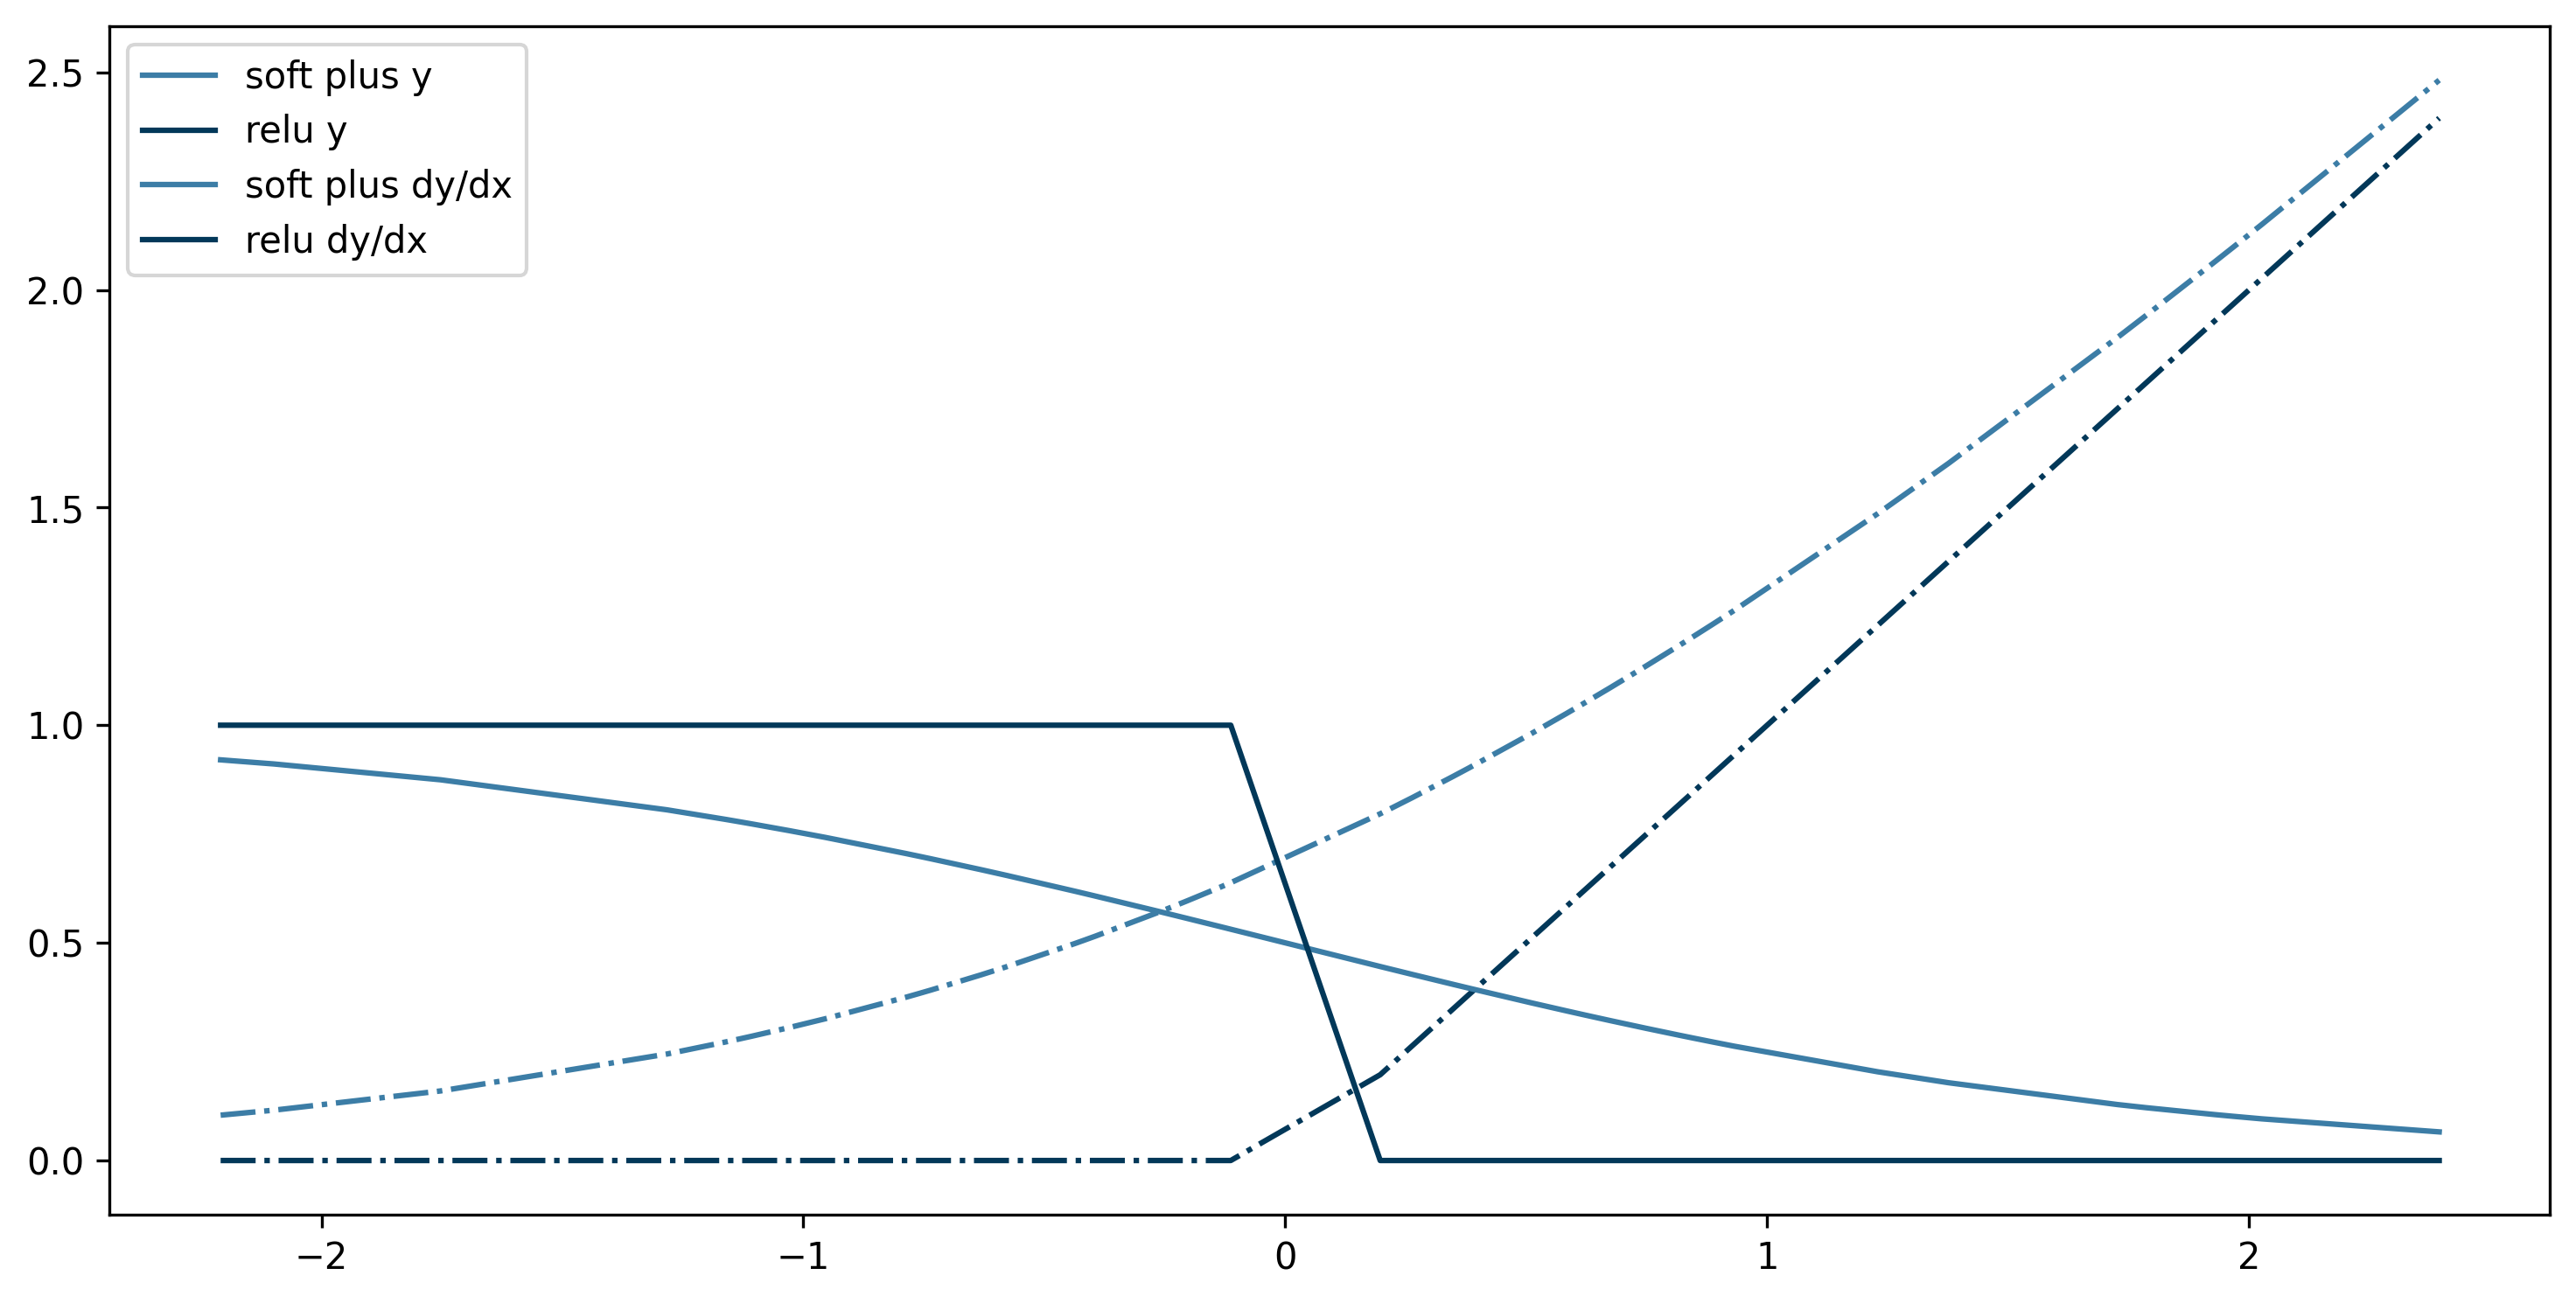

In [21]:
plt.figure(figsize=[12, 6], dpi=300)
ax1 = sns.lineplot(x=x.numpy()[0], y=activated.numpy()[0], label='soft plus y', color='#3C7DA6')
ax2 = sns.lineplot(x=x.numpy()[0], y=activated_relu.numpy()[0], label='relu y', color='#023859')
ax3 = sns.lineplot(x=x.numpy()[0], y=derivative_x.numpy()[0], label='soft plus dy/dx', color='#3C7DA6')
ax4 = sns.lineplot(x=x.numpy()[0], y=derivative_relu.numpy()[0], label='relu dy/dx', color='#023859')
ax3.lines[1].set_linestyle("dashdot")
ax4.lines[0].set_linestyle("dashdot")
# plt.ylim(-1, 1)
plt.savefig('../../images/activation/soft-plus-singel-act.jpg')
plt.show()

- elu

In [ ]:
activated = tf.nn.elu(x)

with tf.GradientTape() as tape:
    tape.reset()
    out = tf.nn.elu(tf.matmul(tf.transpose(weights), x) + delta)

derivative_x = tape.jacobian(out, delta)

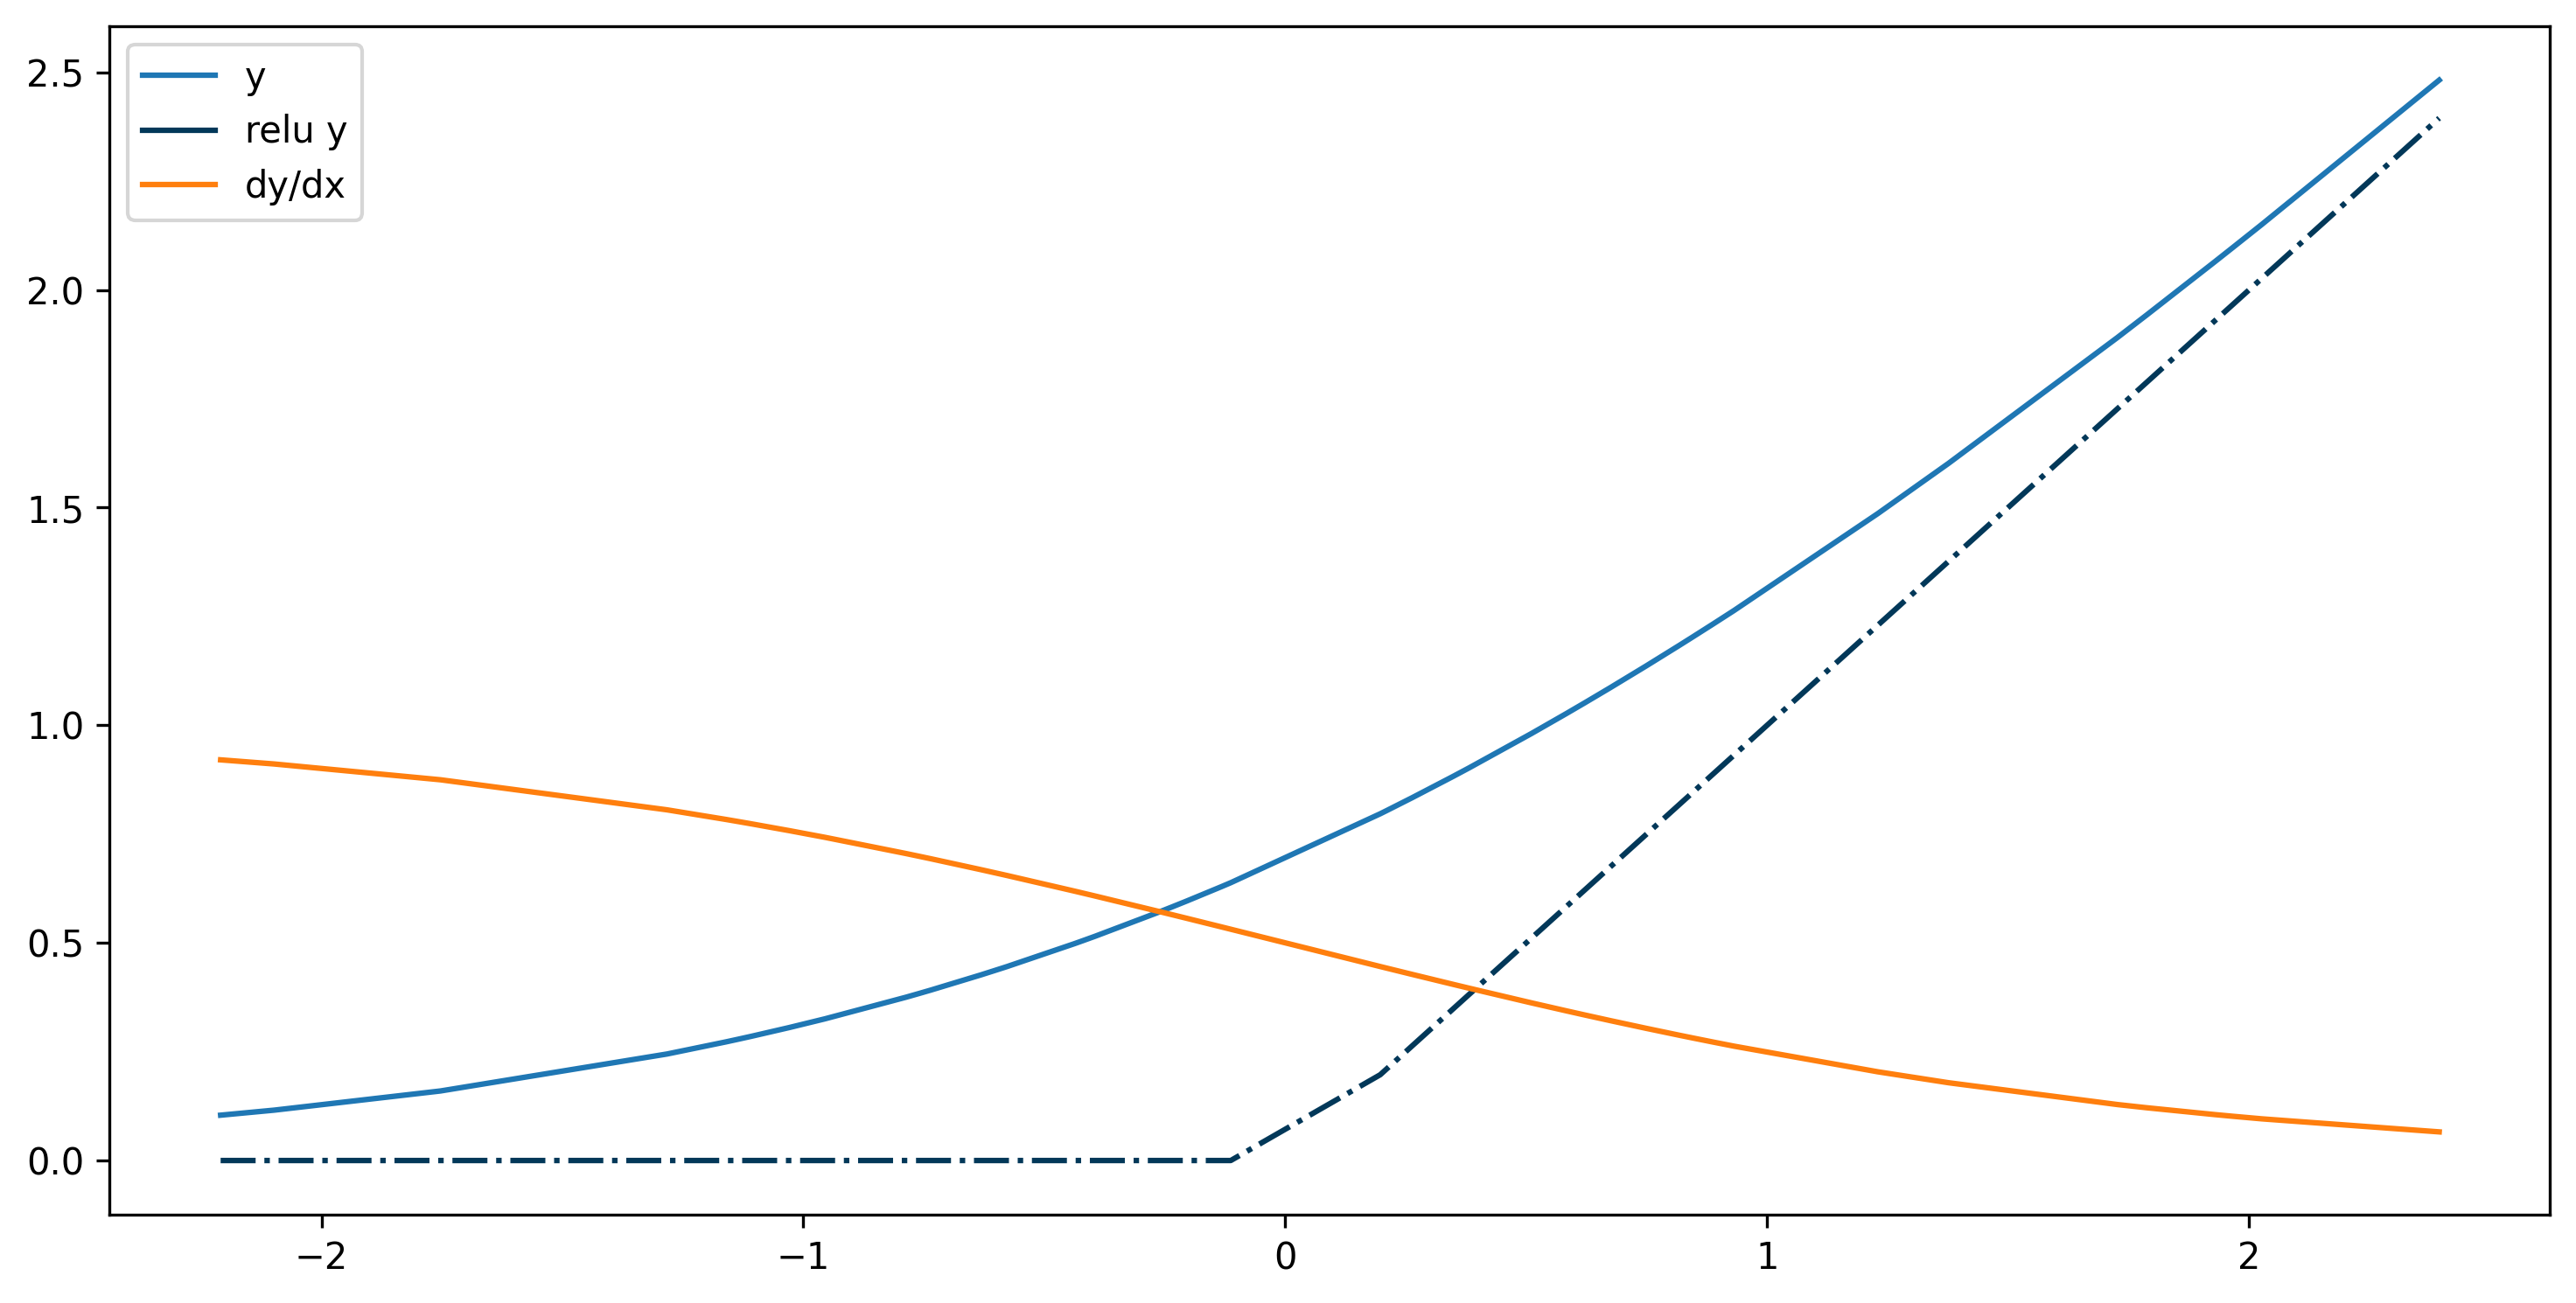

In [23]:
plt.figure(figsize=[12, 6], dpi=300)
ax1 = sns.lineplot(x=x.numpy()[0], y=activated.numpy()[0], label='y')
ax2 = sns.lineplot(x=x.numpy()[0], y=activated_relu.numpy()[0], label='relu y', color='#023859')
ax2 = sns.lineplot(x=x.numpy()[0], y=derivative_x.numpy()[0], label='dy/dx')
ax2.lines[1].set_linestyle("dashdot")
# plt.ylim(-1, 1)
plt.savefig('../../images/activation/elu-singel-act.jpg')
plt.show()

- selu

In [24]:
activated = tf.nn.selu(x)

with tf.GradientTape() as tape:
    tape.reset()
    out = tf.nn.selu(tf.matmul(tf.transpose(weights), x) + delta)

derivative_x = tape.jacobian(out, delta)

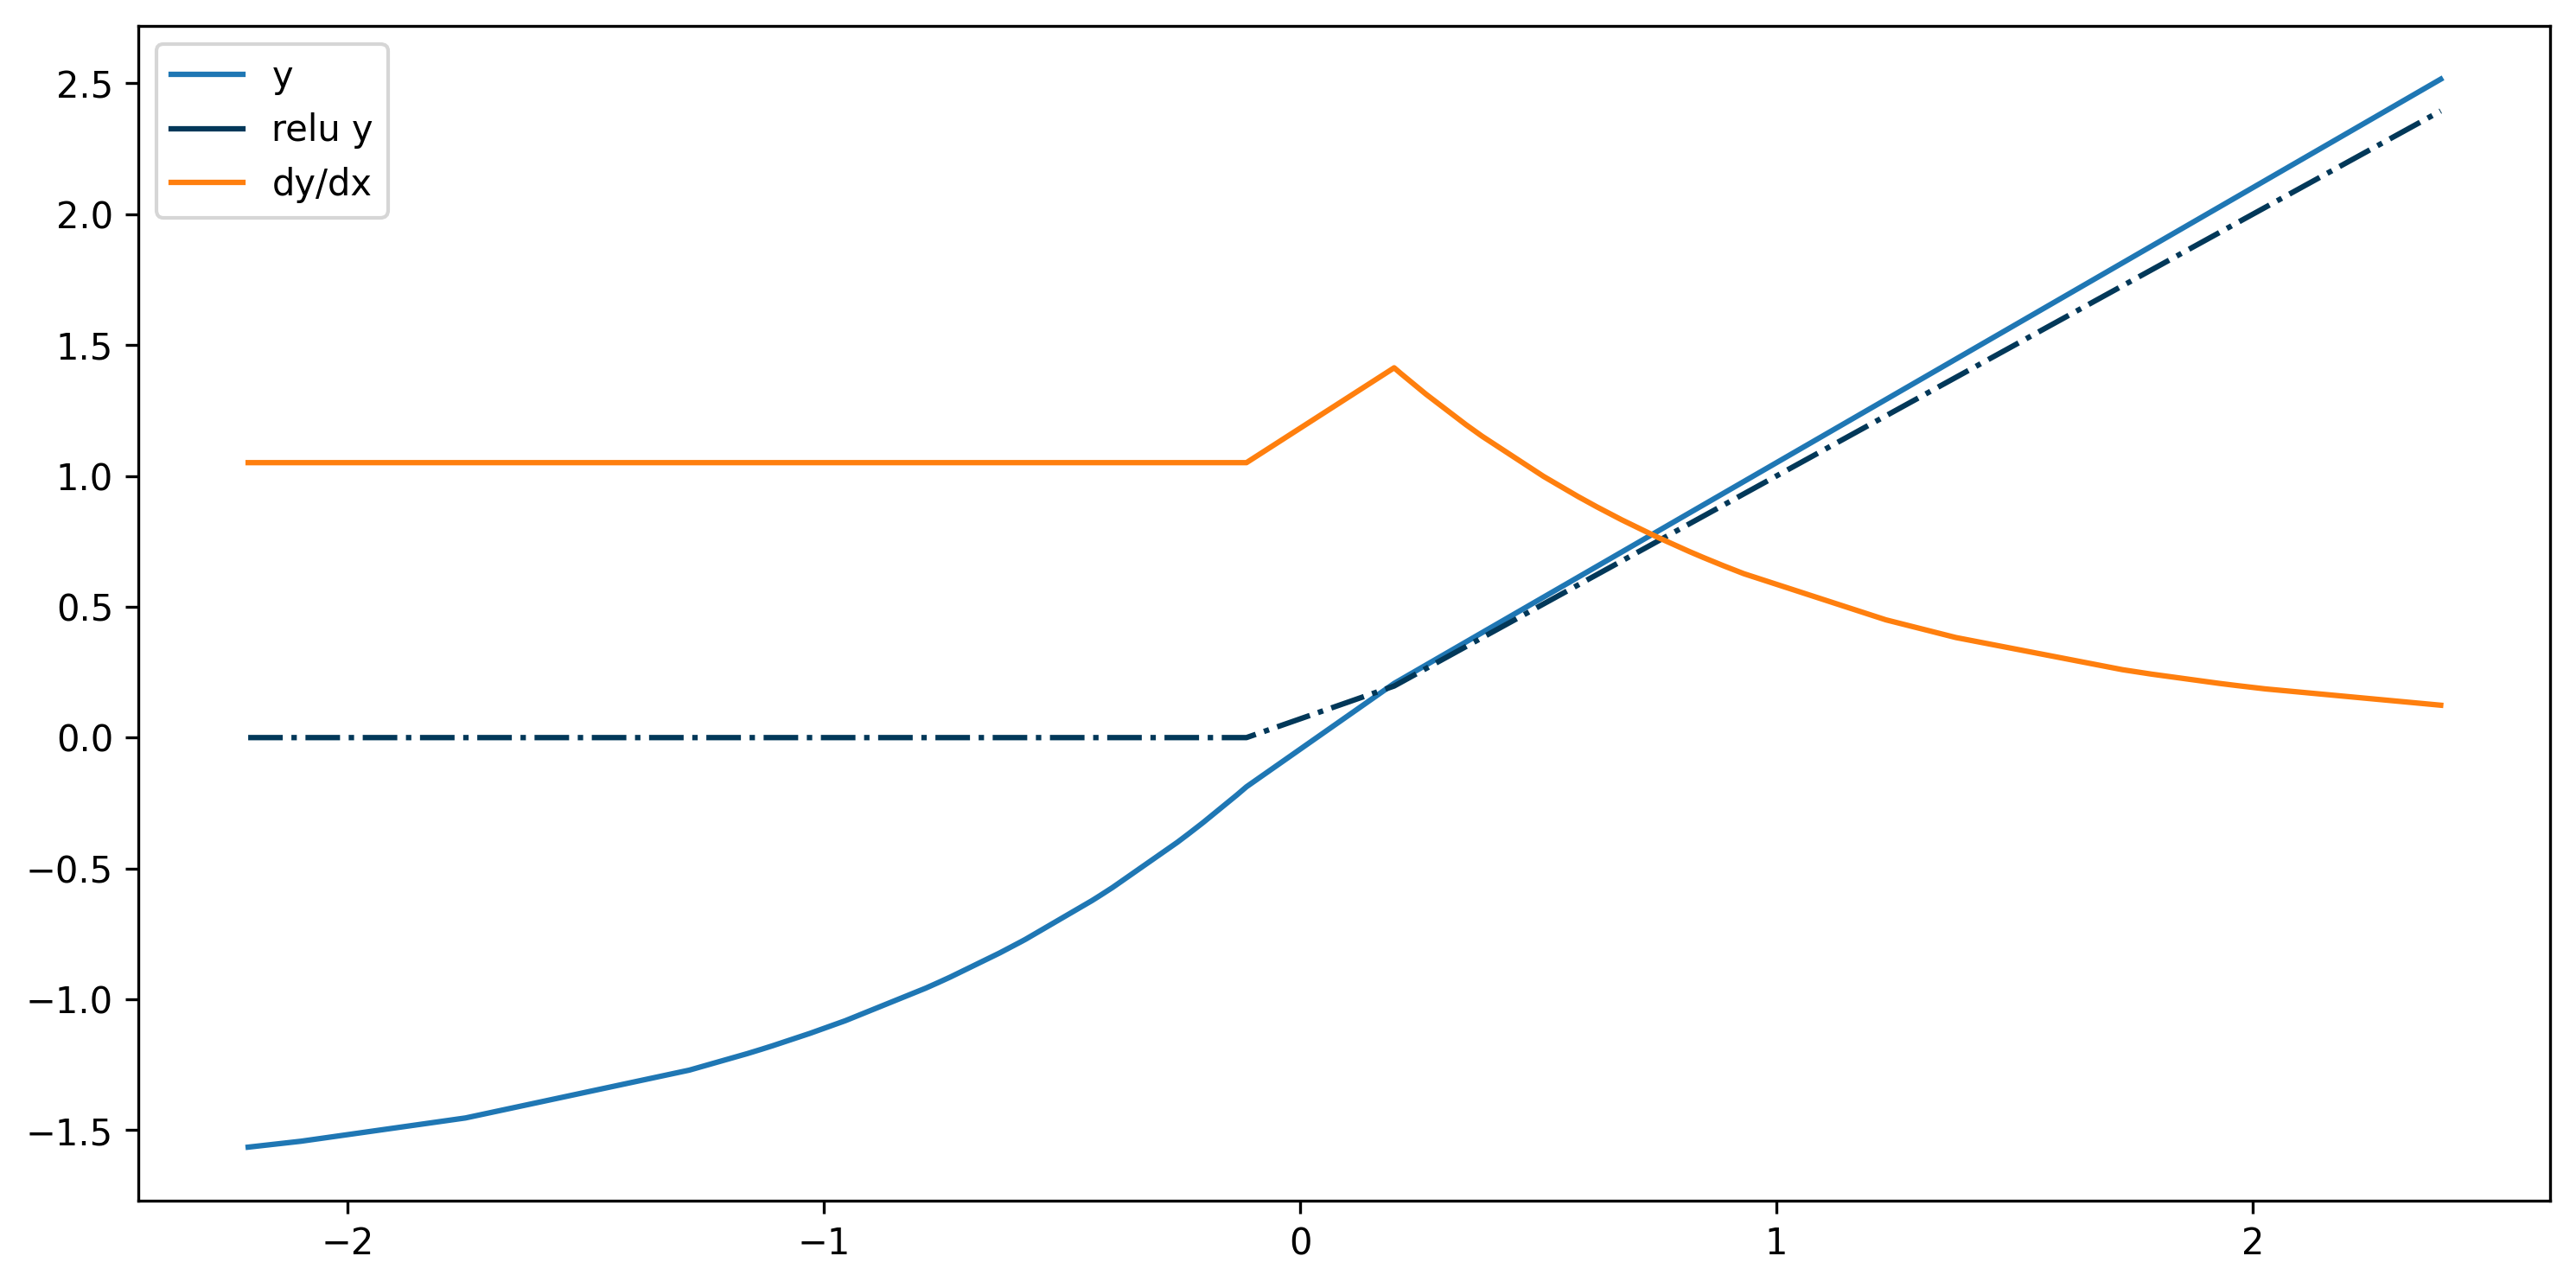

In [25]:
plt.figure(figsize=[12, 6], dpi=300)
ax1 = sns.lineplot(x=x.numpy()[0], y=activated.numpy()[0], label='y')
ax2 = sns.lineplot(x=x.numpy()[0], y=activated_relu.numpy()[0], label='relu y', color='#023859')
ax2 = sns.lineplot(x=x.numpy()[0], y=derivative_x.numpy()[0], label='dy/dx')
ax2.lines[1].set_linestyle("dashdot")
# plt.ylim(-1, 1)
plt.savefig('../../images/activation/selu-singel-act.jpg')
plt.show()

- swish

In [26]:
activated = tf.nn.swish(x)

with tf.GradientTape(persistent=True) as tape:
    tape.reset()
    out = tf.nn.swish(tf.matmul(tf.transpose(weights), x) + delta)

derivative_x = tape.jacobian(out, delta)

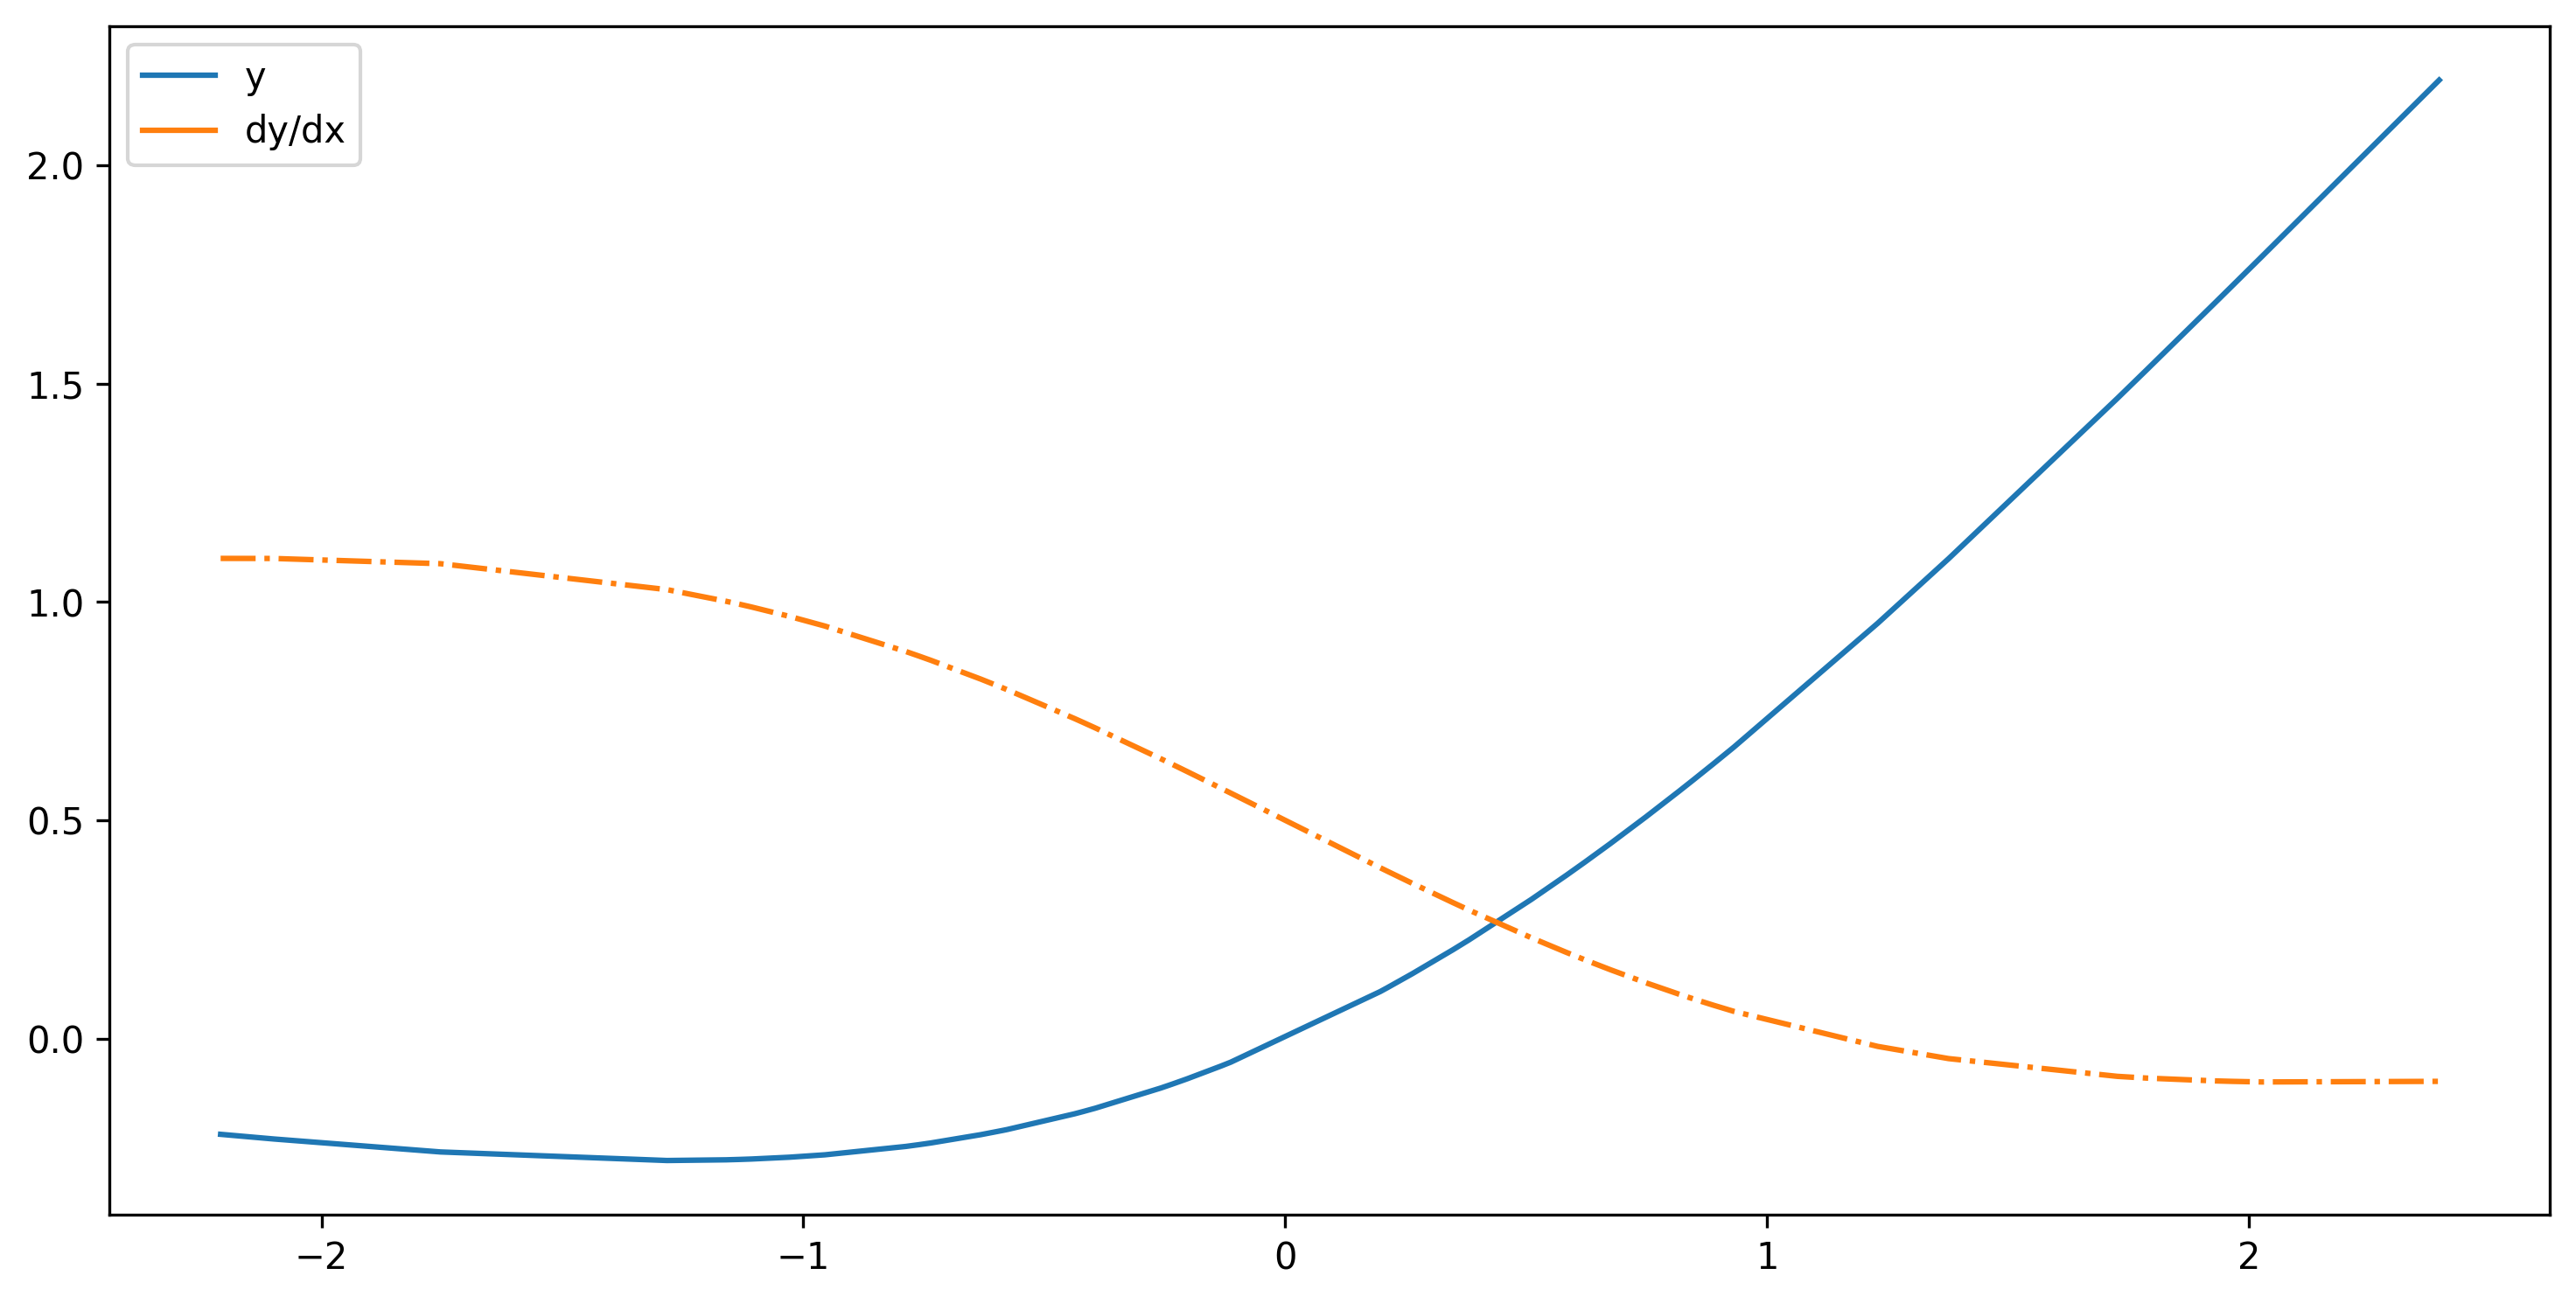

In [27]:
plt.figure(figsize=[12, 6], dpi=300)
ax1 = sns.lineplot(x=x.numpy()[0], y=activated.numpy()[0], label='y')
ax2 = sns.lineplot(x=x.numpy()[0], y=derivative_x.numpy()[0], label='dy/dx')
ax2.lines[1].set_linestyle("dashdot")
# plt.ylim(-1, 1)
plt.savefig('../../images/activation/swish-singel-act.jpg')
plt.show()

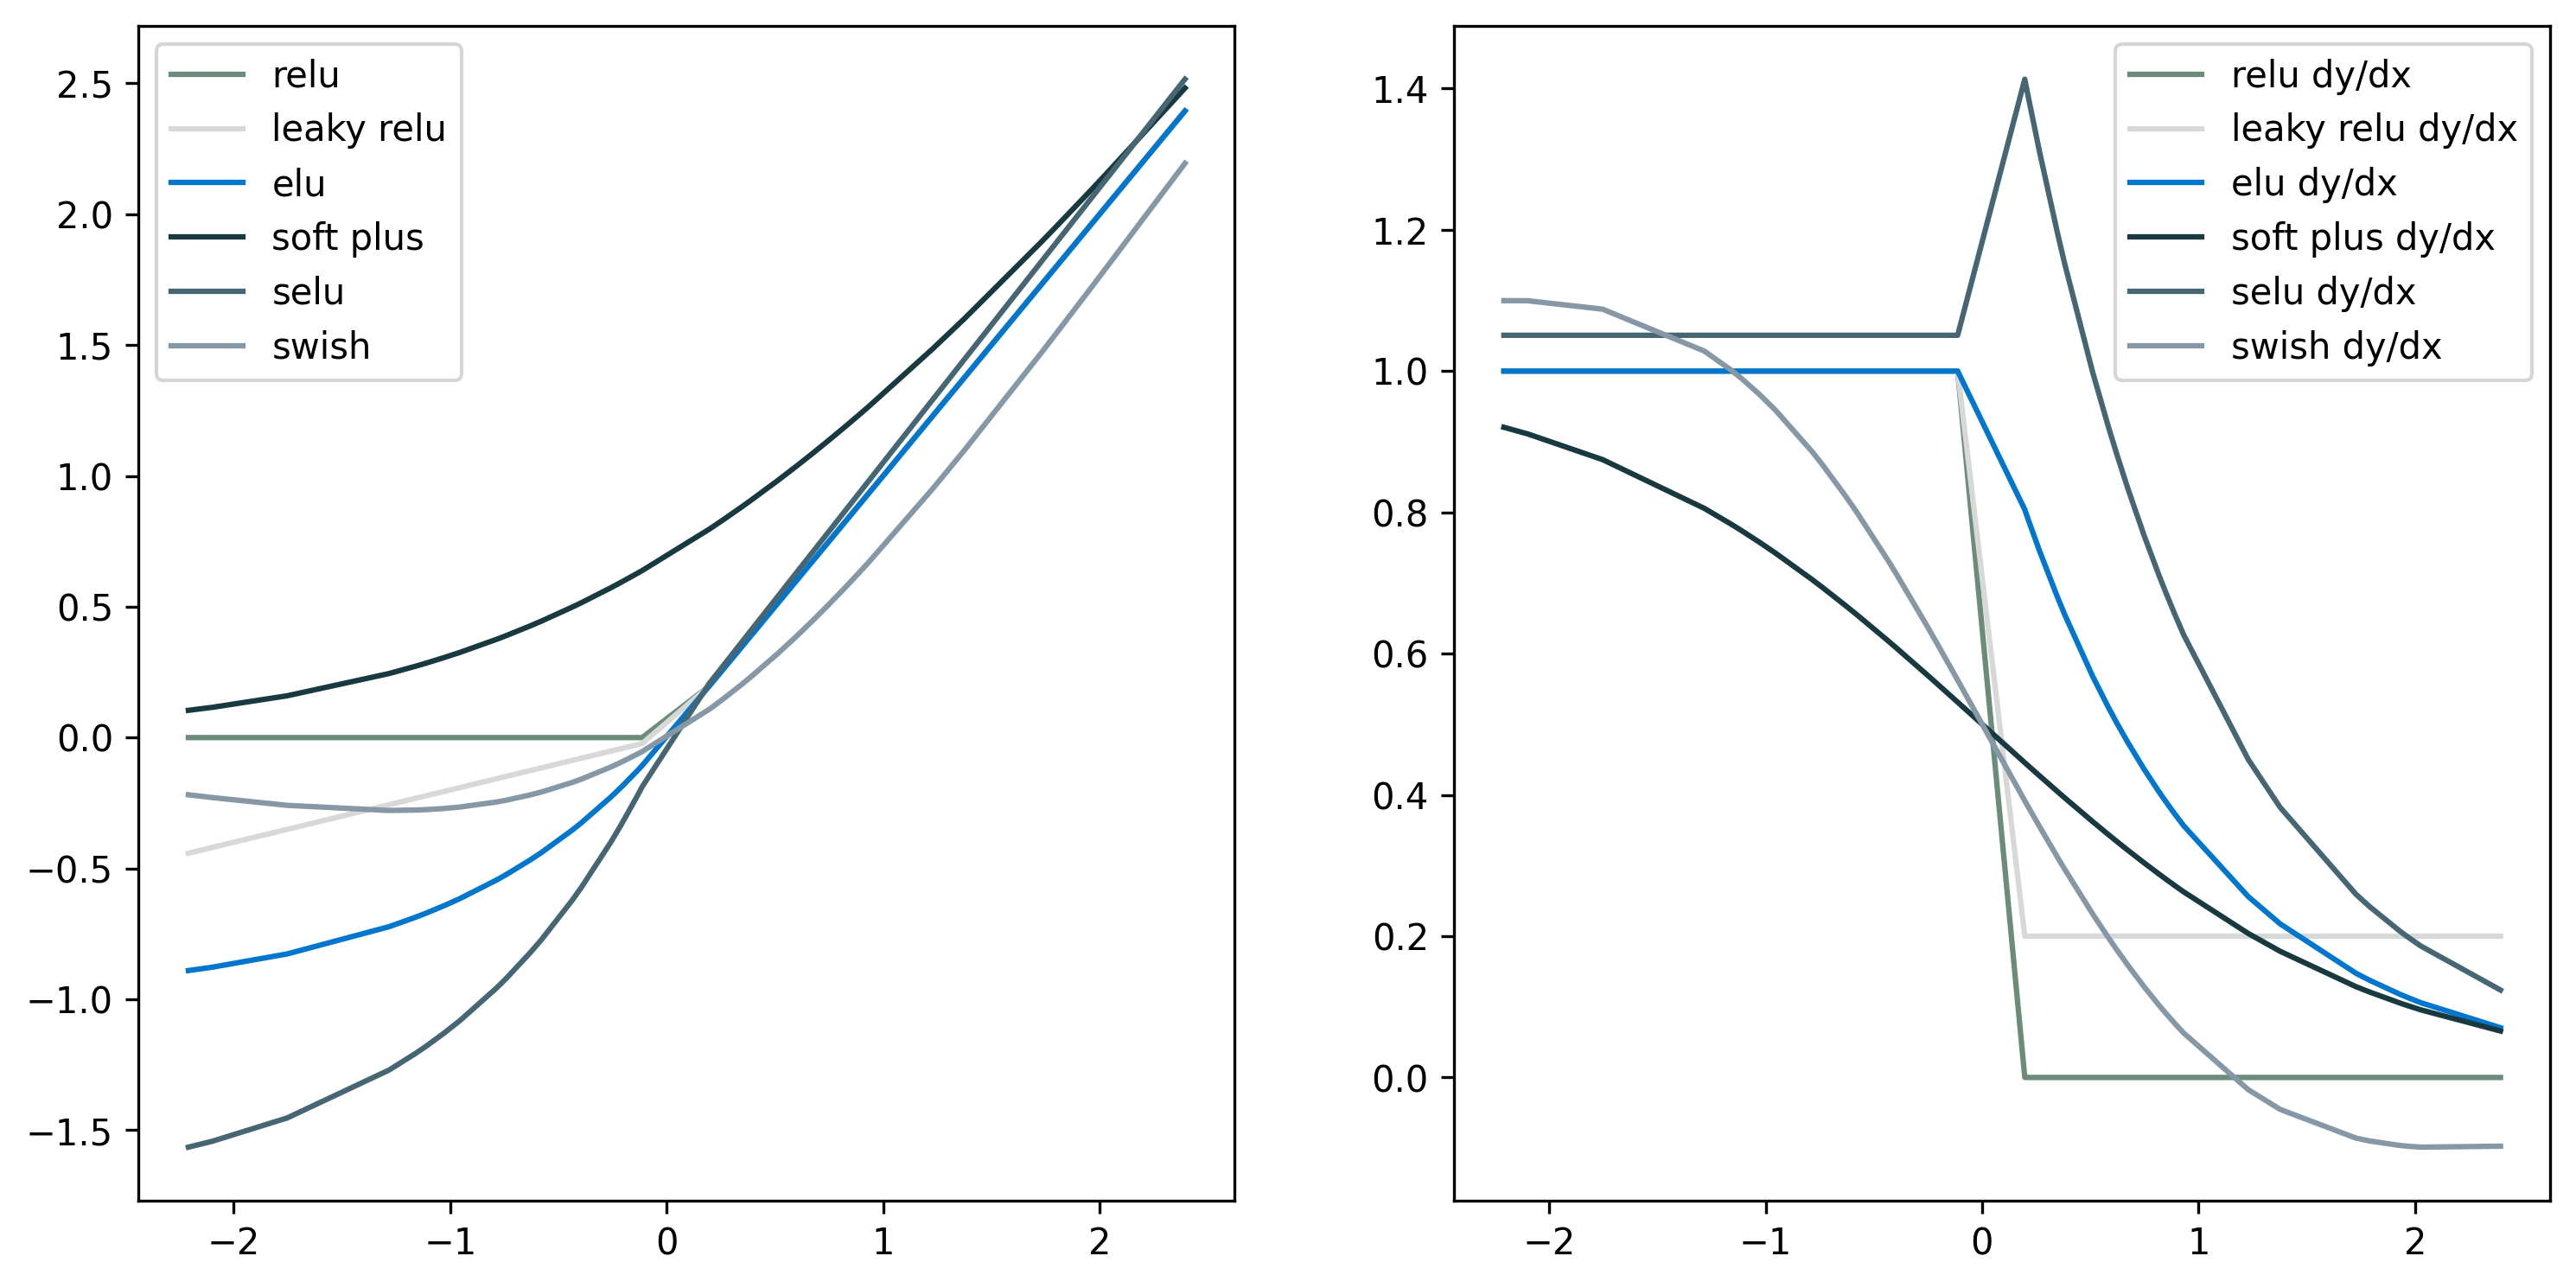

In [30]:
with tf.GradientTape(persistent=True) as tape:
    out1 = tf.nn.relu(tf.matmul(tf.transpose(weights), x) + delta)
    out2 = tf.nn.leaky_relu(tf.matmul(tf.transpose(weights), x) + delta)
    out3 = tf.nn.elu(tf.matmul(tf.transpose(weights), x) + delta)
    out4 = tf.nn.softplus(tf.matmul(tf.transpose(weights), x) + delta)
    out5 = tf.nn.selu(tf.matmul(tf.transpose(weights), x) + delta)
    out6 = tf.nn.swish(tf.matmul(tf.transpose(weights), x) + delta)

derivative_1 = tape.jacobian(out1, delta)
derivative_2 = tape.jacobian(out2, delta)
derivative_3 = tape.jacobian(out3, delta)
derivative_4 = tape.jacobian(out4, delta)
derivative_5 = tape.jacobian(out5, delta)
derivative_6 = tape.jacobian(out6, delta)

figure, axes = plt.subplots(nrows=1, ncols=2, figsize=[12, 6], dpi=300)

sns.lineplot(x=x.numpy()[0], y=tf.nn.relu(x).numpy()[0], label='relu', color='#6C8C7A', ax=axes[0])
sns.lineplot(x=x.numpy()[0], y=tf.nn.leaky_relu(x).numpy()[0], label='leaky relu', color='#D7D9D8', ax=axes[0])
sns.lineplot(x=x.numpy()[0], y=tf.nn.elu(x).numpy()[0], label='elu', color='#0076CF', ax=axes[0])
sns.lineplot(x=x.numpy()[0], y=tf.nn.softplus(x).numpy()[0], label='soft plus', color='#183940', ax=axes[0])
sns.lineplot(x=x.numpy()[0], y=tf.nn.selu(x).numpy()[0], label='selu', color='#466673', ax=axes[0])
sns.lineplot(x=x.numpy()[0], y=tf.nn.swish(x).numpy()[0], label='swish', color='#8697A6', ax=axes[0])

sns.lineplot(x=x.numpy()[0], y=derivative_1.numpy()[0], label='relu dy/dx', color='#6C8C7A', ax=axes[1])
sns.lineplot(x=x.numpy()[0], y=derivative_2.numpy()[0], label='leaky relu dy/dx', color='#D7D9D8', ax=axes[1])
sns.lineplot(x=x.numpy()[0], y=derivative_3.numpy()[0], label='elu dy/dx', color='#0076CF', ax=axes[1])
sns.lineplot(x=x.numpy()[0], y=derivative_4.numpy()[0], label='soft plus dy/dx', color='#183940', ax=axes[1])
sns.lineplot(x=x.numpy()[0], y=derivative_5.numpy()[0], label='selu dy/dx', color='#466673', ax=axes[1])
sns.lineplot(x=x.numpy()[0], y=derivative_6.numpy()[0], label='swish dy/dx', color='#8697A6', ax=axes[1])

# axes[0].set_ylim(-1, 1)
# axes[1].set_ylim(0, 1)

plt.savefig('../../images/activation/pairwise-type-singel-act.jpg')
plt.show()

## Test with model

In [ ]:
generator = ImageDataGenerator(rescale=1 / 255.,
                               validation_split=0.2)

train_batch = generator.flow_from_directory(directory='',
                                            target_size=(150, 150),
                                            subset='training')

valid_batch = generator.flow_from_directory(directory='',
                                            target_size=(150, 150),
                                            subset='validation')

test_batch = generator.flow_from_directory(directory='',
                                           target_size=(150, 150))

In [ ]:
def build(activation, classes, input_shape):
    input_layer = Input(shape=input_shape)
    x = Conv2D(filters=64, kernel_size=(5, 5), strides=(2, 2), padding='same', activation=activation)(input_layer)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation=activation)(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation=activation)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation=activation)(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation=activation)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation=activation)(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation=activation)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    output_layer = Dense(classes, activation=softmax)(x)

    model = Model(input_layer, output_layer)

    return model

In [ ]:
history_dict = {}
activations = ['sigmoid', 'tanh', 'soft_sign', 'relu', 'leaky_relu', 'elu', 'soft_plus', 'selu', 'swish']

for activation in activations:
    k_fold_history = []

    if activation == 'sigmoid':
        activation_func = tf.nn.sigmoid
    elif activation == 'tanh':
        activation_func = tf.nn.tanh
    elif activation == 'soft_sign':
        activation_func = tf.nn.softsign
    elif activation == 'relu':
        activation_func = tf.nn.relu
    elif activation == 'leaky_relu':
        activation_func = tf.nn.leaky_relu
    elif activation == 'elu':
        activation_func = tf.nn.elu
    elif activation == 'soft_plus':
        activation_func = tf.nn.softplus
    elif activation == 'selu':
        activation_func = tf.nn.selu
    else:
        activation_func = tf.nn.swish

    for _ in range(5):
        model = build(activation=activation_func, classes=6, input_shape=(150, 150, 3))

        model.compile(optimizer=Adam(),
                      loss=categorical_crossentropy,
                      metrics=['accuracy'])

        history = model.fit(train_batch,
                            epochs=10,
                            steps_per_epoch=175,
                            validation_data=valid_batch)

        test_result = model.evaluate(test_batch)

        k_fold_history.append([history.history, test_result])

        history_dict[activation] = [k_fold_history]

## evaluation of activations

In [42]:
results.keys()

dict_keys(['sigmoid', 'tanh', 'soft_sign', 'relu', 'leaky_relu', 'elu', 'soft_plus', 'selu', 'swish'])

In [7]:
len(results['sigmoid'][0])

5

In [9]:
results['sigmoid'][0][0].keys()

dict_keys(['train', 'evaluation'])

- sigmoid

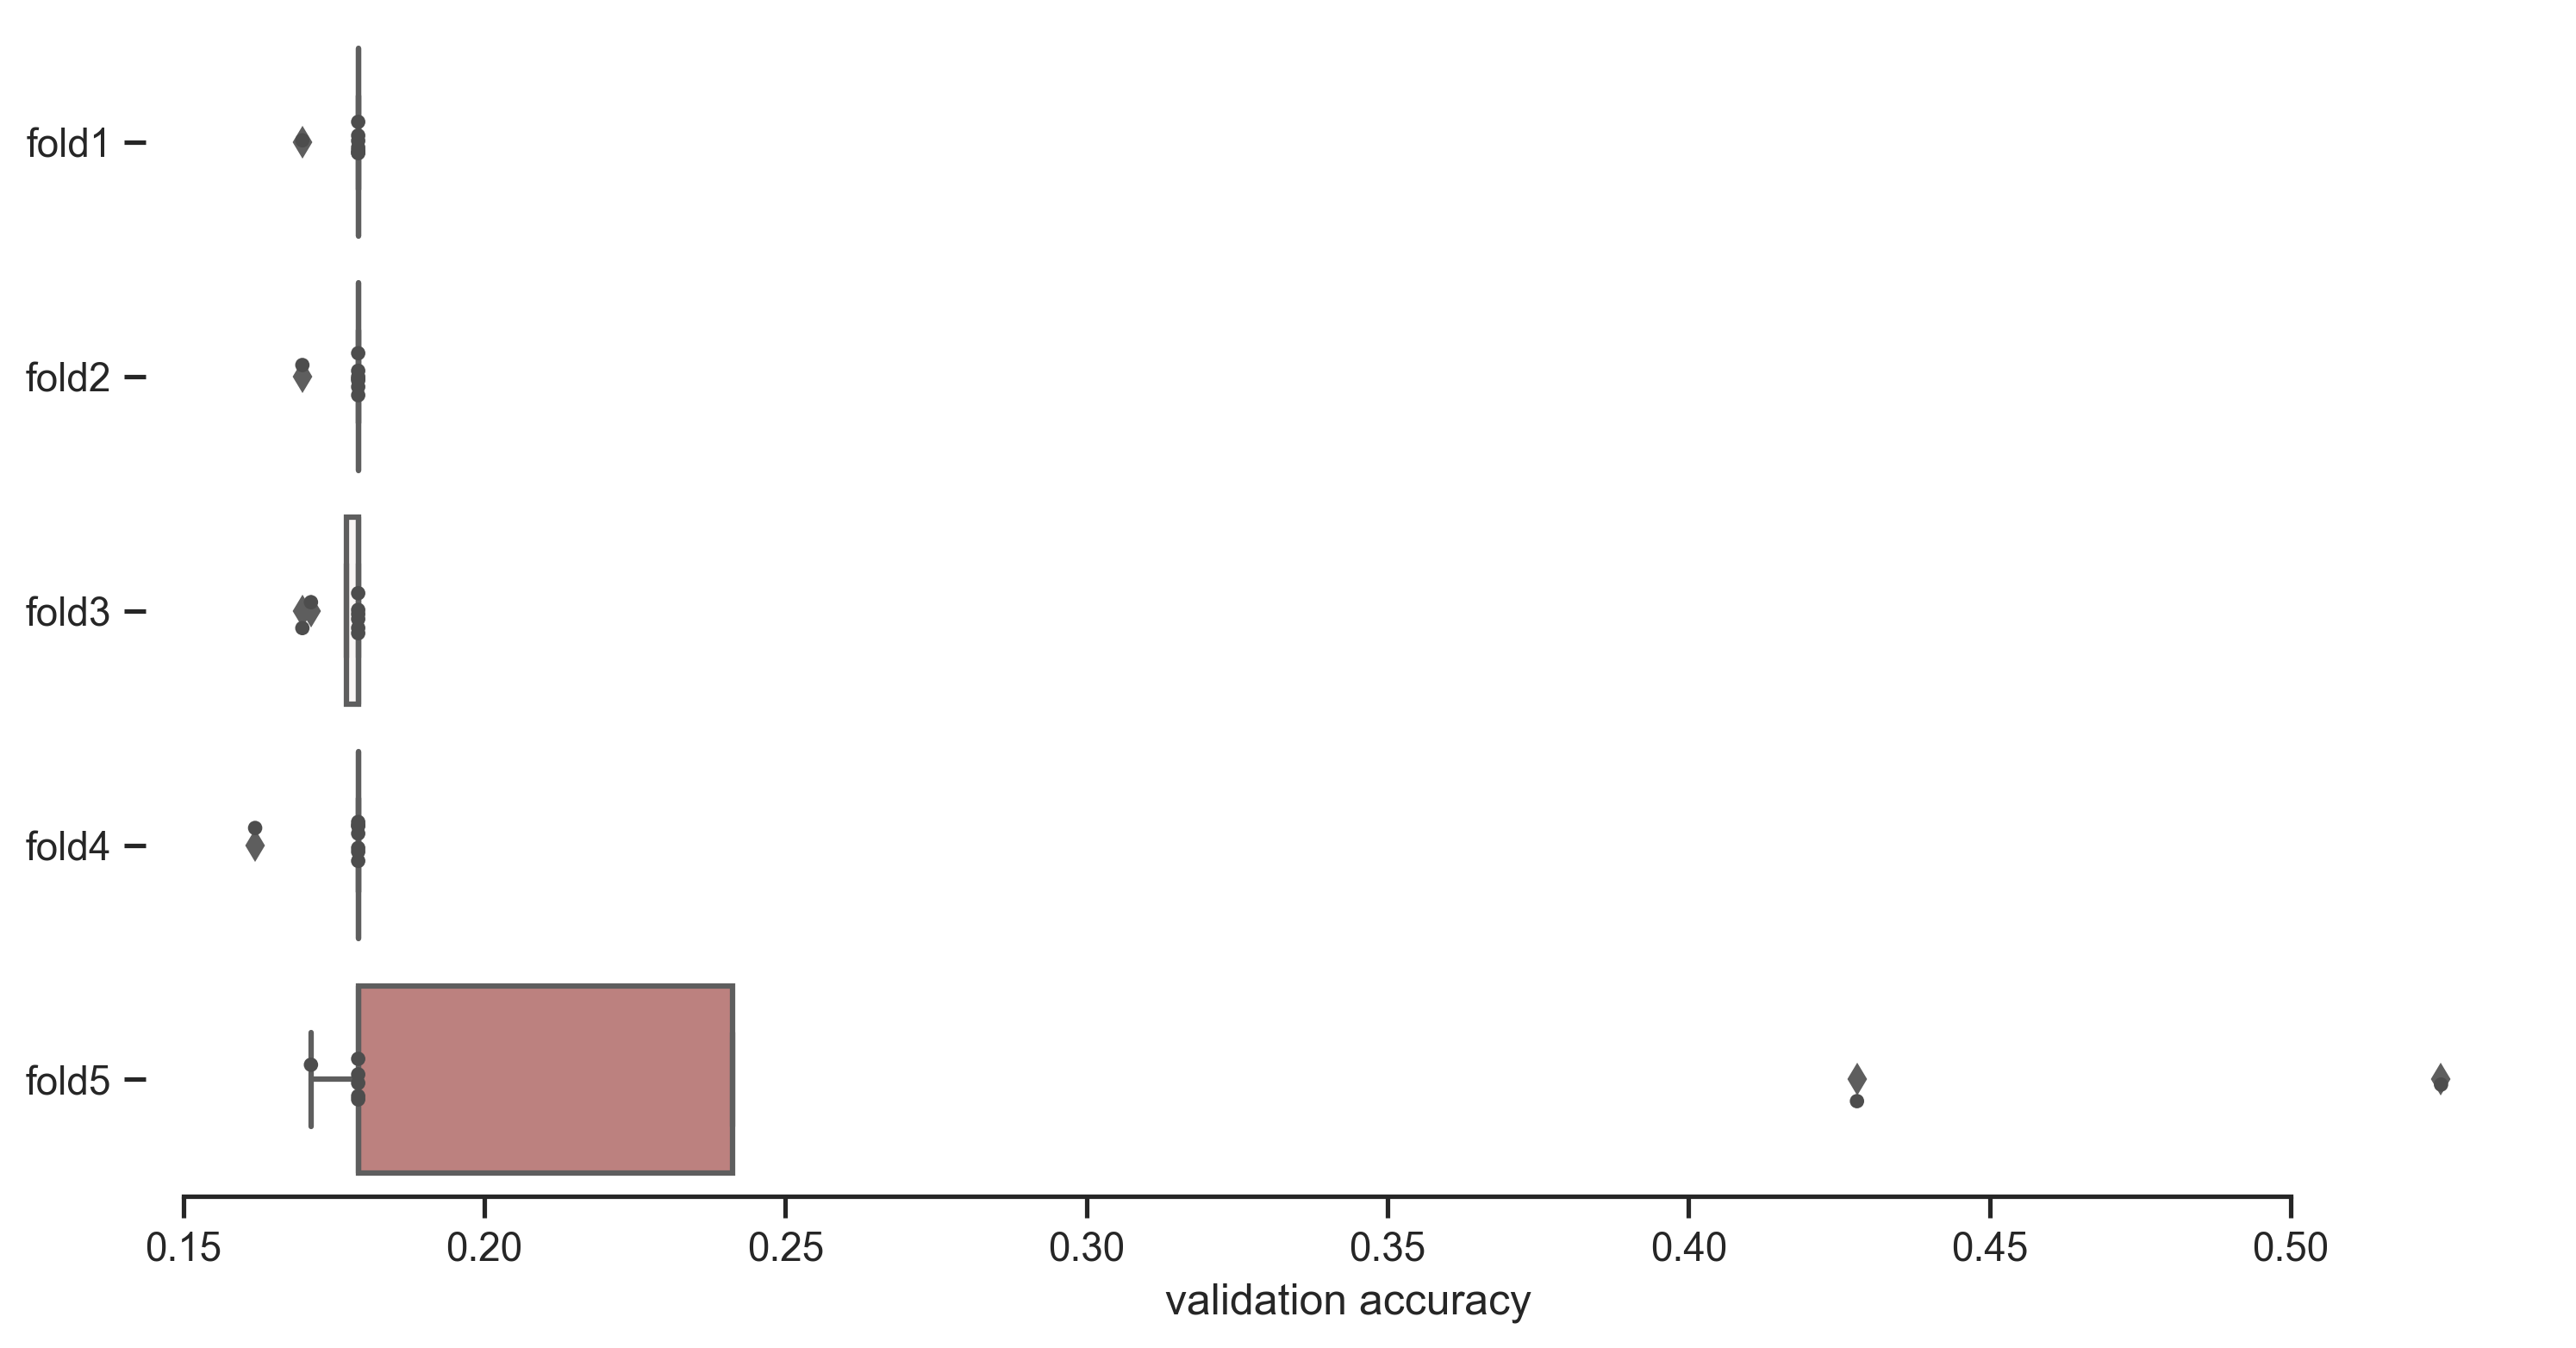

In [32]:
val_acc = pd.DataFrame()

for i in range(len(results['sigmoid'][0])):
    val_acc[f'fold{i + 1}'] = (np.array(results['sigmoid'][0][i]['train']['val_accuracy']))

sns.set_theme(style="ticks")

plt.figure(figsize=[12, 6], dpi=300)
# plt.xscale("log")

sns.boxplot(data=val_acc, orient="h", palette="vlag")
sns.stripplot(data=val_acc, orient="h", size=4, color=".3", linewidth=0)

# Tweak the visual presentation
plt.xlabel('validation accuracy')
sns.despine(trim=True, left=True)

plt.savefig('../../images/activation/sigmoid-act-val-acc.jpg')
plt.show()

- tanh

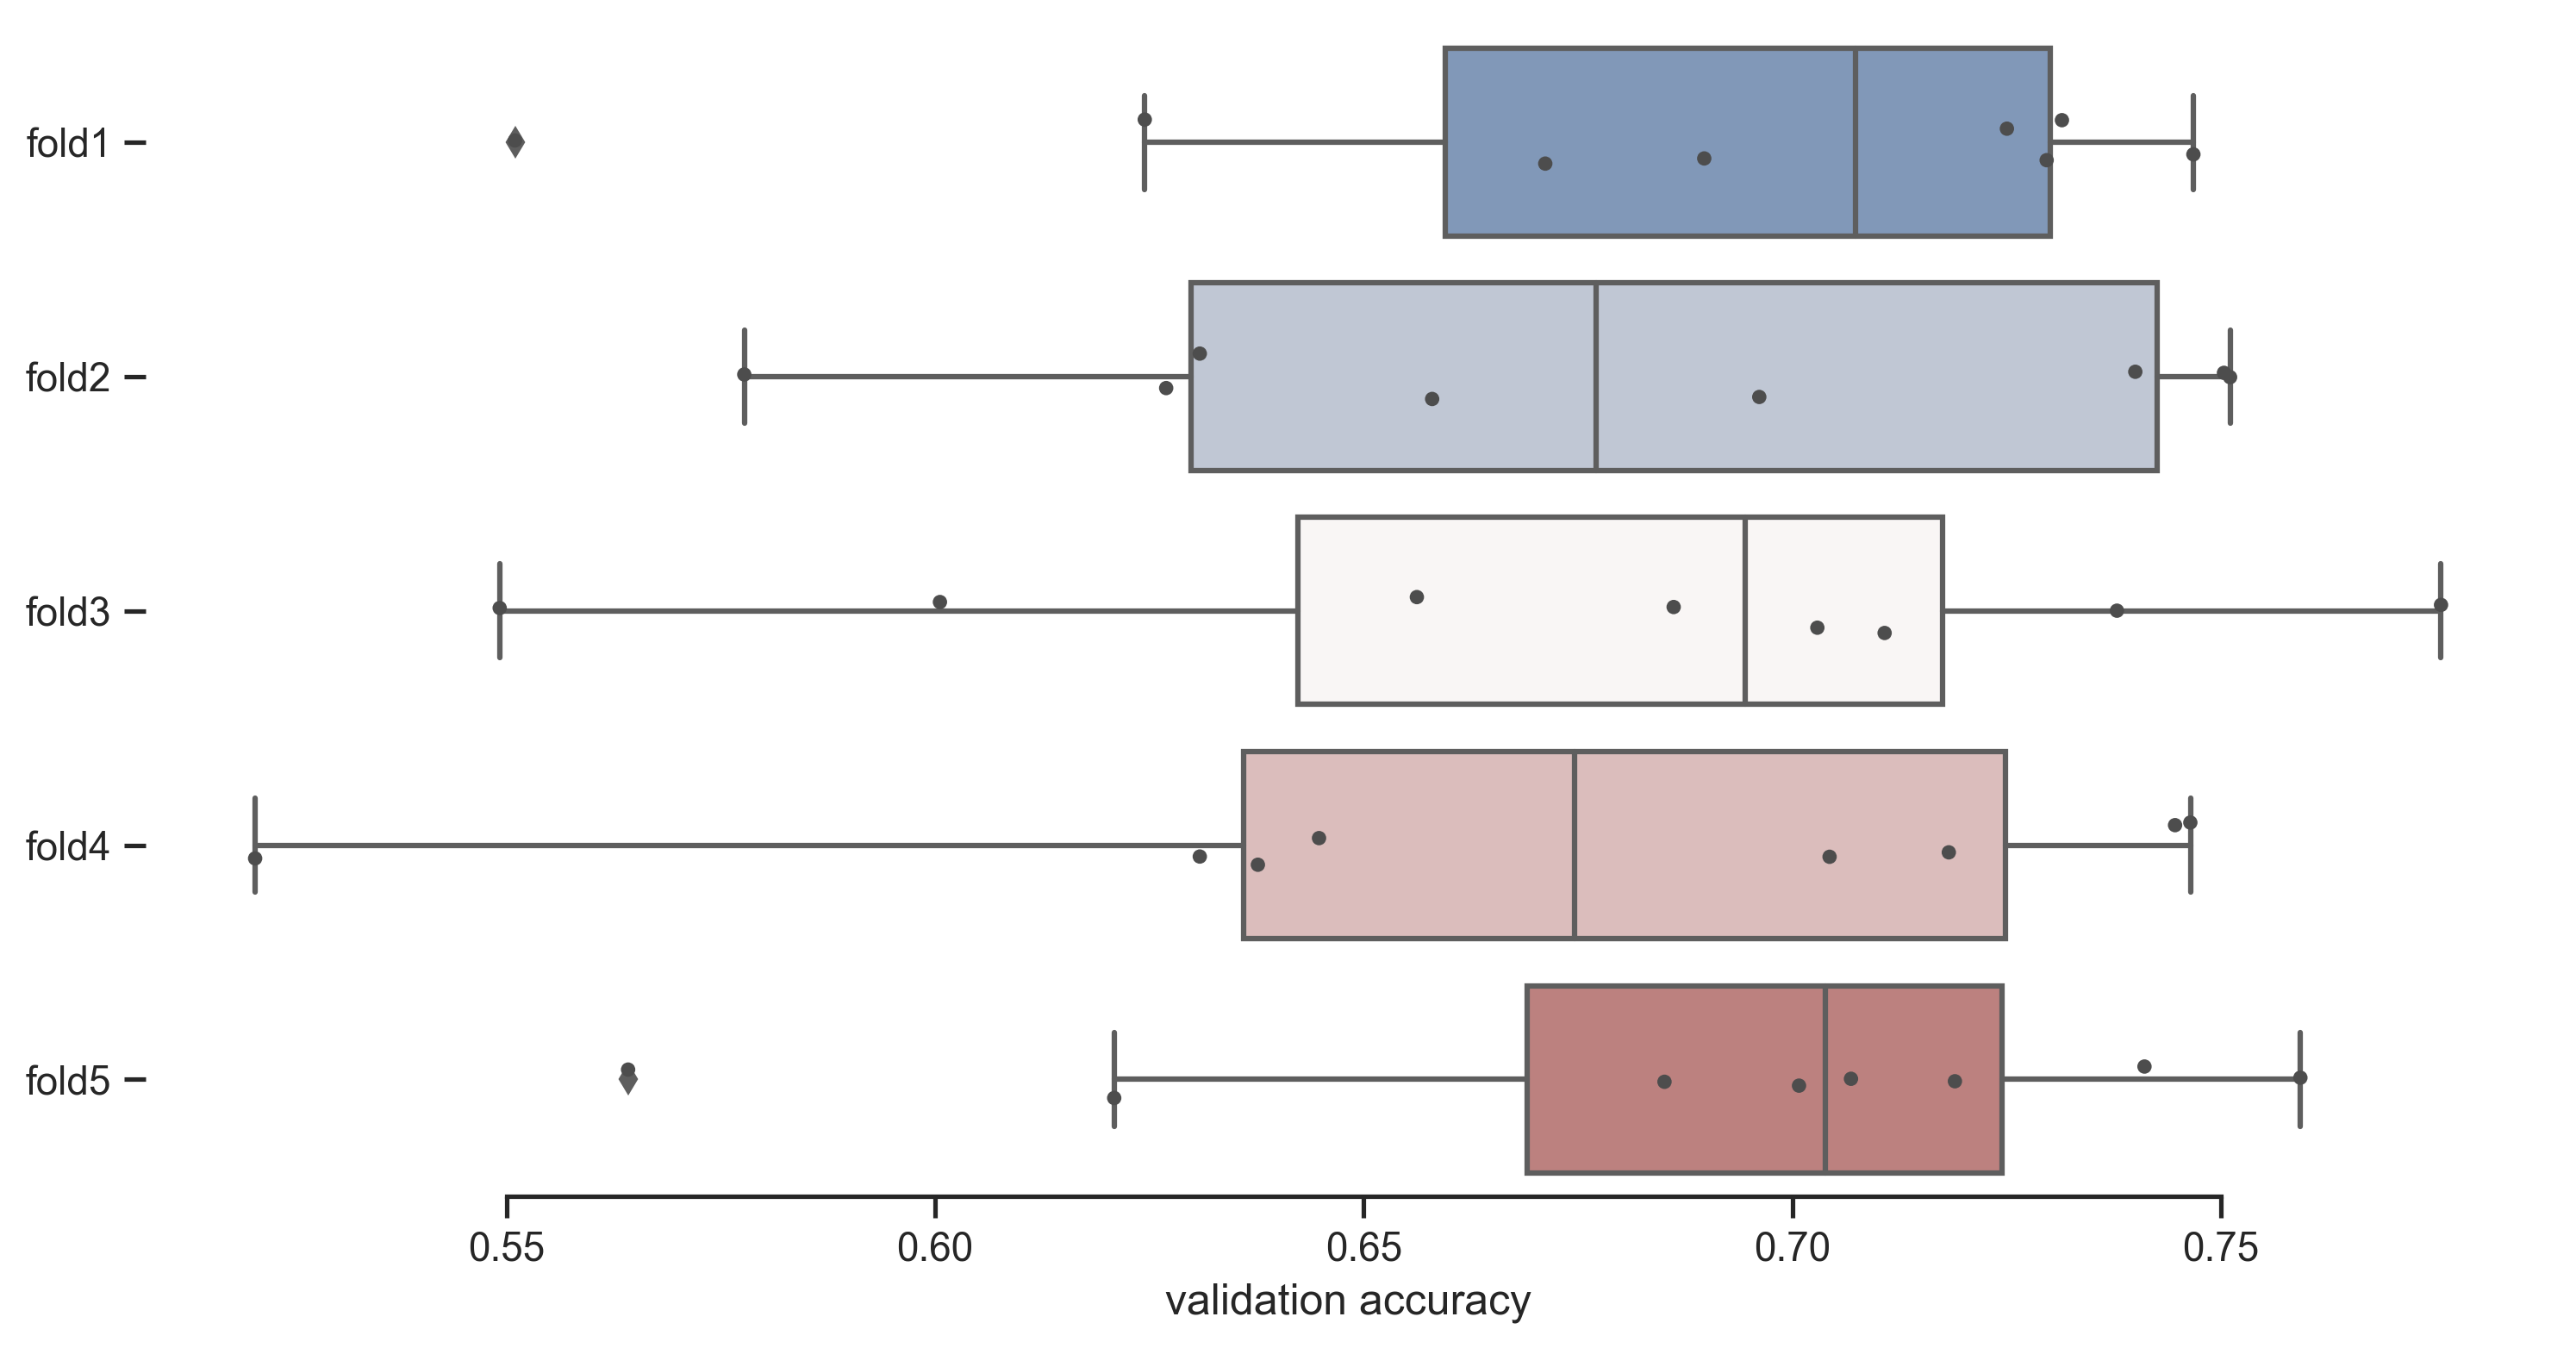

In [31]:
val_acc = pd.DataFrame()

for i in range(len(results['tanh'][0])):
    val_acc[f'fold{i + 1}'] = (np.array(results['tanh'][0][i]['train']['val_accuracy']))

sns.set_theme(style="ticks")

plt.figure(figsize=[12, 6], dpi=300)
# plt.xscale("log")

sns.boxplot(data=val_acc, orient="h", palette="vlag")
sns.stripplot(data=val_acc, orient="h", size=4, color=".3", linewidth=0)

# Tweak the visual presentation
plt.xlabel('validation accuracy')
sns.despine(trim=True, left=True)

plt.savefig('../../images/activation/tanh-act-val-acc.jpg')
plt.show()

-

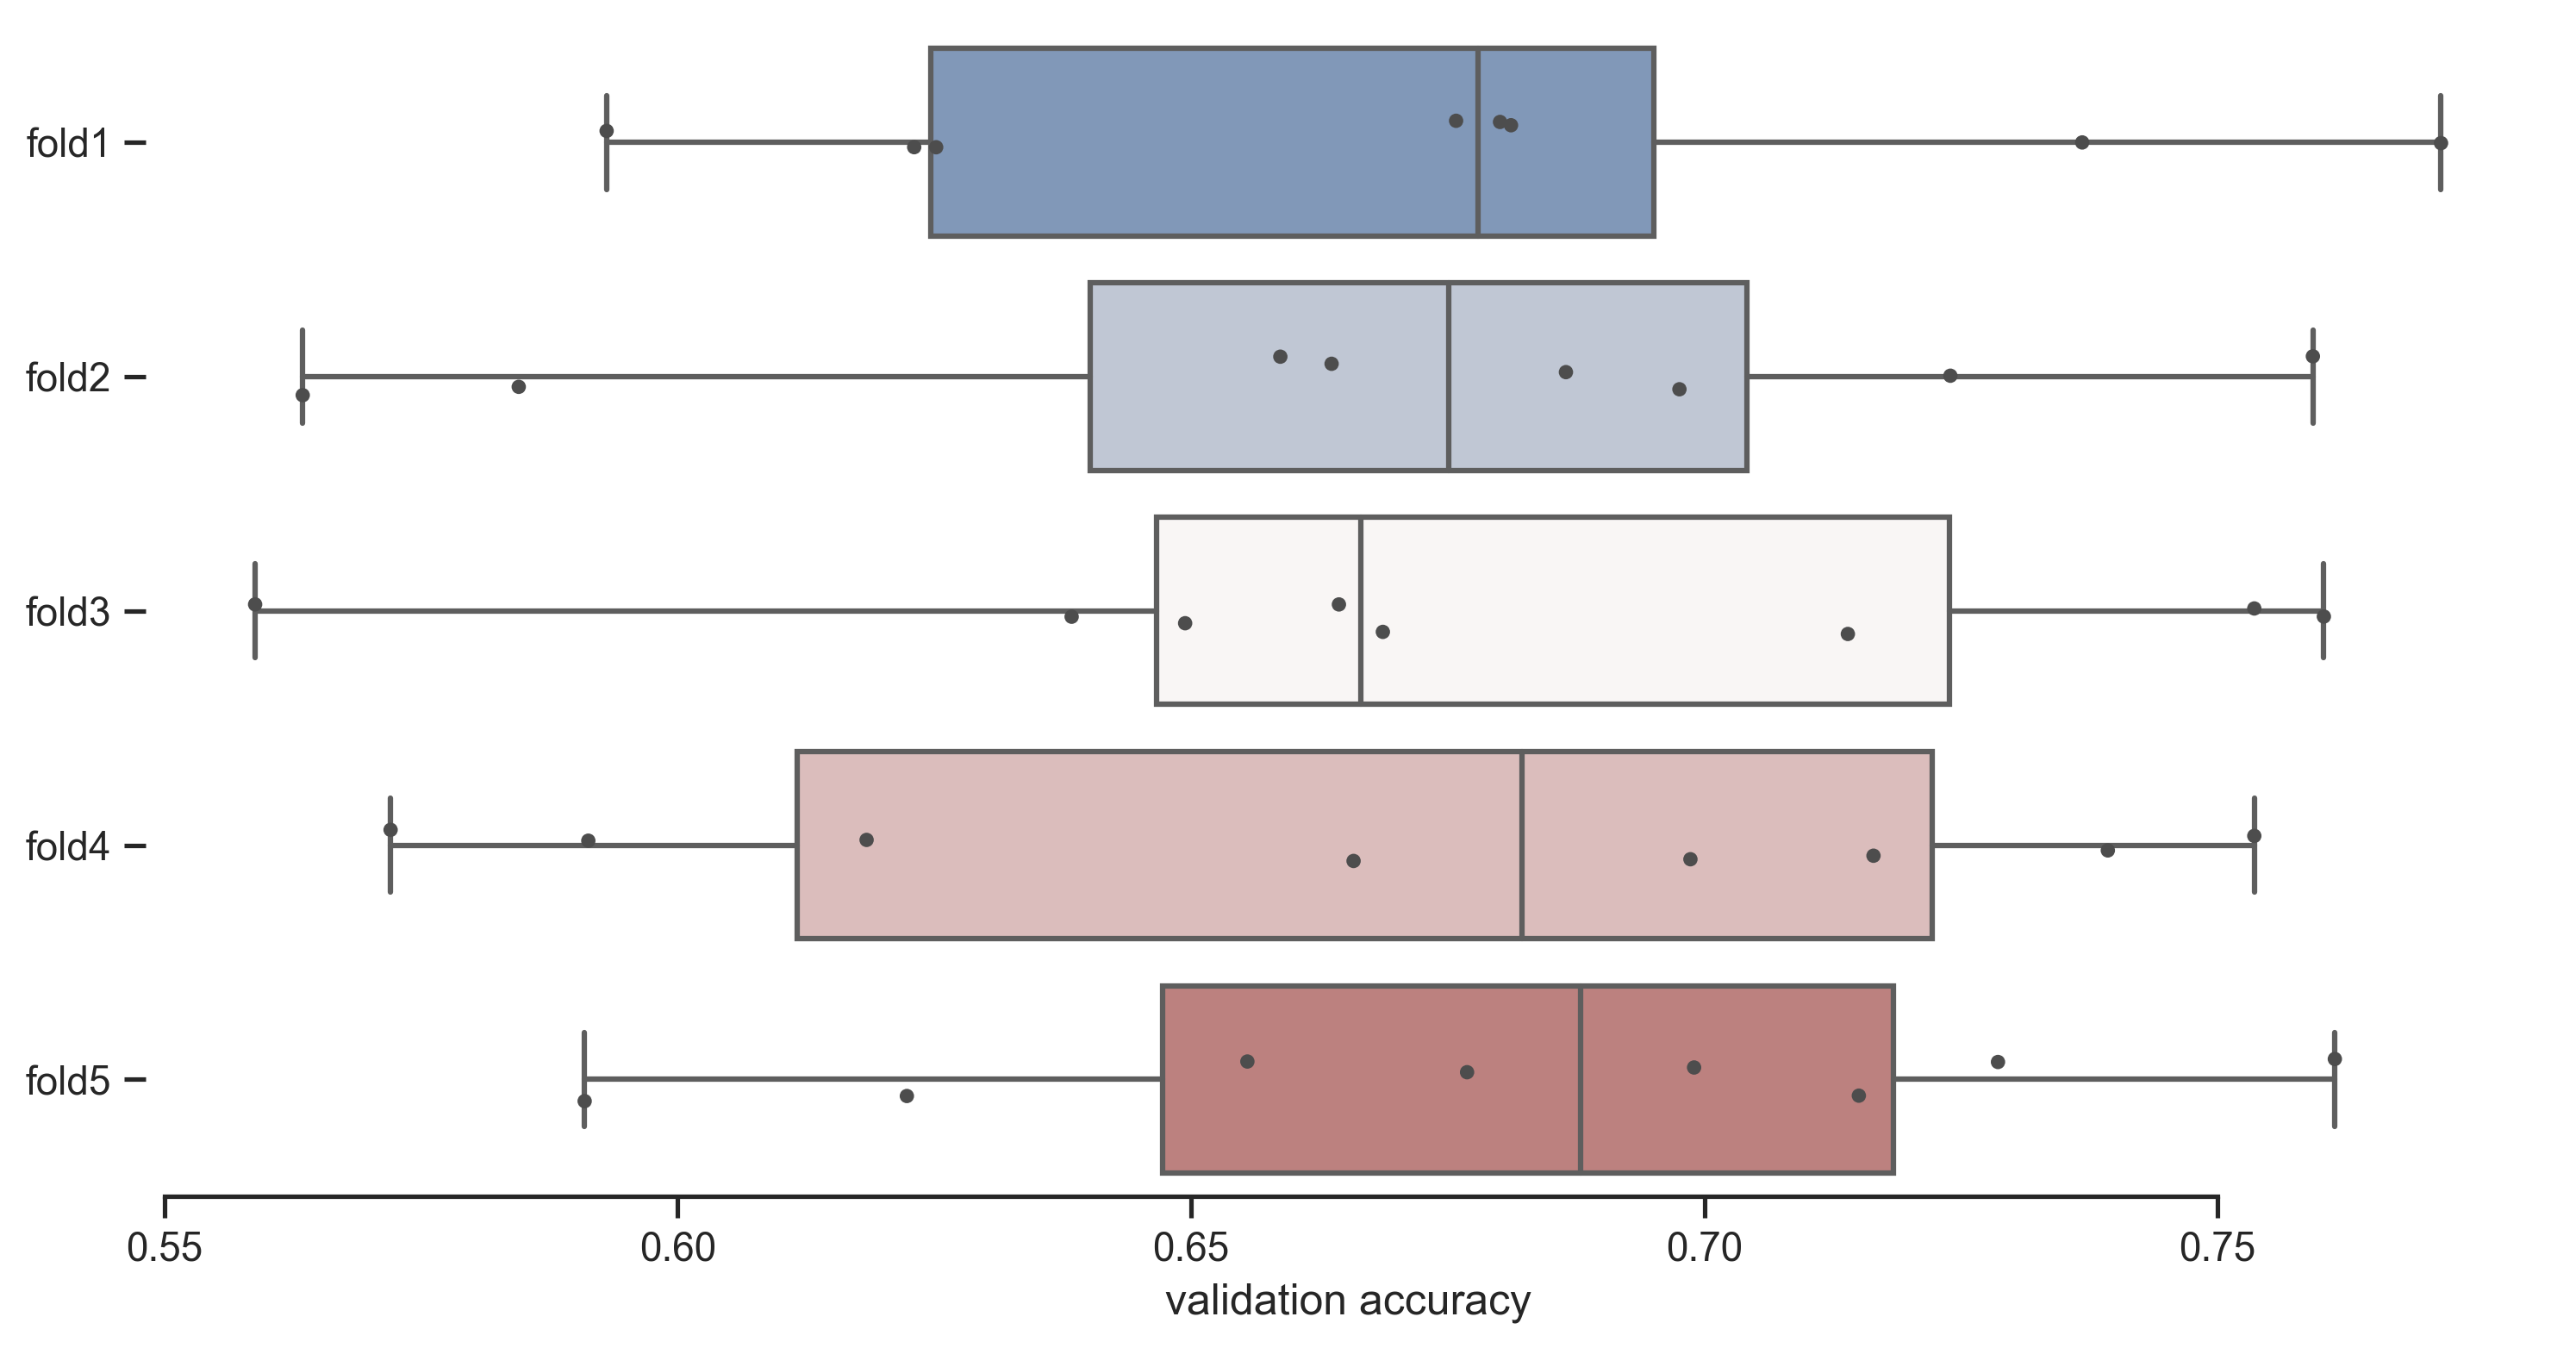

In [33]:
val_acc = pd.DataFrame()

for i in range(len(results['soft_sign'][0])):
    val_acc[f'fold{i + 1}'] = (np.array(results['soft_sign'][0][i]['train']['val_accuracy']))

sns.set_theme(style="ticks")

plt.figure(figsize=[12, 6], dpi=300)
# plt.xscale("log")

sns.boxplot(data=val_acc, orient="h", palette="vlag")
sns.stripplot(data=val_acc, orient="h", size=4, color=".3", linewidth=0)

# Tweak the visual presentation
plt.xlabel('validation accuracy')
sns.despine(trim=True, left=True)

plt.savefig('../../images/activation/soft_sign-act-val-acc.jpg')
plt.show()

- relu

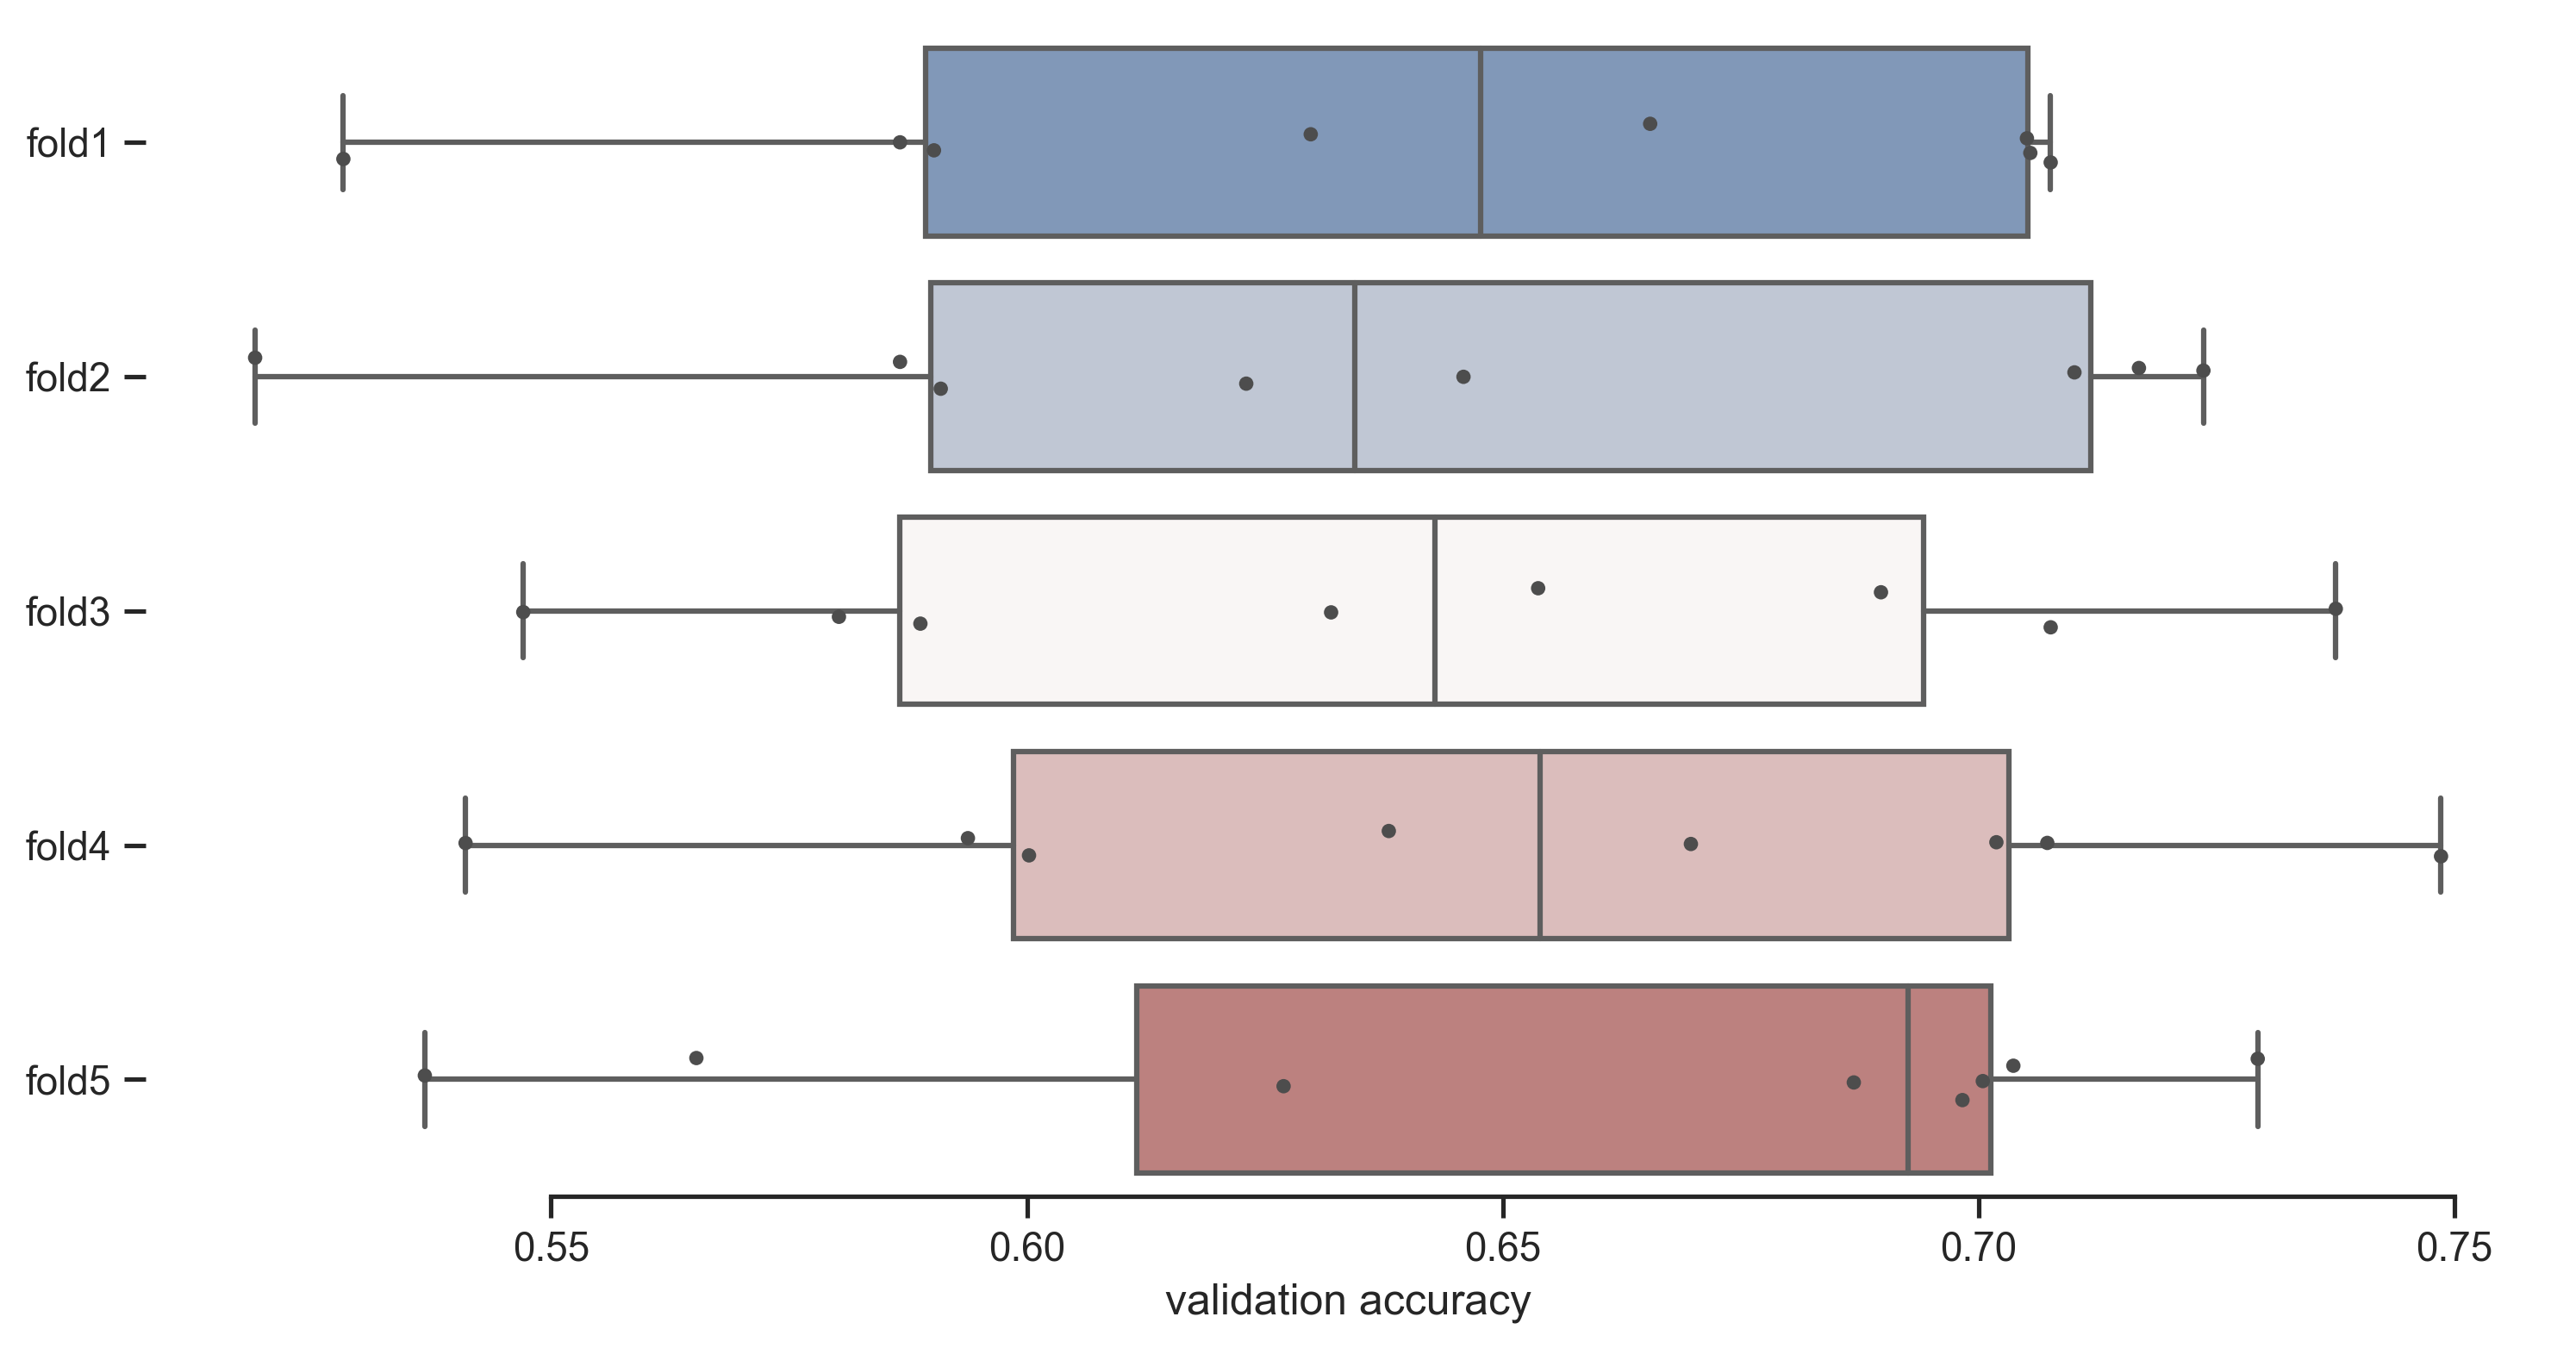

In [34]:
val_acc = pd.DataFrame()

for i in range(len(results['relu'][0])):
    val_acc[f'fold{i + 1}'] = (np.array(results['relu'][0][i]['train']['val_accuracy']))

sns.set_theme(style="ticks")

plt.figure(figsize=[12, 6], dpi=300)
# plt.xscale("log")

sns.boxplot(data=val_acc, orient="h", palette="vlag")
sns.stripplot(data=val_acc, orient="h", size=4, color=".3", linewidth=0)

# Tweak the visual presentation
plt.xlabel('validation accuracy')
sns.despine(trim=True, left=True)

plt.savefig('../../images/activation/relu-act-val-acc.jpg')
plt.show()

- leaky_relu

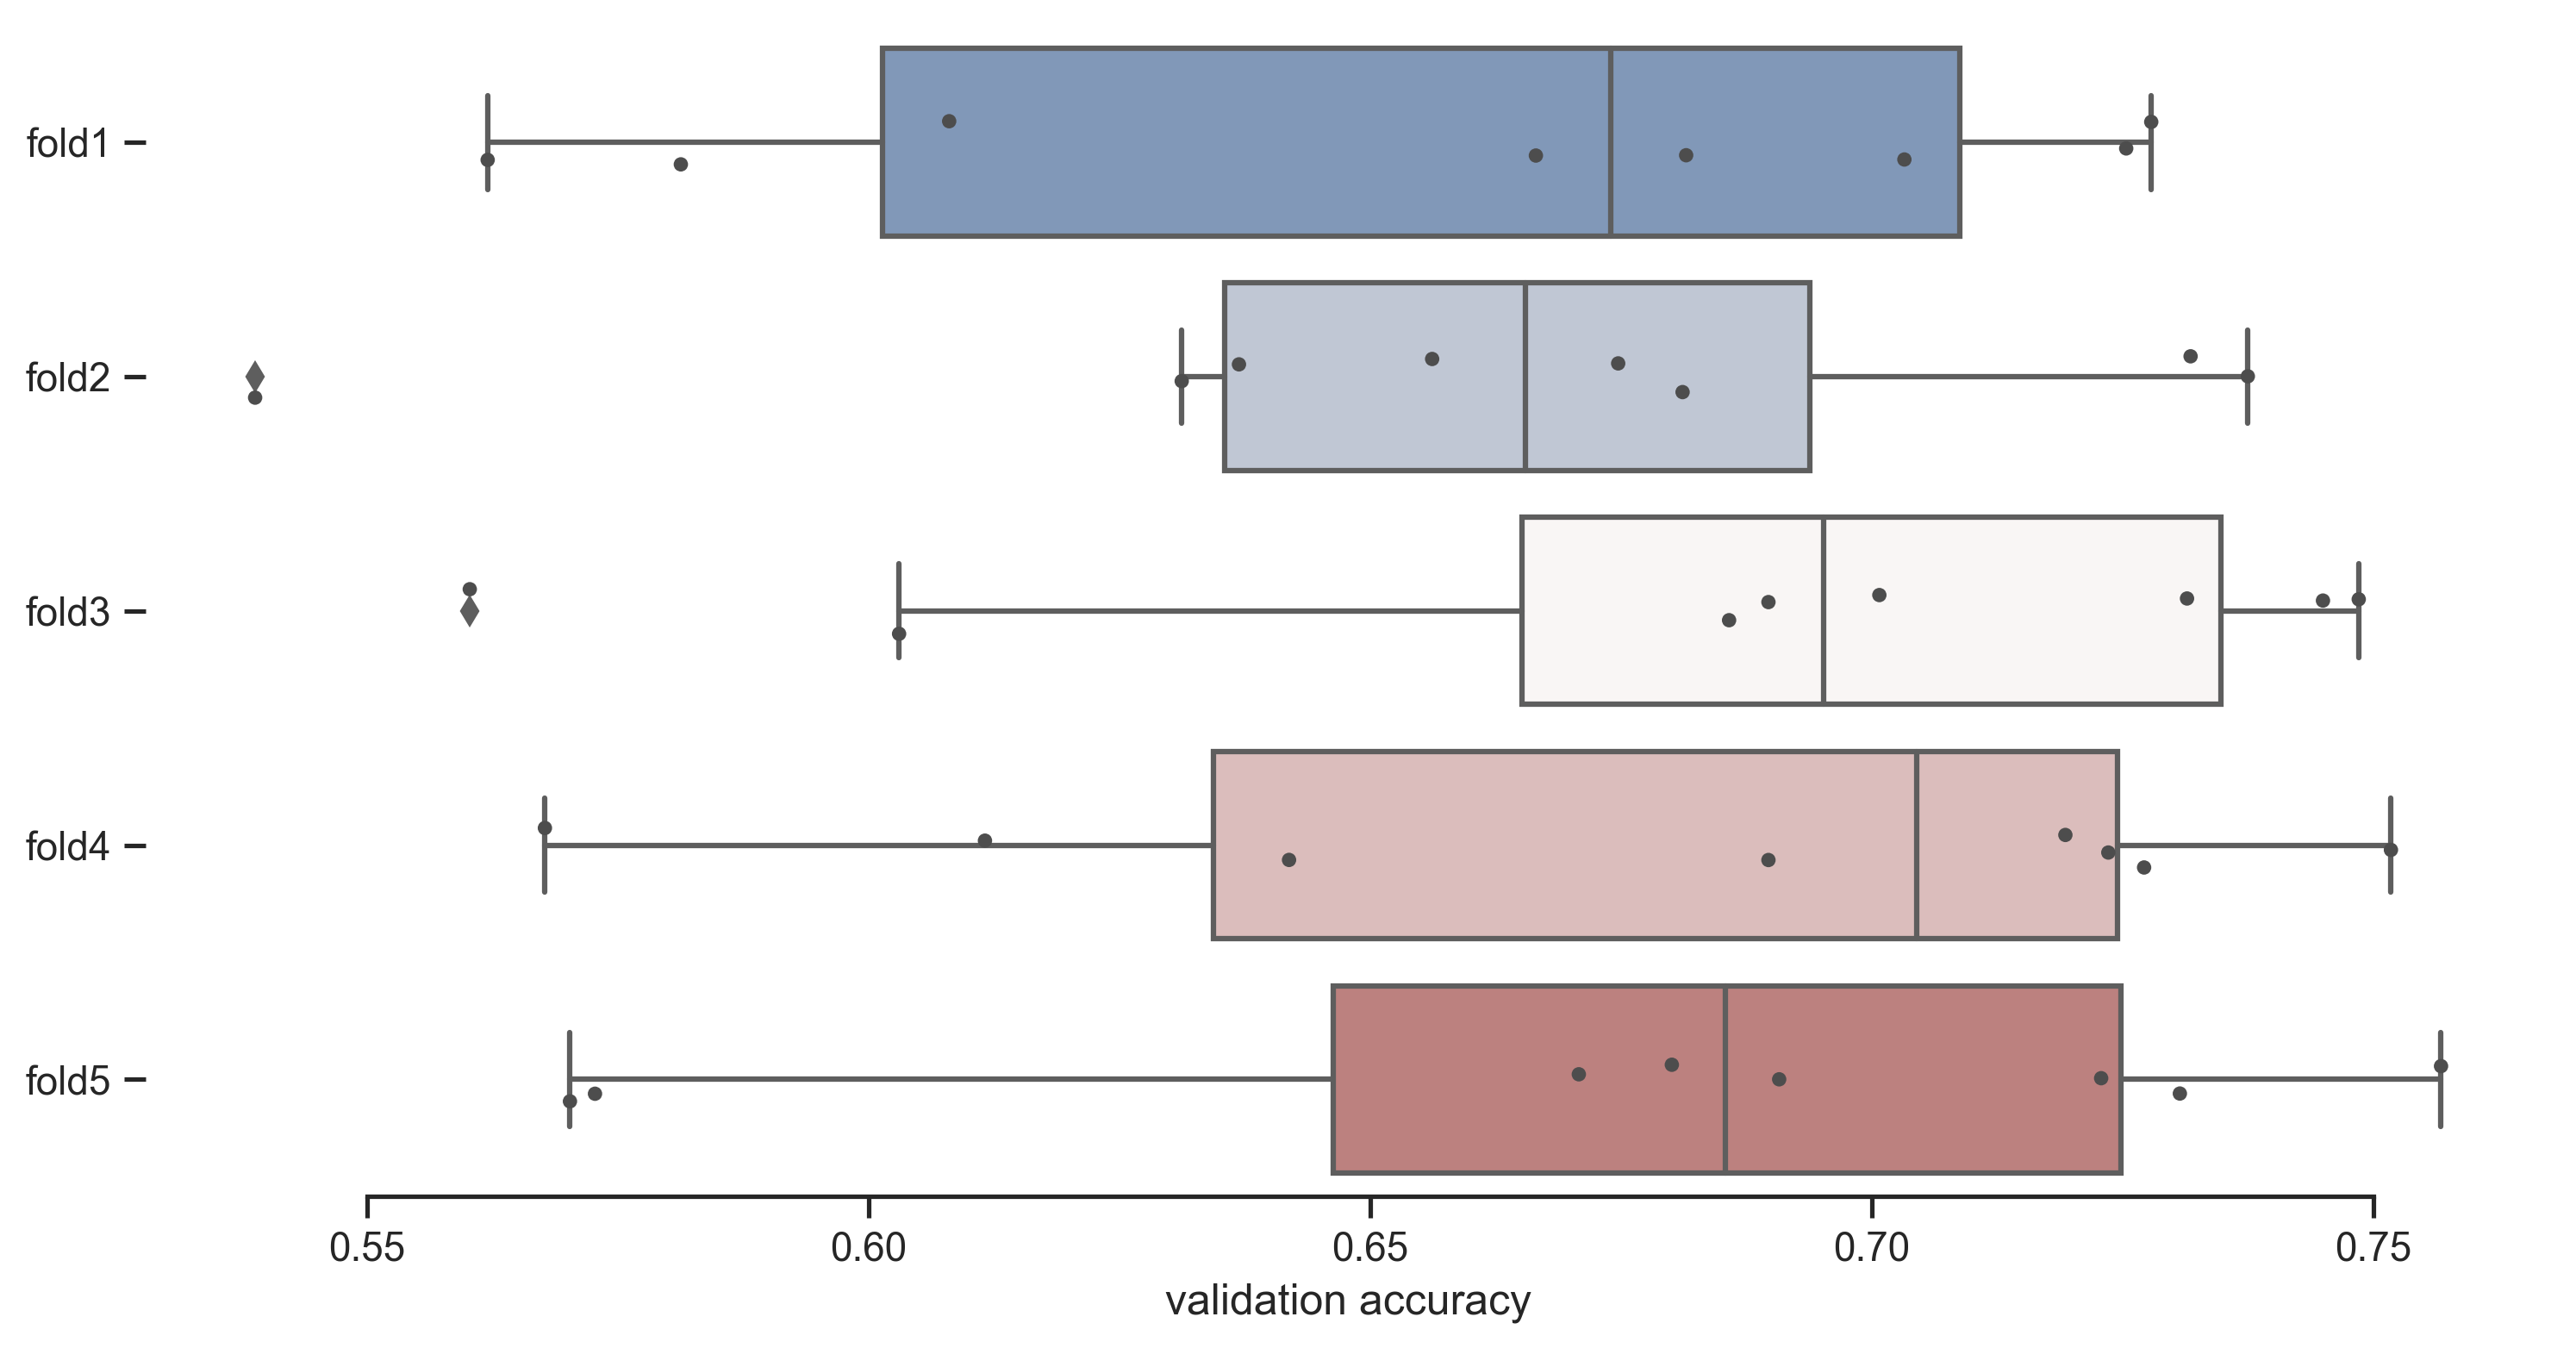

In [35]:
val_acc = pd.DataFrame()

for i in range(len(results['leaky_relu'][0])):
    val_acc[f'fold{i + 1}'] = (np.array(results['leaky_relu'][0][i]['train']['val_accuracy']))

sns.set_theme(style="ticks")

plt.figure(figsize=[12, 6], dpi=300)
# plt.xscale("log")

sns.boxplot(data=val_acc, orient="h", palette="vlag")
sns.stripplot(data=val_acc, orient="h", size=4, color=".3", linewidth=0)

# Tweak the visual presentation
plt.xlabel('validation accuracy')
sns.despine(trim=True, left=True)

plt.savefig('../../images/activation/leaky_relu-act-val-acc.jpg')
plt.show()

- elu

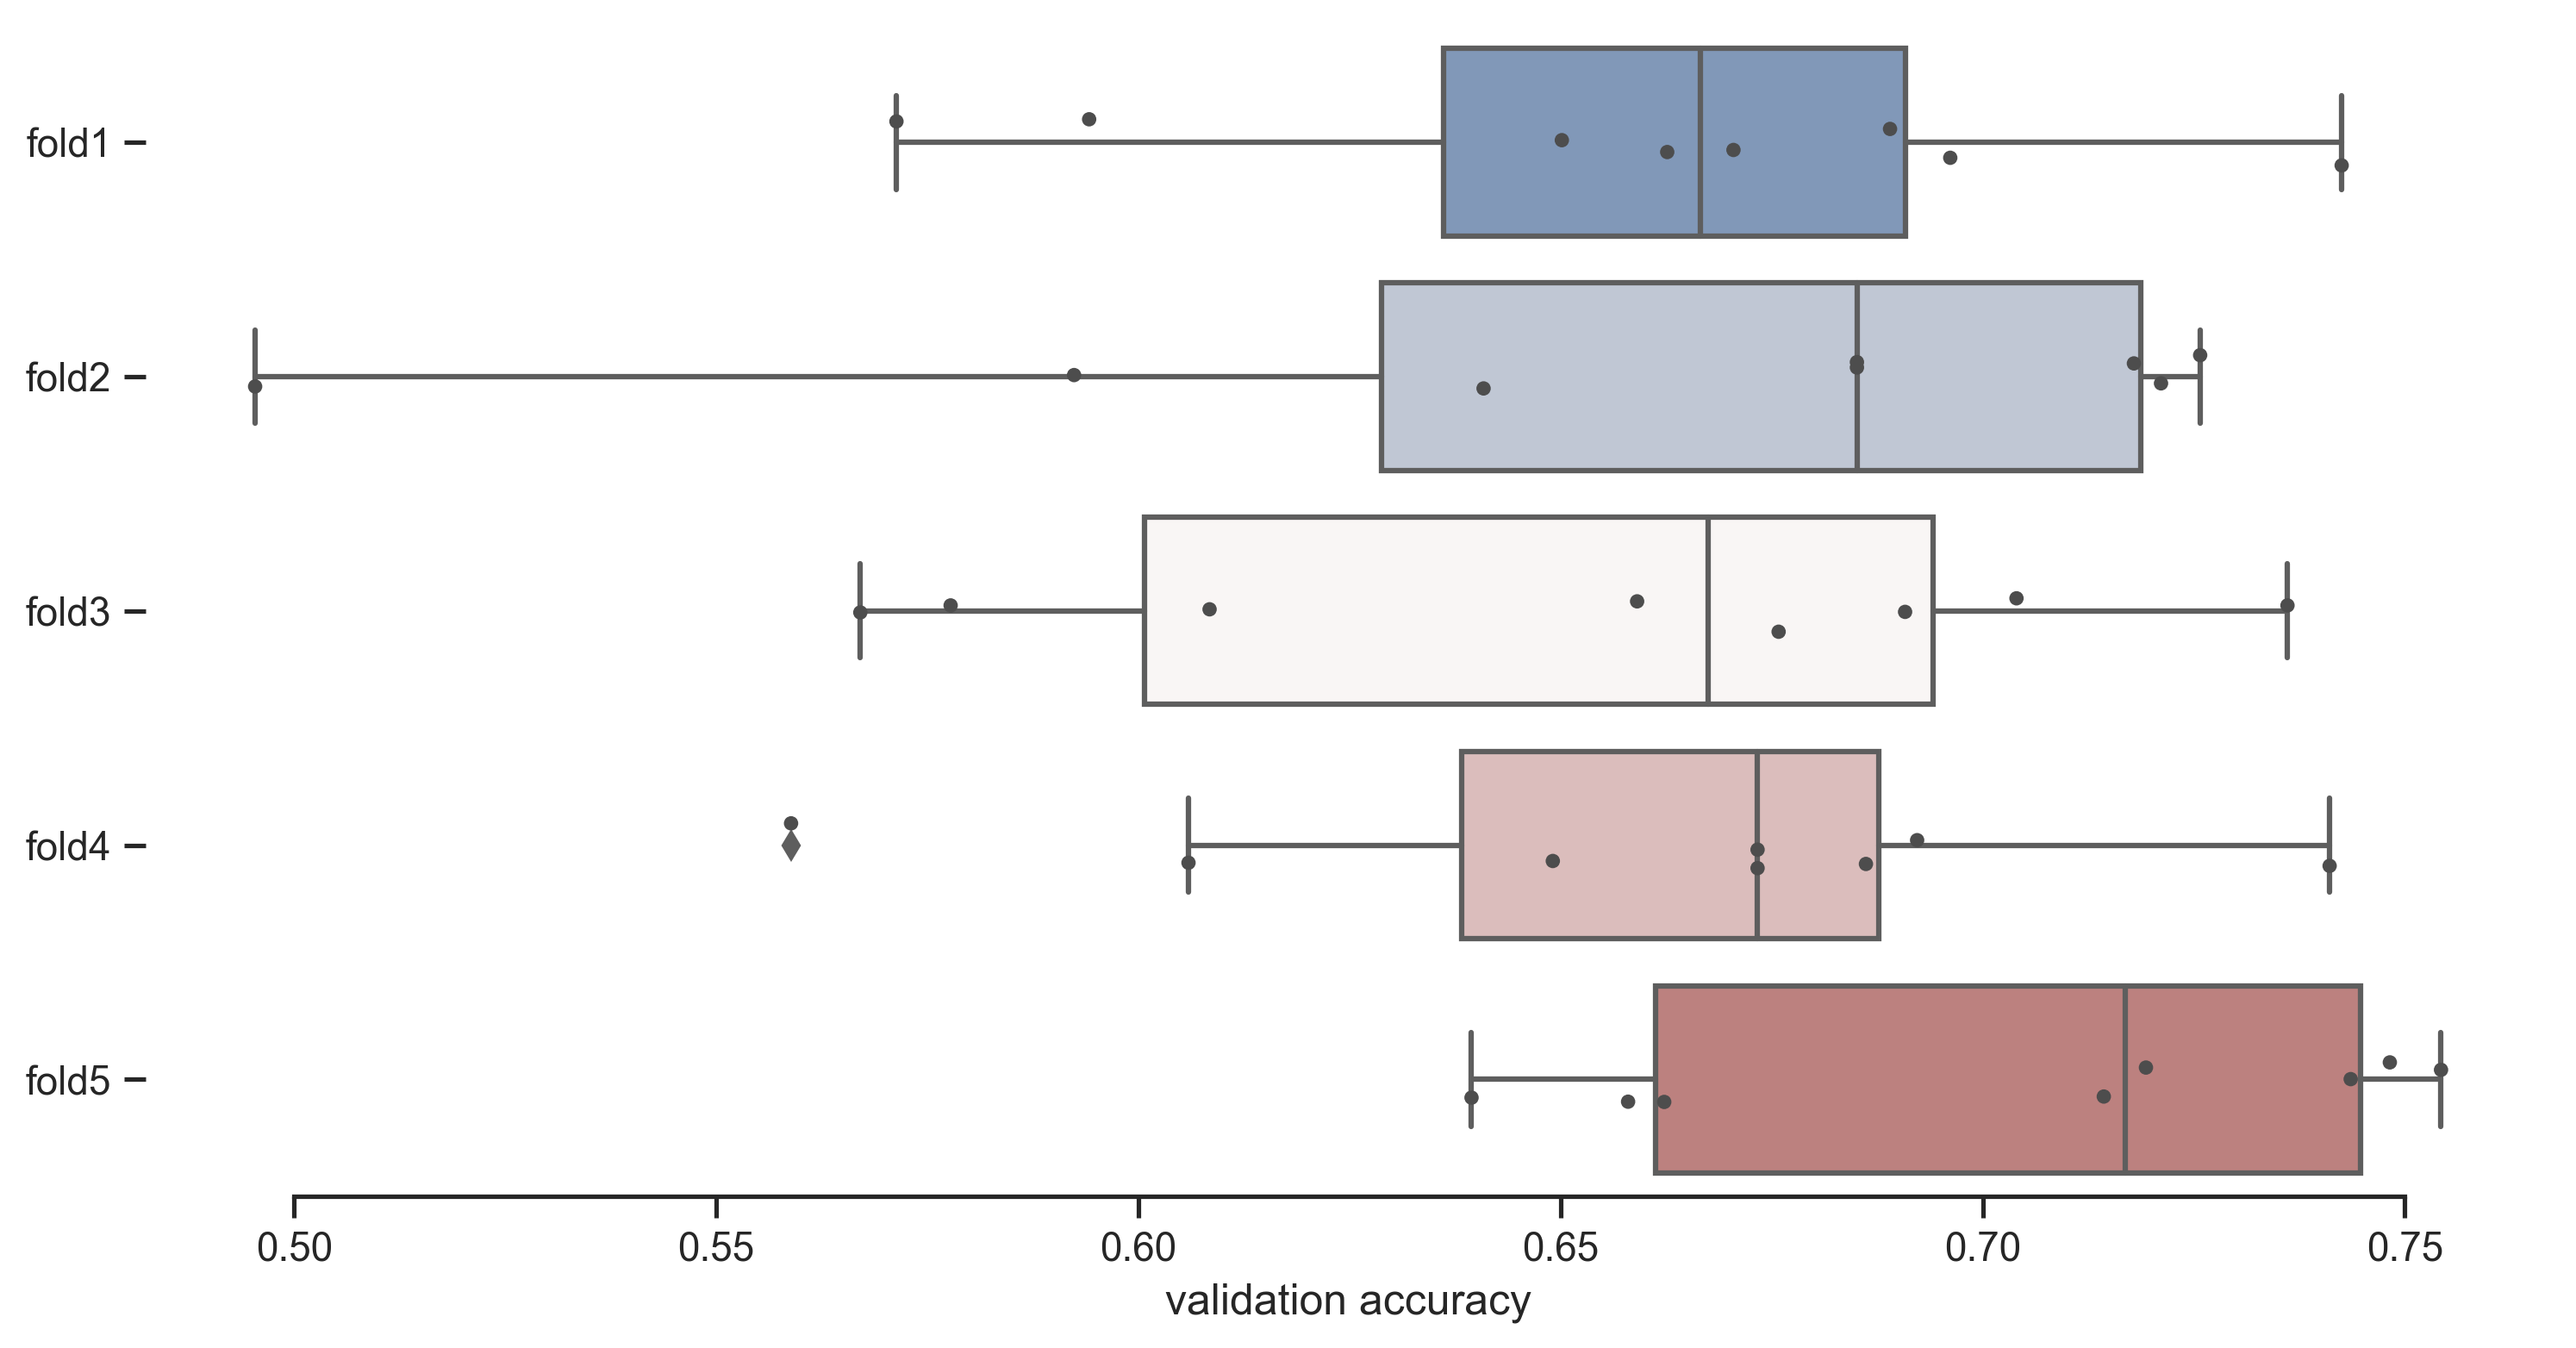

In [36]:
val_acc = pd.DataFrame()

for i in range(len(results['elu'][0])):
    val_acc[f'fold{i + 1}'] = (np.array(results['elu'][0][i]['train']['val_accuracy']))

sns.set_theme(style="ticks")

plt.figure(figsize=[12, 6], dpi=300)
# plt.xscale("log")

sns.boxplot(data=val_acc, orient="h", palette="vlag")
sns.stripplot(data=val_acc, orient="h", size=4, color=".3", linewidth=0)

# Tweak the visual presentation
plt.xlabel('validation accuracy')
sns.despine(trim=True, left=True)

plt.savefig('../../images/activation/elu-act-val-acc.jpg')
plt.show()

- soft_plus

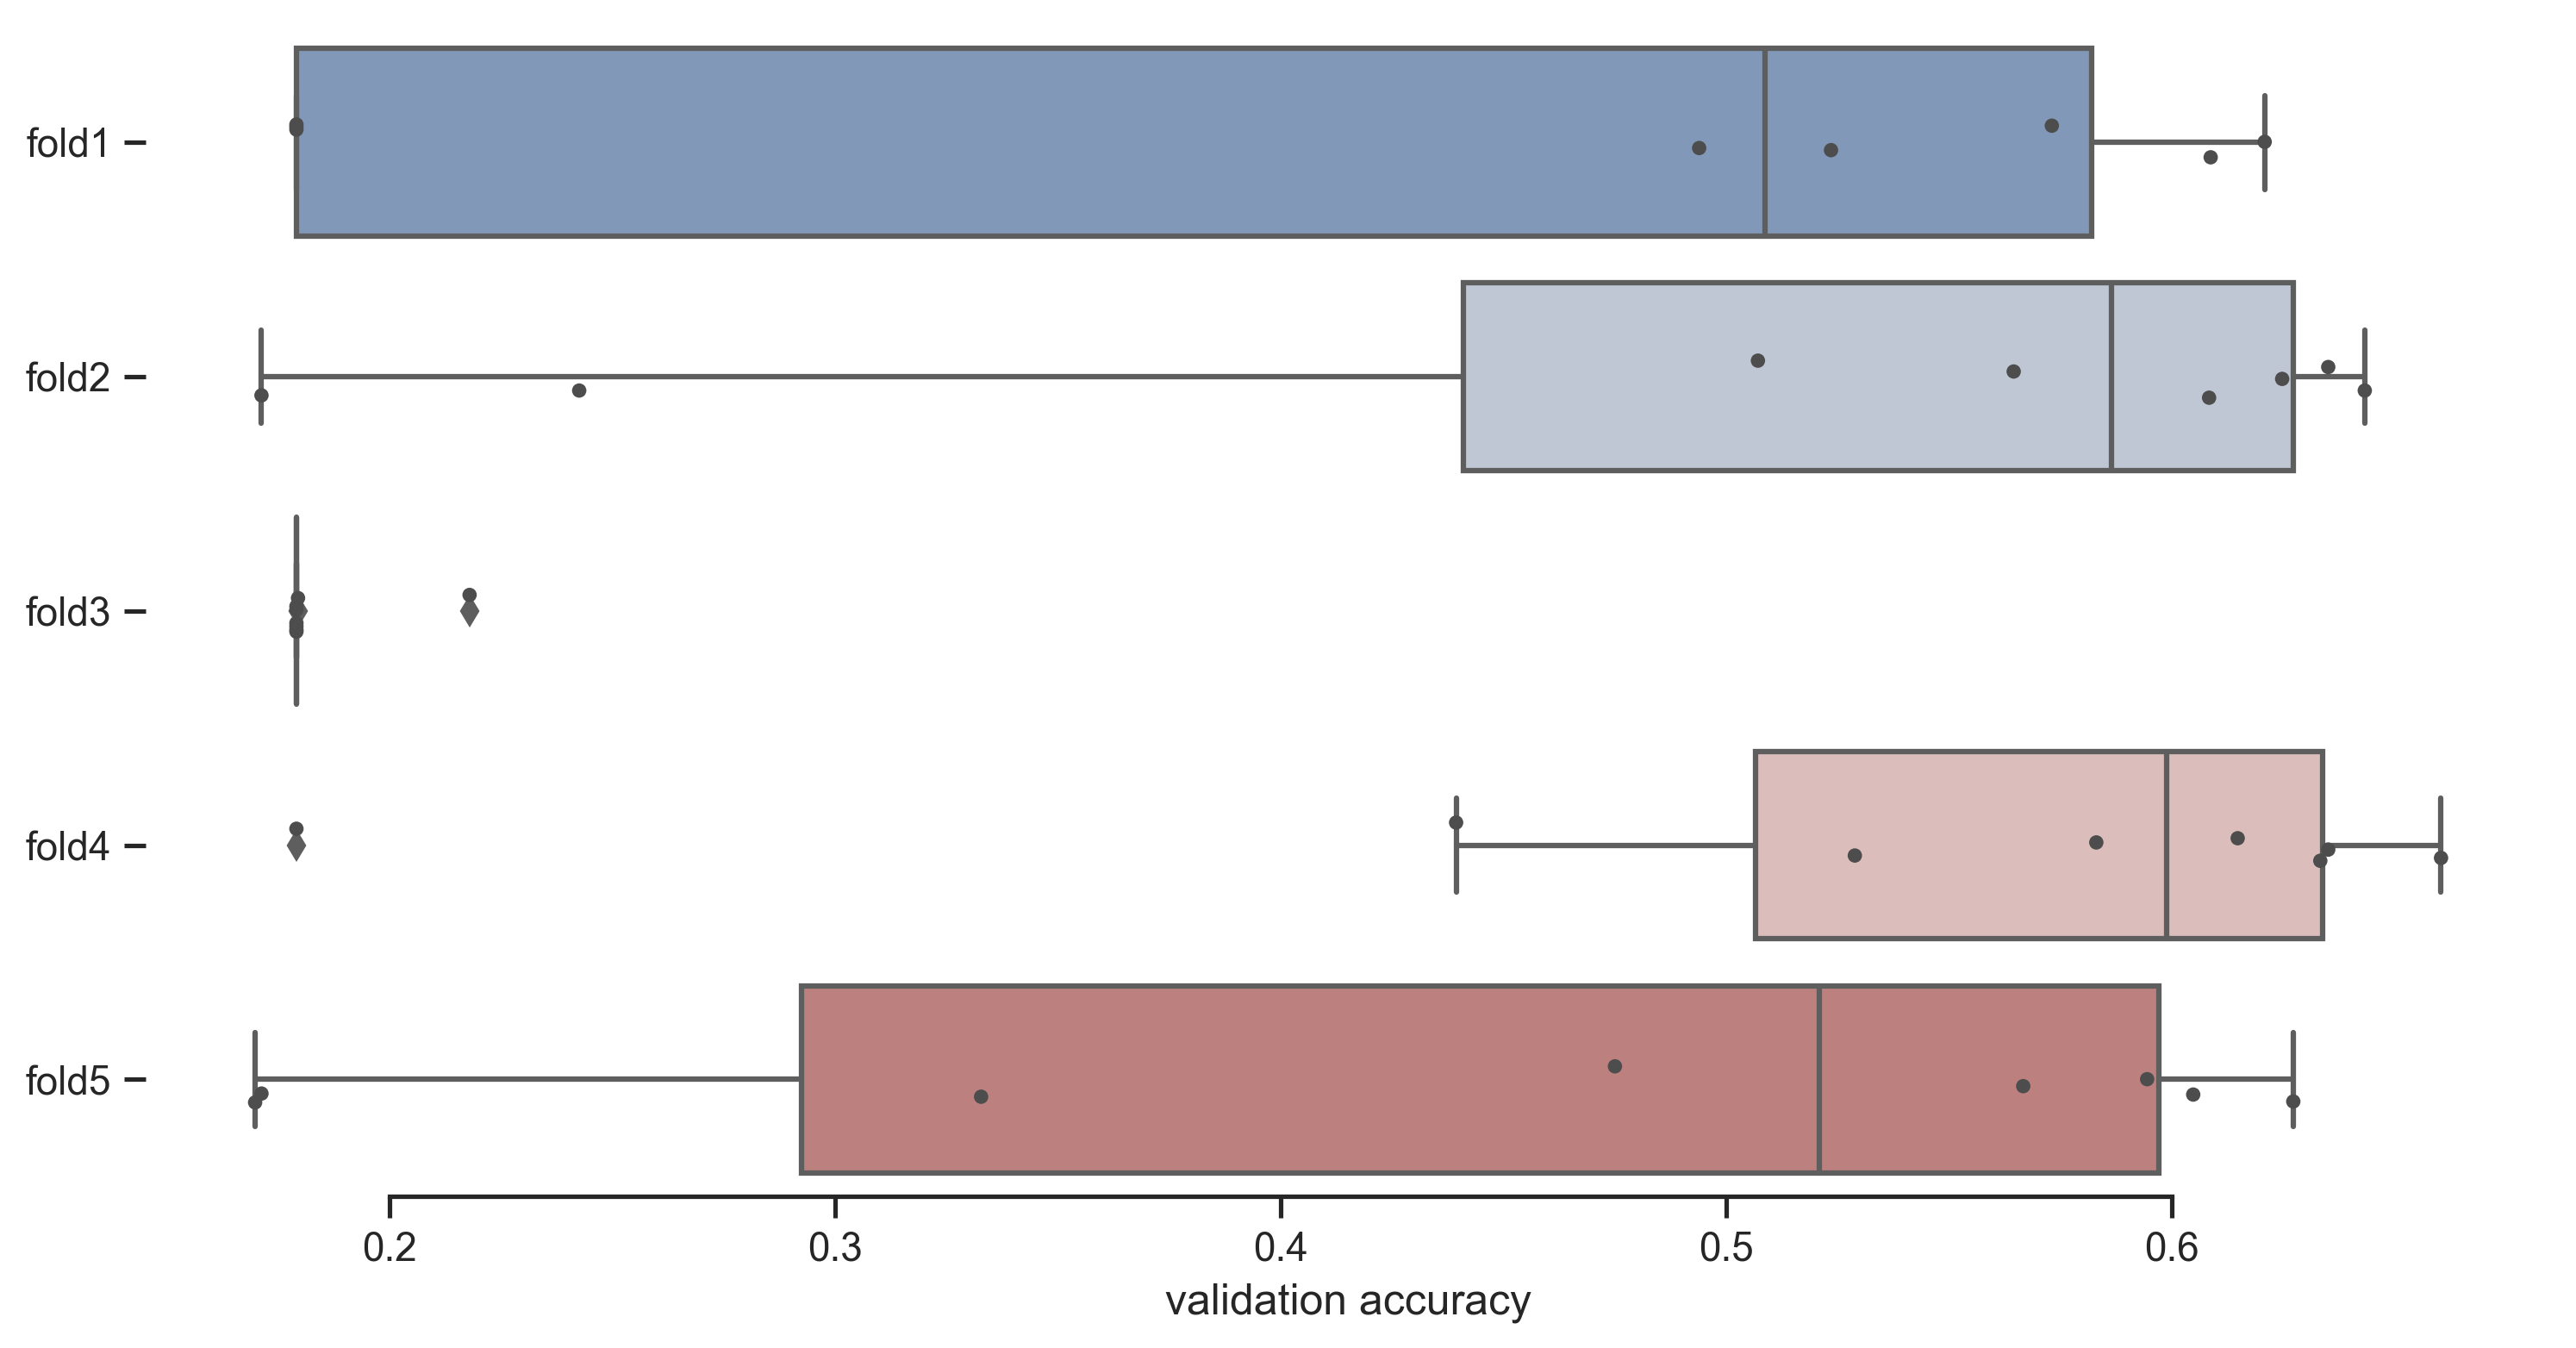

In [37]:
val_acc = pd.DataFrame()

for i in range(len(results['soft_plus'][0])):
    val_acc[f'fold{i + 1}'] = (np.array(results['soft_plus'][0][i]['train']['val_accuracy']))

sns.set_theme(style="ticks")

plt.figure(figsize=[12, 6], dpi=300)
# plt.xscale("log")

sns.boxplot(data=val_acc, orient="h", palette="vlag")
sns.stripplot(data=val_acc, orient="h", size=4, color=".3", linewidth=0)

# Tweak the visual presentation
plt.xlabel('validation accuracy')
sns.despine(trim=True, left=True)

plt.savefig('../../images/activation/soft_plus-act-val-acc.jpg')
plt.show()

- selu

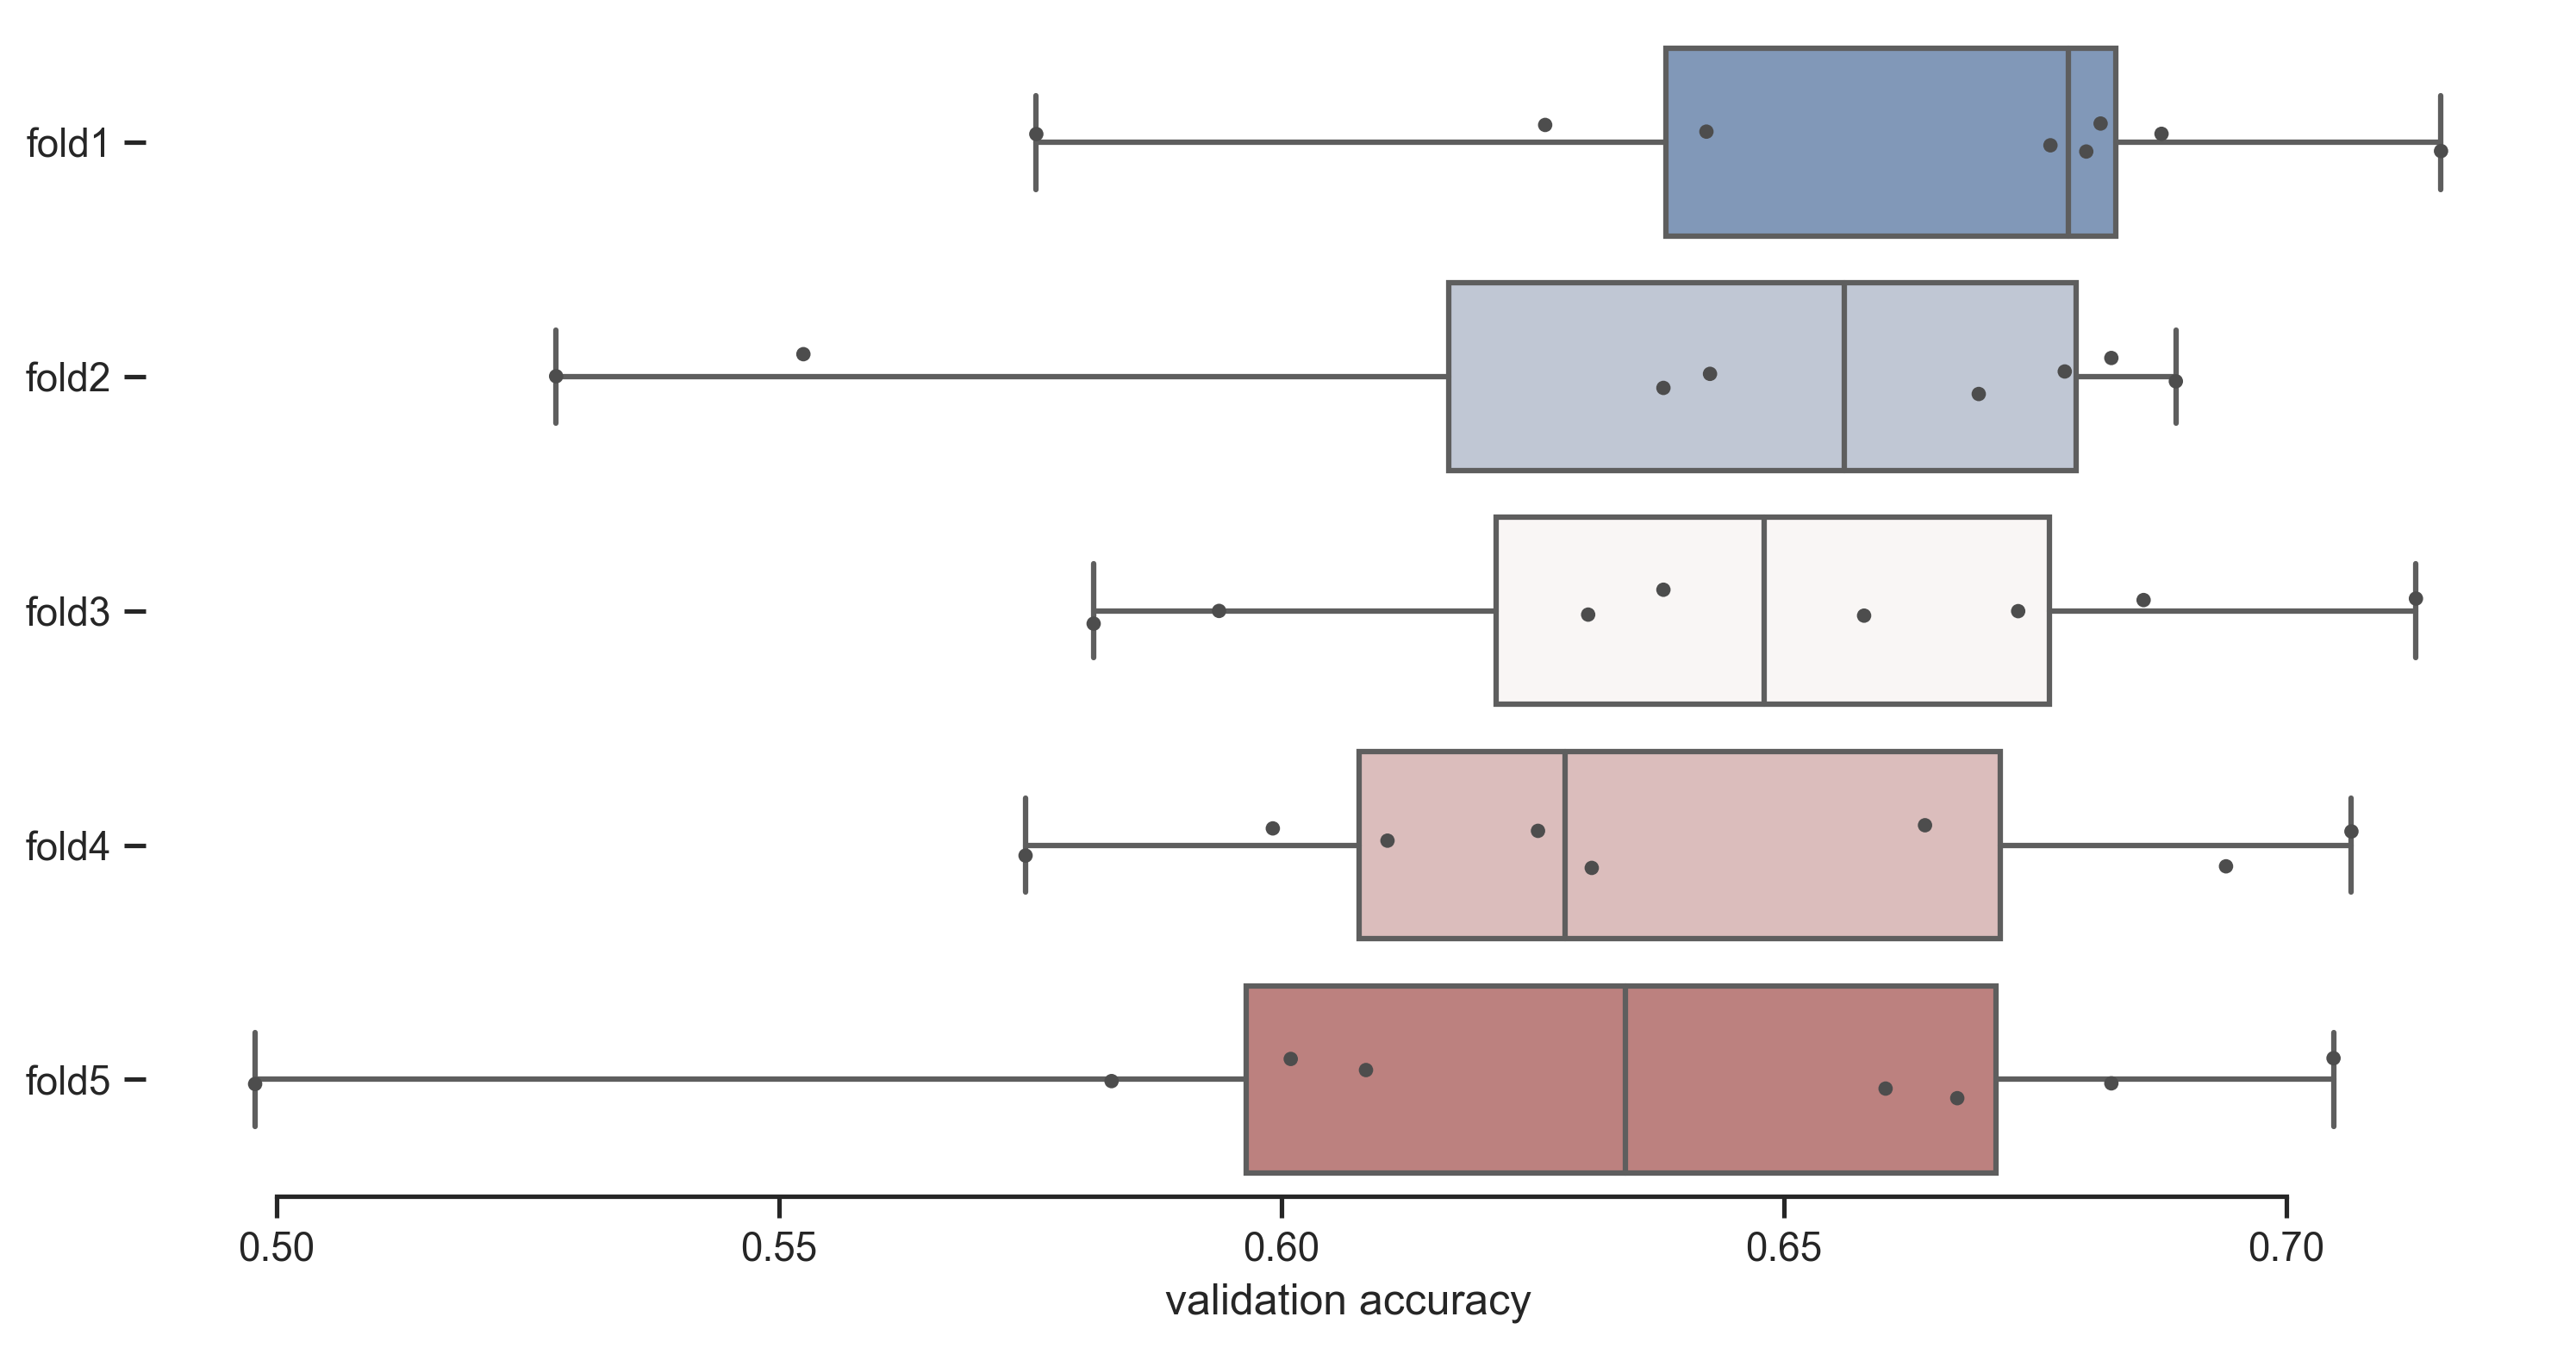

In [38]:
val_acc = pd.DataFrame()

for i in range(len(results['selu'][0])):
    val_acc[f'fold{i + 1}'] = (np.array(results['selu'][0][i]['train']['val_accuracy']))

sns.set_theme(style="ticks")

plt.figure(figsize=[12, 6], dpi=300)
# plt.xscale("log")

sns.boxplot(data=val_acc, orient="h", palette="vlag")
sns.stripplot(data=val_acc, orient="h", size=4, color=".3", linewidth=0)

# Tweak the visual presentation
plt.xlabel('validation accuracy')
sns.despine(trim=True, left=True)

plt.savefig('../../images/activation/selu-act-val-acc.jpg')
plt.show()

- swish

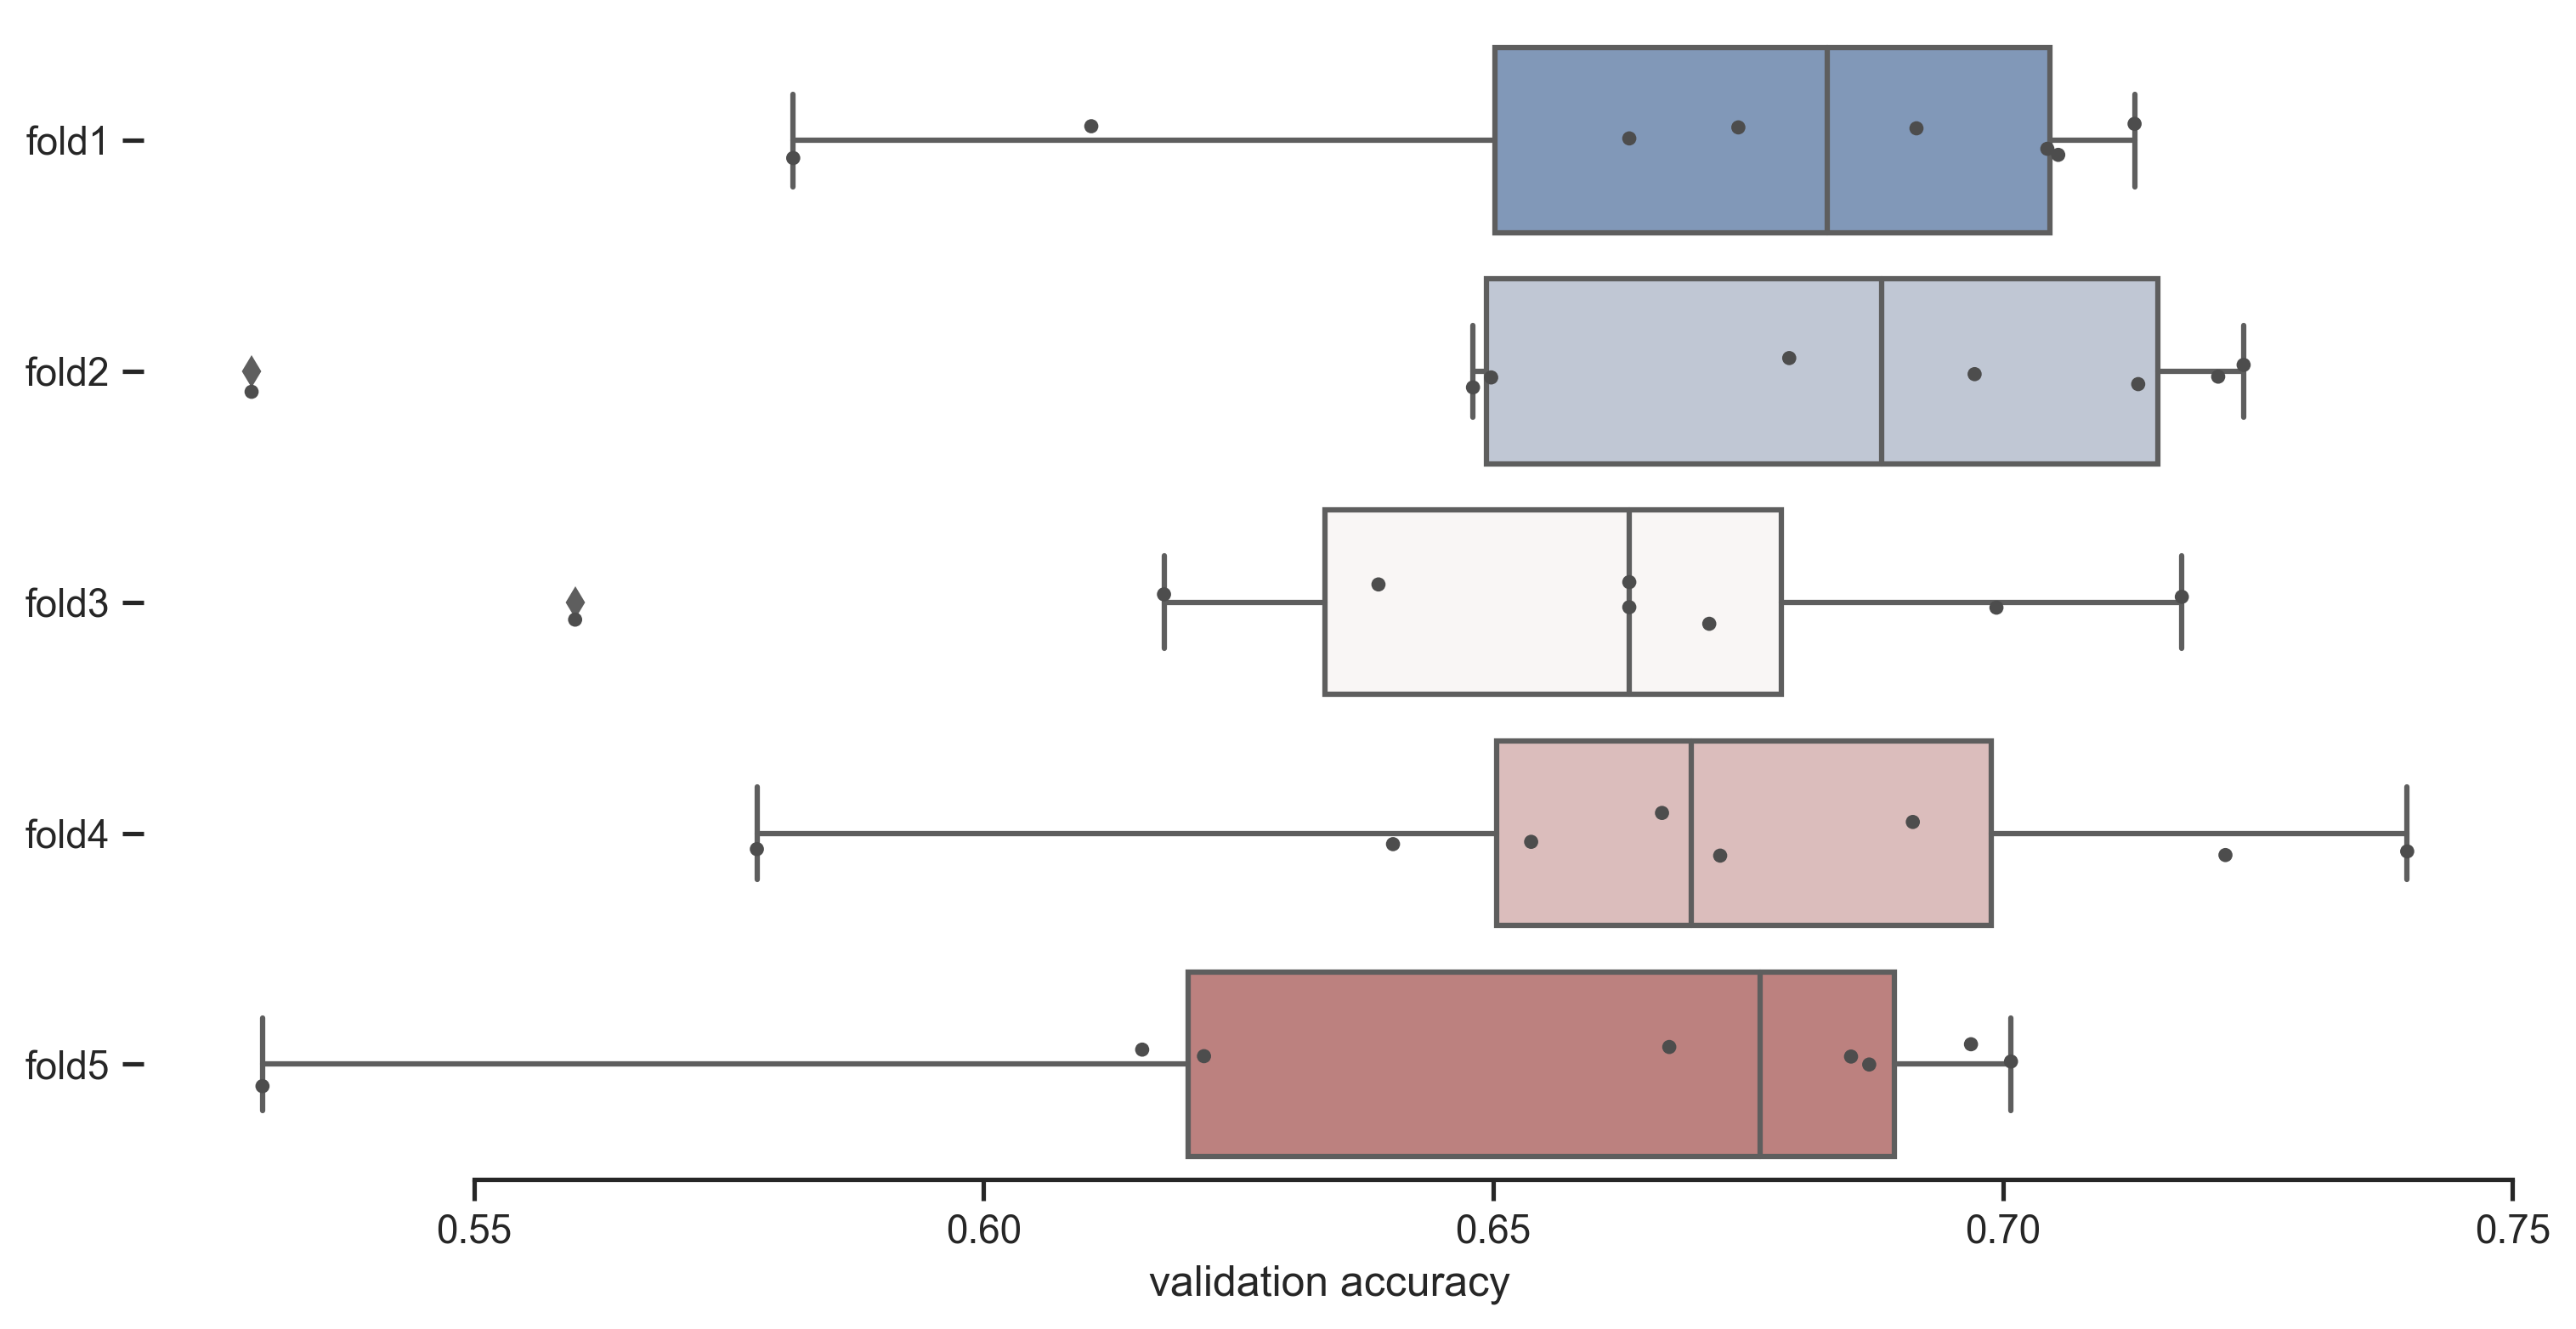

In [39]:
val_acc = pd.DataFrame()

for i in range(len(results['swish'][0])):
    val_acc[f'fold{i + 1}'] = (np.array(results['swish'][0][i]['train']['val_accuracy']))

sns.set_theme(style="ticks")

plt.figure(figsize=[12, 6], dpi=300)
# plt.xscale("log")

sns.boxplot(data=val_acc, orient="h", palette="vlag")
sns.stripplot(data=val_acc, orient="h", size=4, color=".3", linewidth=0)

# Tweak the visual presentation
plt.xlabel('validation accuracy')
sns.despine(trim=True, left=True)

plt.savefig('../../images/activation/swish-act-val-acc.jpg')
plt.show()

In [64]:
val_mean_acc = {}

for act in results.keys():
    mean_acc = []

    for i in range(len(results[act][0])):
        mean_acc.append(results[act][0][i]['train']['val_accuracy'][np.argmin(results[act][0][i]['train']['val_loss'])])

    val_mean_acc[act] = mean_acc

pd.DataFrame(val_mean_acc)

,sigmoid,tanh,soft_sign,relu,leaky_relu,elu,soft_plus,selu,swish
0,0.179030,0.746790,0.771755,0.707561,0.727889,0.742511,0.620899,0.715407,0.712910
1,0.179030,0.740014,0.759272,0.716833,0.737518,0.725749,0.643367,0.689016,0.723609
2,0.179030,0.775678,0.760342,0.737518,0.748573,0.736091,0.217903,0.685806,0.717546
3,0.179030,0.744650,0.753566,0.748573,0.751783,0.741084,0.660485,0.706491,0.739658
4,0.524964,0.759272,0.761412,0.729315,0.756776,0.754280,0.627318,0.704708,0.700785


In [65]:
test_mean_acc = {}

for act in results.keys():
    mean_acc = []

    for i in range(len(results[act][0])):
        mean_acc.append(results[act][0][i]['evaluation'][1])

    test_mean_acc[act] = mean_acc

pd.DataFrame(test_mean_acc)

,sigmoid,tanh,soft_sign,relu,leaky_relu,elu,soft_plus,selu,swish
0,0.175000,0.707000,0.740333,0.703333,0.721333,0.738667,0.626000,0.685333,0.706667
1,0.175000,0.744333,0.758000,0.725333,0.739000,0.722667,0.633333,0.679667,0.719667
2,0.175000,0.761000,0.755333,0.739333,0.720667,0.703333,0.175000,0.619667,0.647333
3,0.175000,0.737667,0.736000,0.744667,0.740000,0.732667,0.652333,0.697333,0.734000
4,0.493667,0.696000,0.760667,0.732333,0.746000,0.747667,0.607667,0.696000,0.694333


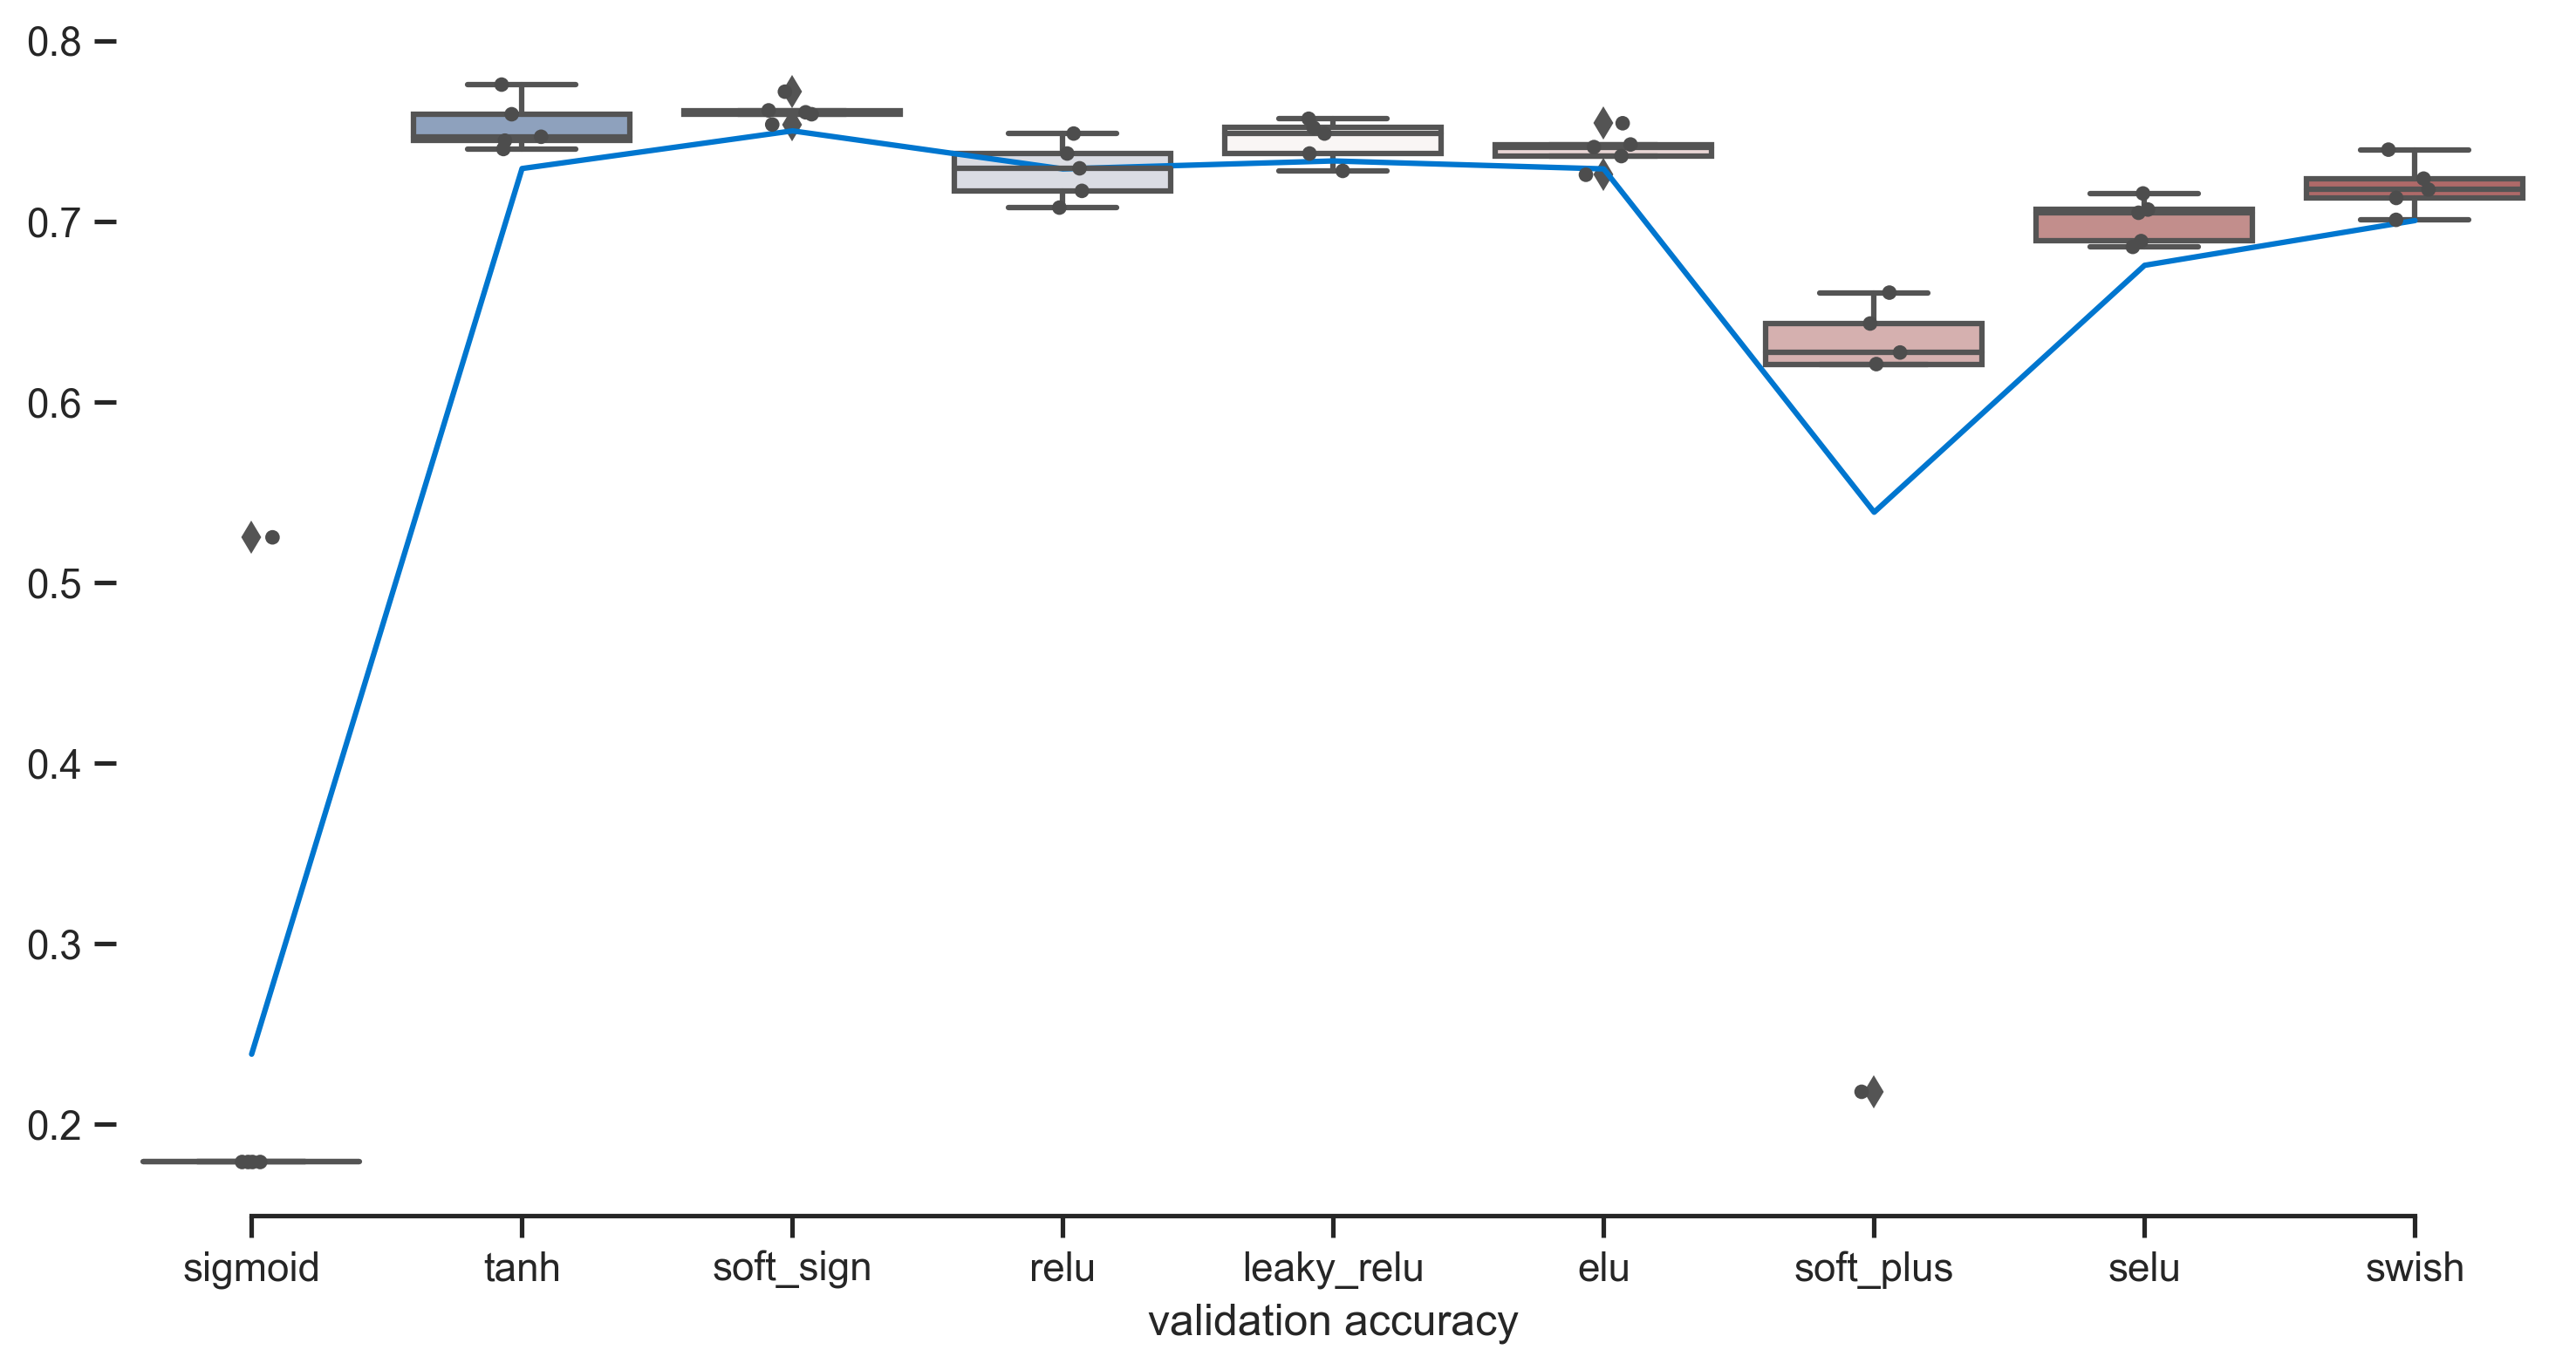

In [71]:
temp_val_acc_comp = pd.DataFrame(val_mean_acc)
temp_test_acc_comp = pd.DataFrame(test_mean_acc)

sns.set_theme(style="ticks")

plt.figure(figsize=[12, 6], dpi=300)

sns.boxplot(data=temp_val_acc_comp, palette="vlag")
sns.stripplot(data=temp_val_acc_comp, size=4, color=".3", linewidth=0)
sns.lineplot(x=temp_test_acc_comp.columns, y=np.mean(temp_test_acc_comp, axis=0).values, color='#0076CF')

# Tweak the visual presentation
plt.xlabel('validation accuracy')
sns.despine(trim=True, left=True)

plt.savefig('../../images/activation/act-val-acc-comp.jpg')
plt.show()